# Import Libraries

In [1]:
import os

import np as np
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pyarrow.feather as feather

import sklearn.preprocessing as skl_preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from datetime import datetime
from keras.callbacks import TensorBoard

# Load the TensorBoard notebook extension.
# %load_ext tensorboard

# Clear any logs from previous runs
# !rm -rf ./logs/

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
# from torch_utils import EarlyStopping

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
1
0
NVIDIA GeForce RTX 3090


In [4]:
import tensorflow as tf
import tensorflow.keras.layers.experimental.preprocessing as tf_preprocessing
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

from tensorflow.python.client import device_lib
print(tf.config.experimental.list_physical_devices('GPU'))
device_lib.list_local_devices()

[]


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1495711494068366356
 xla_global_id: -1]

In [5]:
# input_root_path = "P:\SALMALIS Lab\Work Zone Dataset"
input_root_path = "E:\OneDrive - UBC\Work Zone\data"
output_root_path = "../"

# Load Dataset

In [6]:
# df = feather.read_feather(os.path.join(input_root_path, 'TravelTime_Valid_Recom_Weather_Traffic.ftr'))
# df = pd.read_csv(os.path.join(input_root_path, 'TravelTime_Valid_Recom_Weather_Traffic.csv'))
# df

In [7]:
# Get No Cell Coverage Area Assets
# assets_no_cell = pd.read_csv(os.path.join(input_root_path, 'NoCellAssets.csv'))['Asset Number'].tolist()

# df[df['AssetNumber'].isin(assets_no_cell)].to_csv(os.path.join(input_root_path, 'TravelTime_NoCellCoverage.csv'))
# feather.write_feather(df[df['AssetNumber'].isin(assets_no_cell)], os.path.join(input_root_path, 'TravelTime_NoCellCoverage.ftr'))

# Remove no cell coverage records from data frame
# df = df[~df['AssetNumber'].isin(assets_no_cell)]
# df

# df.to_csv(os.path.join(input_root_path, 'TravelTime_HaveCellCoverage.csv'))
# feather.write_feather(df, os.path.join(input_root_path, 'TravelTime_HaveCellCoverage.ftr'))

In [8]:
# df = feather.read_feather(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage.ftr'))
df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage_WeatherFillNaN.csv'))
df = df.drop(df.columns[0], axis=1)
df

C:\Users\yegmo\AppData\Local\Temp\ipykernel_7012\3153451852.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage_WeatherFillNaN.csv'))


AssetNumber                                 AssetIdentifier  \
0        49831911074                                       Spread 3B   
1        49831911074                                       Spread 3B   
2        49831911074                                       Spread 3B   
3        49831911074                                       Spread 3B   
4        49831911074                                       Spread 3B   
...              ...                                             ...   
1704313  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704314  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704315  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704316  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704317  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   

                 CreatedDate  UnderConstructionTime  BaselineTime  DelayTime  \
0        2022-05-03 17:59:55                   2.20          2.13       0.07   
1        2022-05-03 17:57:32                   2.20          2.13       0.07   
2        2022-05-03 17:55:23                   2.20          2.13       0.07   
3        2022-05-03 17:53:29                   2.20          2.13       0.07   
4        2022-05-03 17:51:45                   2.23          2.13       0.10   
...                      ...                    ...           ...        ...   
1704313  2021-05-01 18:40:12                   1.38          1.48       0.00   
1704314  2021-05-01 18:45:11                   1.38          1.48       0.00   
1704315  2021-05-01 18:50:10                   1.38          1.48       0.00   
1704316  2021-05-01 18:51:07                   1.37          1.48       0.00   
1704317  2021-05-01 18:55:09                   1.37          1.48       0.00   

        State  SegmentLength TravelDirect     Spread  ... Weather:Lat  \
0          OK           3.36           SB  Spread 3B  ...       52.72   
1          OK           3.36           SB  Spread 3B  ...       52.72   
2          OK           3.36           SB  Spread 3B  ...       52.72   
3          OK           3.36           SB  Spread 3B  ...       52.72   
4          OK           3.36           SB  Spread 3B  ...       52.72   
...       ...            ...          ...        ...  ...         ...   
1704313    OK           2.45           NB  Spread 5B  ...       49.24   
1704314    OK           2.45           NB  Spread 5B  ...       49.24   
1704315    OK           2.45           NB  Spread 5B  ...       49.24   
1704316    OK           2.45           NB  Spread 5B  ...       49.24   
1704317    OK           2.45           NB  Spread 5B  ...       49.24   

        Weather:Temp Weather:Precip Weather:WindSpd  Traffic:SiteNo  \
0                9.5            0.0             3.0        23-010NS   
1                9.5            0.0             3.0        23-010NS   
2                9.5            0.0             3.0        23-010NS   
3                9.5            0.0             3.0        23-010NS   
4                9.5            0.0             3.0        23-010NS   
...              ...            ...             ...             ...   
1704313         14.2            0.0             6.0         17-015W   
1704314         14.2            0.0             6.0         17-015W   
1704315         14.2            0.0             6.0         17-015W   
1704316         14.2            0.0             6.0         17-015W   
1704317         14.2            0.0             6.0         17-015W   

         Traffic:IsTemporary  Traffic:AADT  Traffic:BaseYear  \
0                       True    355.333333            2017.0   
1                       True    355.333333            2017.0   
2                       True    355.333333            2017.0   
3                       True    355.333333            2017.0   
4                       True    355.333333            2017.0   
...                      ...           ...               ...   
17043

In [9]:
df.nunique()

AssetNumber                   274
AssetIdentifier               132
CreatedDate                495632
UnderConstructionTime         576
BaselineTime                  275
DelayTime                     635
State                           2
SegmentLength                 133
TravelDirect                    2
Spread                          7
TrafficImpact                   3
RoadType                        3
TrafficControlSetup             2
CreatedDate:Date              171
CreatedDate:Weekday             7
CreatedDate:DayOfYear         107
CreatedDate:Year                2
CreatedDate:Month               4
CreatedDate:Day                31
CreatedDate:Hour               24
CreatedDate:MinuteInDay      1440
CreatedDate:Season              2
Weather:StationID              12
Weather:Long                   11
Weather:Lat                    12
Weather:Temp                  368
Weather:Precip                 49
Weather:WindSpd                39
Traffic:SiteNo                 16
Traffic:IsTemp

In [10]:
df_features = pd.read_excel(os.path.join(input_root_path, 'Layout Plans\Weekly Approved H1080 TCPs\Work Zone Features.xlsx'), sheet_name=0)
df_features = df_features.drop(df_features.index[0]).reset_index(drop=True)
df_features

WZ_ID  AssetNumber Direction  WZ_Hwy  Anticipated AADT (Veh/Day)  \
0     AP 4-B-17-A  78385678679        NB     5.0                      2872.0   
1     AP 4-B-17-A  70353237409        SB     5.0                      2872.0   
2    AP 4-B-144-A  11297073233        NB     5.0                      2872.0   
3    AP 4-B-144-A  42238078130        SB     5.0                      2872.0   
4    AP 4-B-145-A  11297073233        NB     5.0                      2872.0   
..            ...          ...       ...     ...                         ...   
220   AP 3-C-77-C  17960997656        SB     5.0                      3151.0   
221   AP 3-C-77-C  48287165966        NB     5.0                      3151.0   
222   AP 3-C-77-C  17960997656        SB     5.0                      3151.0   
223   AP 4-A-51-E  38283143270        NB     5.0                      3255.0   
224   AP 4-A-51-E  20254556742        SB     5.0                      3255.0   

     Anticipated AADT Year PostedSpd WZ_IsBidirectional  \
0                   2017.0       100                  0   
1                   2017.0       100                  0   
2                   2017.0       100                  0   
3                   2017.0       100                  0   
4                   2017.0       100                  0   
..                     ...       ...                ...   
220                 2017.0       100                  0   
221                 2017.0       100                  1   
222                 2017.0       100                  1   
223                 2019.0       100                  1   
224                 2019.0       100                  1   

    WZ_ConstSignSpdLimDist WZ_TransLenStart  ...  WZ_NewLaneCount  \
0                      150              450  ...                1   
1                      150              450  ...                1   
2                      150              450  ...                1   
3                      150              450  ...                1   
4                      150              450  ...                1   
..                     ...              ...  ...              ...   
220                    300              450  ...                1   
221                    150              150  ...                1   
222                    150              150  ...                1   
223                    150              150  ...                1   
224                    150              150  ...                1   

    WZ_ClosedLaneCount  WZ_IsMinAprch  WZ_BarrelSpace  \
0                    0              0               0   
1                    0              0               0   
2                    0              0               0   
3                    0              0               0   
4                    0              0               0   
..                 ...            ...             ...   
220                  0              0               0   
221                  1              0             335   
222                  1              0             335   
223                  1              0             335   
224                  1              0             335   

                                                Folder  \
0    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
1    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
2    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
3    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
4    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
..                                                 ...   
220  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
221  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
222  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
223  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
224  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   

                                     Filename Entered by Additional Plan  \
0       AP 4-B-17-A-TCPr TCP Drawing Rev0.pdf      Ahme

In [11]:
df_features.nunique()

WZ_ID                          66
AssetNumber                   123
Direction                       2
WZ_Hwy                          2
Anticipated AADT (Veh/Day)      7
Anticipated AADT Year           3
PostedSpd                       1
WZ_IsBidirectional              2
WZ_ConstSignSpdLimDist          2
WZ_TransLenStart                2
WZ_2ndTransLenStart             6
WZ_Length                      10
WZ_Length_Lower                10
WZ_Length_Upper                 9
WZ_TransLenEnd                  9
WZ_SpdLim                       2
WZ_IsTransSpd                   2
WZ_IsPrepStop                   1
WZ_ThxSignSpdLimDist            2
WZ_OrigLaneCount                2
WZ_IsOrigIDivided               2
WZ_NewLaneCount                 2
WZ_ClosedLaneCount              2
WZ_IsMinAprch                   2
WZ_BarrelSpace                  5
Folder                         10
 Filename                      99
Entered by                      2
Additional Plan                 1
Comments 1    

# Prepare data to feed the network

## Get records within April 1-10

In [12]:
df_filtered = df[(91 <= df['CreatedDate:DayOfYear']) & (df['CreatedDate:DayOfYear'] <= 100) & (
            df['CreatedDate:Year'] == 2022)].reset_index(drop=True)
# df_filtered = df[(df['CreatedDate:Year'] == 2022)].reset_index(drop=True)
# df_filtered = df_filtered[(df_filtered['UnderConstructionTime'] < 7) & (df_filtered['BaselineTime'] < 10)].reset_index(drop=True)

# pd.DataFrame(df_filtered['AssetNumber'].unique()).to_csv("E:\OneDrive - UBC\Work Zone\data\TravelTimeInfo\Assets_HaveCellCoverage_April_1-10.csv")
# df_filtered.to_csv("E:\OneDrive - UBC\Work Zone\data\TravelTimeInfo\TravelTime_HaveCellCoverage_April_1-10.csv")

df_filtered

AssetNumber AssetIdentifier          CreatedDate  \
0       49831911074       Spread 3B  2022-04-04 17:58:45   
1       49831911074       Spread 3B  2022-04-04 17:56:40   
2       49831911074       Spread 3B  2022-04-04 17:54:48   
3       49831911074       Spread 3B  2022-04-04 17:52:42   
4       49831911074       Spread 3B  2022-04-04 17:50:48   
...             ...             ...                  ...   
137572  40105790845       Spread 5B  2022-04-01 00:08:38   
137573  40105790845       Spread 5B  2022-04-01 00:06:37   
137574  40105790845       Spread 5B  2022-04-01 00:04:37   
137575  40105790845       Spread 5B  2022-04-01 00:02:37   
137576  40105790845       Spread 5B  2022-04-01 00:00:34   

        UnderConstructionTime  BaselineTime  DelayTime State  SegmentLength  \
0                        2.25          2.13       0.12    OK           3.36   
1                        2.25          2.13       0.12    OK           3.36   
2                        2.25          2.13       0.12    OK           3.36   
3                        2.23          2.13       0.10    OK           3.36   
4                        2.23          2.13       0.10    OK           3.36   
...                       ...           ...        ...   ...            ...   
137572                   2.13          1.28       0.85    OK           2.21   
137573                   2.13          1.28       0.85    OK           2.21   
137574                   2.13          1.28       0.85    OK           2.21   
137575                   2.13          1.28       0.85    OK           2.21   
137576                   2.05          1.28       0.77    OK           2.21   

       TravelDirect     Spread  ... Weather:Lat Weather:Temp Weather:Precip  \
0                SB  Spread 3B  ...       52.72          1.7            0.8   
1                SB  Spread 3B  ...       52.72          1.7            0.8   
2                SB  Spread 3B  ...       52.72          1.7            0.8   
3                SB  Spread 3B  ...       52.72          1.7            0.8   
4                SB  Spread 3B  ...       52.72          1.7            0.8   
...             ...        ...  ...         ...          ...            ...   
137572           NB  Spread 5B  ...       49.24          6.1            0.0   
137573           NB  Spread 5B  ...       49.24          6.1            0.0   
137574           NB  Spread 5B  ...       49.24          6.1            0.0   
137575           NB  Spread 5B  ...       49.24          6.1            0.0   
137576           NB  Spread 5B  ...       49.24          6.1            0.0   

       Weather:WindSpd  Traffic:SiteNo  Traffic:IsTemporary  Traffic:AADT  \
0                  3.0        23-010NS                 True    355.333333   
1                  3.0        23-010NS                 True    355.333333   
2                  3.0        23-010NS                 True    355.333333   
3                  3.0        23-010NS                 True    355.333333   
4                  3.0        23-010NS                 True    355.333333   
...                ...             ...                  ...           ...   
137572             2.0        17-044EW                 True     41.000000   
137573             2.0        17-044EW                 True     41.000000   
137574             2.0        17-044EW                 True     41.000000   
137575             2.0        17-044EW                 True     41.000000   
137576             2.0        17-044EW                 True     41.000000   

        Traffic:BaseYear  Traffic:CalculatedAADT  MaxSpeed  
0                 2017.0                  373.10     100.0  
1                 2017.0                  373.10     100.0  
2                 2017.0                  373.10     100.0  
3                 2017.0                  373.10     100.0  
4                 2017.0                  373.10     100.0  
...                  ...                     ...       ...  
137572            2016.0             

In [13]:
df_filtered.nunique()

AssetNumber                  127
AssetIdentifier                6
CreatedDate                58617
UnderConstructionTime        418
BaselineTime                  77
DelayTime                    366
State                          2
SegmentLength                 76
TravelDirect                   2
Spread                         6
TrafficImpact                  2
RoadType                       3
TrafficControlSetup            2
CreatedDate:Date              10
CreatedDate:Weekday            7
CreatedDate:DayOfYear         10
CreatedDate:Year               1
CreatedDate:Month              1
CreatedDate:Day               10
CreatedDate:Hour              24
CreatedDate:MinuteInDay     1387
CreatedDate:Season             1
Weather:StationID              9
Weather:Long                   8
Weather:Lat                    9
Weather:Temp                 164
Weather:Precip                34
Weather:WindSpd               35
Traffic:SiteNo                13
Traffic:IsTemporary            1
Traffic:AA

## Merge features and then remove records with null features

In [14]:
df_processed = pd.merge(df_filtered, df_features, on='AssetNumber', how='inner')
drop_cols = ['AssetIdentifier', 'CreatedDate', 'State', 'CreatedDate:Date', 'Weather:StationID', 'Weather:Long',
             'Weather:Lat', 'Traffic:SiteNo', 'Traffic:IsTemporary', 'Traffic:AADT', 'Traffic:BaseYear', 'MaxSpeed',
             'Traffic:CalculatedAADT',
             'Entered by', 'Additional Plan', 'Comments 1', 'Comments 2']
df_processed = df_processed.drop(columns=drop_cols)
# df_processed[df_processed.isnull().any(axis=1)]
# df_processed.isnull().sum()
df_processed = df_processed.dropna(axis=0).reset_index(drop=True).copy()
df_processed

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0      49831911074                   2.25          2.13       0.12   
1      49831911074                   2.25          2.13       0.12   
2      49831911074                   2.25          2.13       0.12   
3      49831911074                   2.25          2.13       0.12   
4      49831911074                   2.25          2.13       0.12   
...            ...                    ...           ...        ...   
65308  75723709666                   4.53          3.62       0.91   
65309  75723709666                   4.52          3.62       0.90   
65310  75723709666                   4.52          3.62       0.90   
65311  75723709666                   4.52          3.62       0.90   
65312  75723709666                   4.47          3.62       0.85   

       SegmentLength TravelDirect     Spread TrafficImpact  \
0               3.36           SB  Spread 3B          High   
1               3.36           SB  Spread 3B          High   
2               3.36           SB  Spread 3B          High   
3               3.36           SB  Spread 3B          High   
4               3.36           SB  Spread 3B          High   
...              ...          ...        ...           ...   
65308           6.00           SB  Spread 4B          High   
65309           6.00           SB  Spread 4B          High   
65310           6.00           SB  Spread 4B          High   
65311           6.00           SB  Spread 4B          High   
65312           6.00           SB  Spread 4B          High   

                                    RoadType TrafficControlSetup  ...  \
0      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                      ...                 ...  ...   
65308  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65309  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65310  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65311  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65312  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

       WZ_IsPrepStop  WZ_ThxSignSpdLimDist  WZ_OrigLaneCount  \
0                  1                    75                 1   
1                  1                    75                 1   
2                  1                    75                 1   
3                  1                    75                 1   
4                  1                    75                 1   
...              ...                   ...               ...   
65308              1                    75                 1   
65309              1                    75                 1   
65310              1                    75                 1   
65311              1                    75                 1   
65312              1                    75                 1   

       WZ_IsOrigIDivided  WZ_NewLaneCount  WZ_ClosedLaneCount  WZ_IsMinAprch  \
0                      1                1                   1              0   
1                      1                1                   1              0   
2                      1                1                   1              0   
3                      1                1                   1              0   
4                      1                1                   1              0   
...                  ...              ...                 ...            ...   
65308                  0                1                   0              1   
65309                  0                1                   0              1   
65310                  0                1              

### Check merged df

In [15]:
df_processed.nunique()


AssetNumber                     52
UnderConstructionTime          392
BaselineTime                    43
DelayTime                      353
SegmentLength                   31
TravelDirect                     2
Spread                           4
TrafficImpact                    2
RoadType                         2
TrafficControlSetup              1
CreatedDate:Weekday              6
CreatedDate:DayOfYear            8
CreatedDate:Year                 1
CreatedDate:Month                1
CreatedDate:Day                  8
CreatedDate:Hour                24
CreatedDate:MinuteInDay       1072
CreatedDate:Season               1
Weather:Temp                   106
Weather:Precip                   9
Weather:WindSpd                 21
WZ_ID                           27
Direction                        2
WZ_Hwy                           1
Anticipated AADT (Veh/Day)       5
Anticipated AADT Year            2
PostedSpd                        1
WZ_IsBidirectional               2
WZ_ConstSignSpdLimDi

D:\Workzone\venv\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
D:\Workzone\venv\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

D:\Workzone\venv\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
D:\Workzone\venv\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
D:\Workzone\venv\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
D:\Workzone\venv\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - 


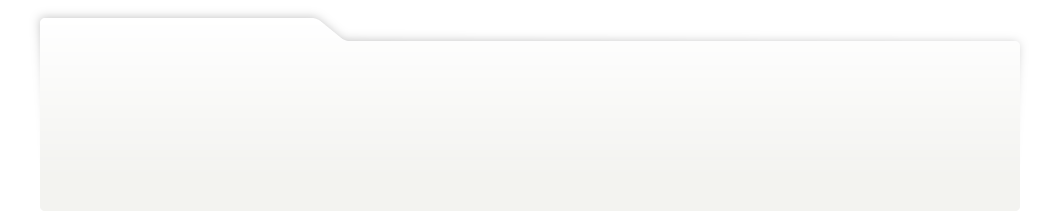
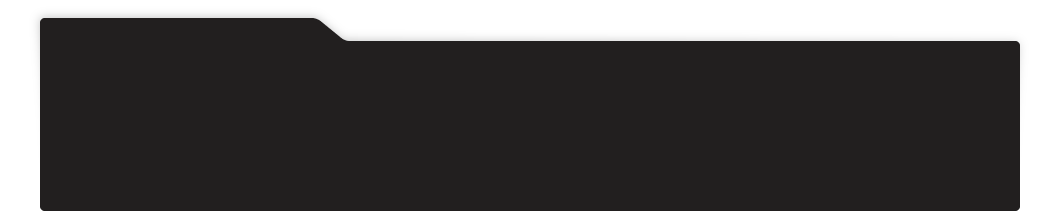
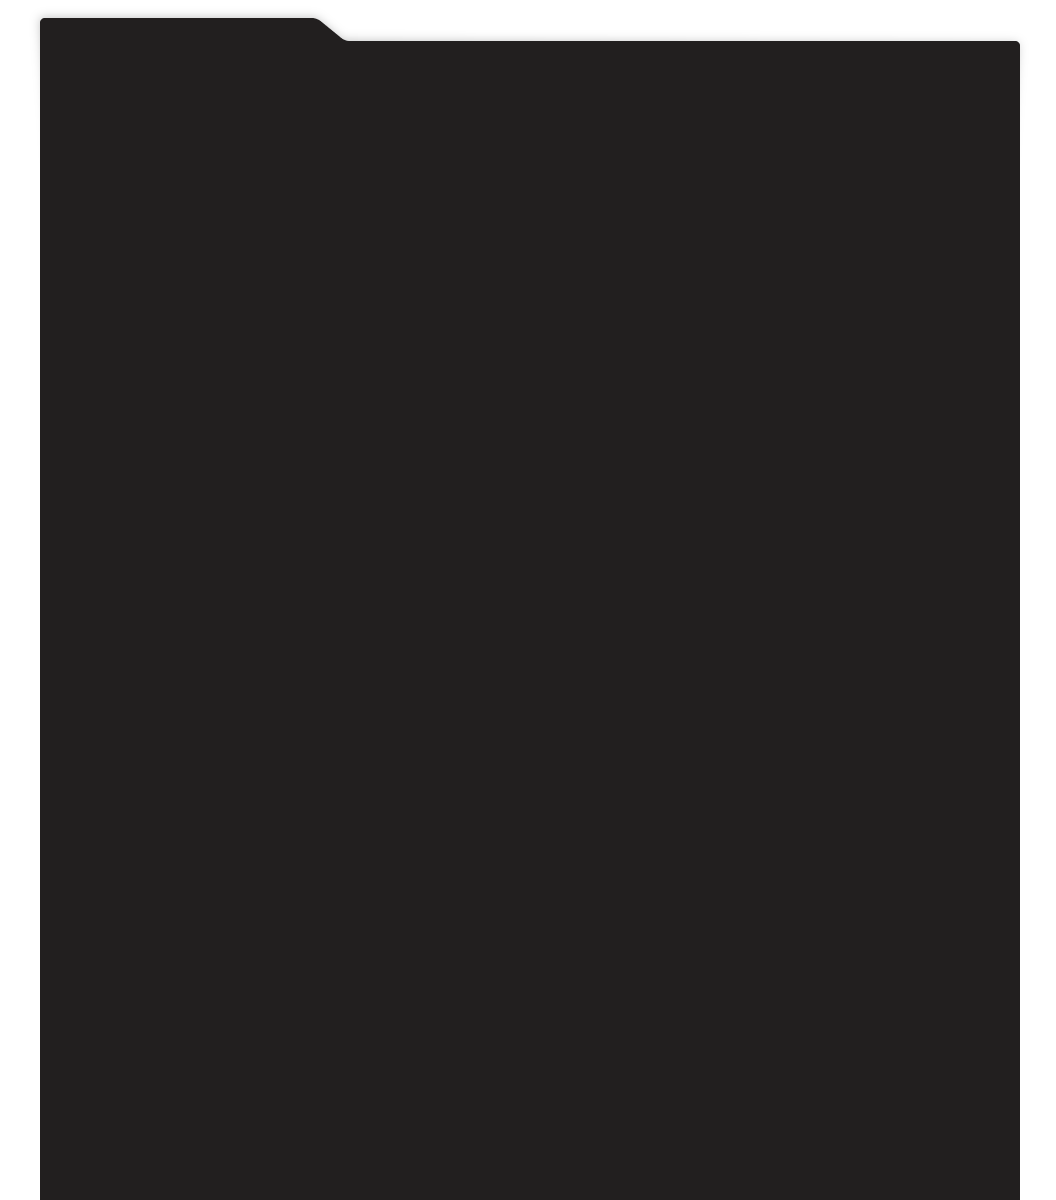
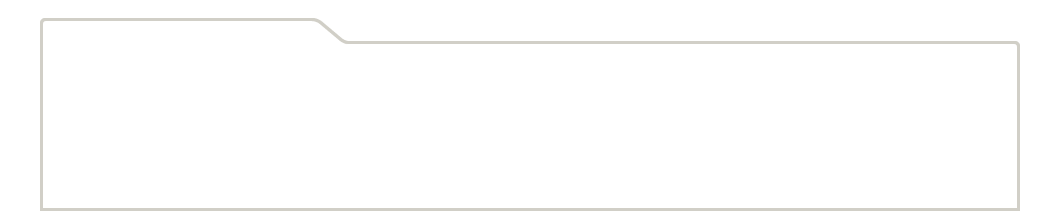
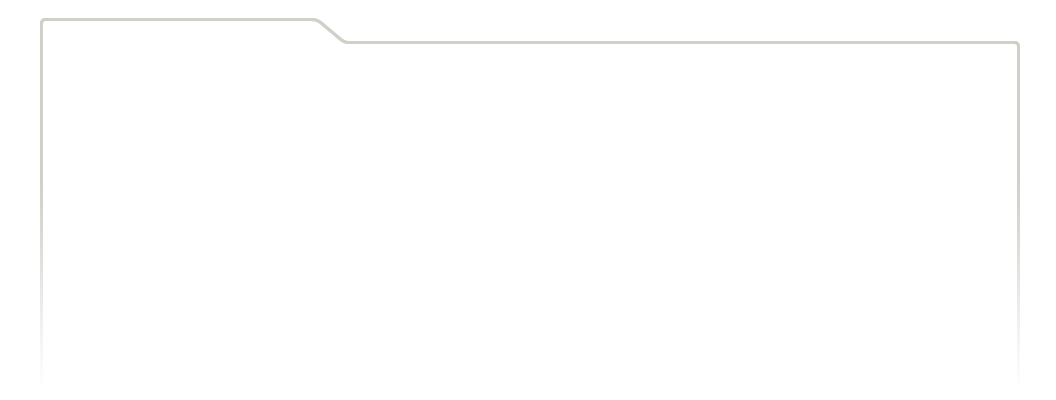
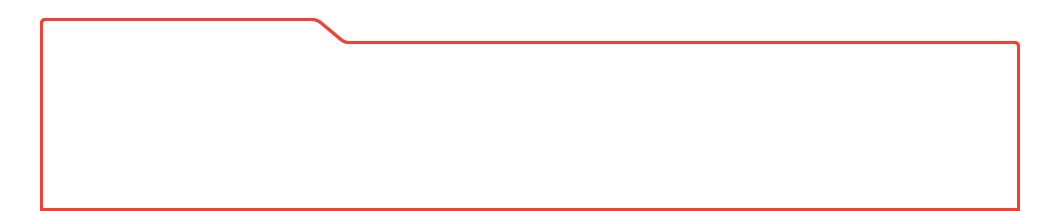
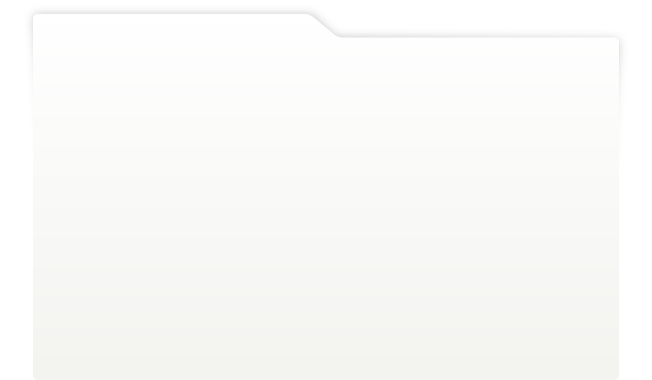
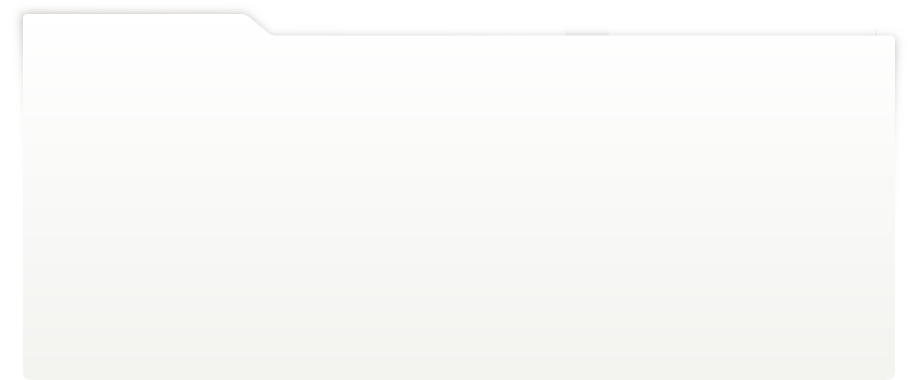
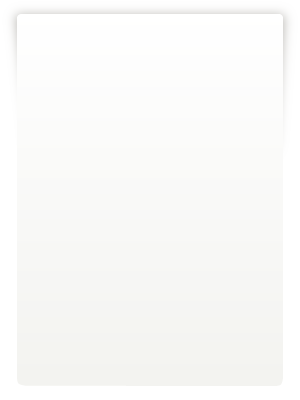
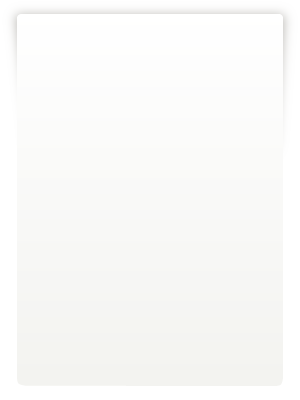
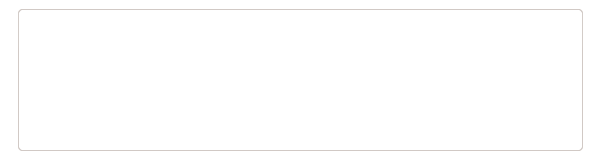
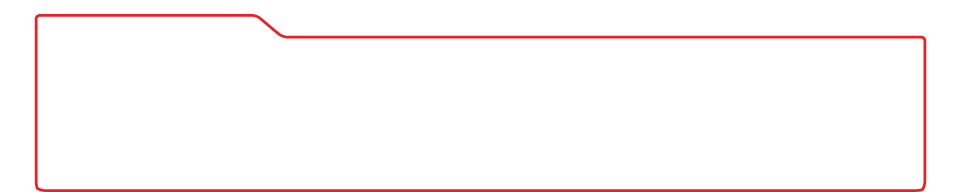
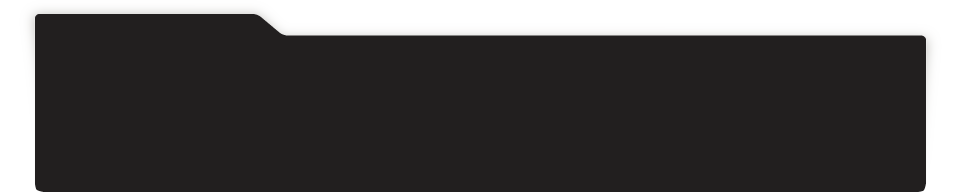
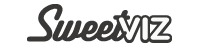
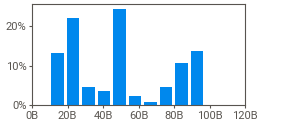
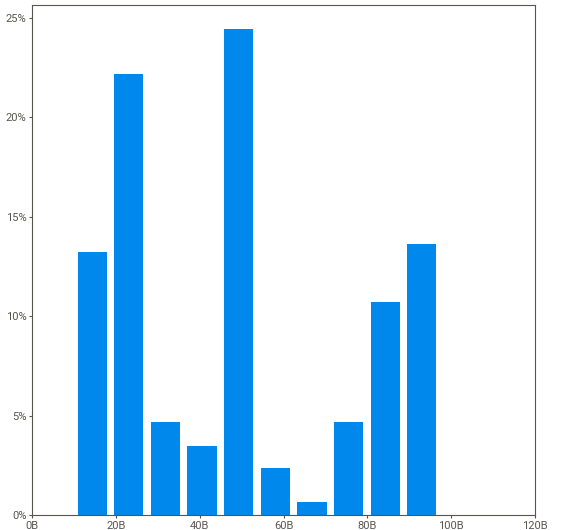
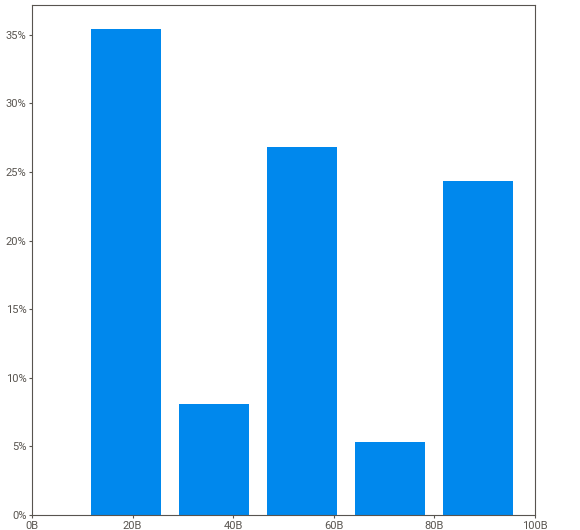
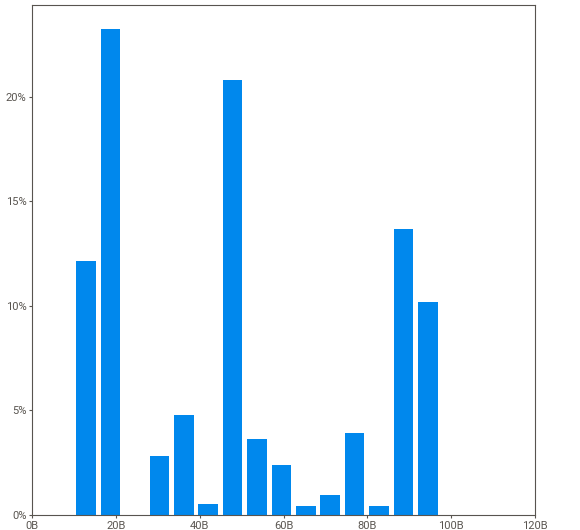
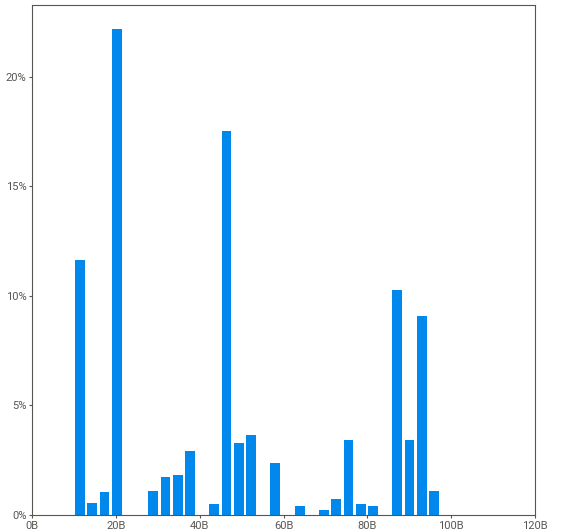
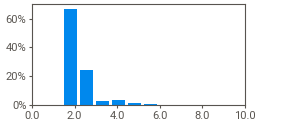
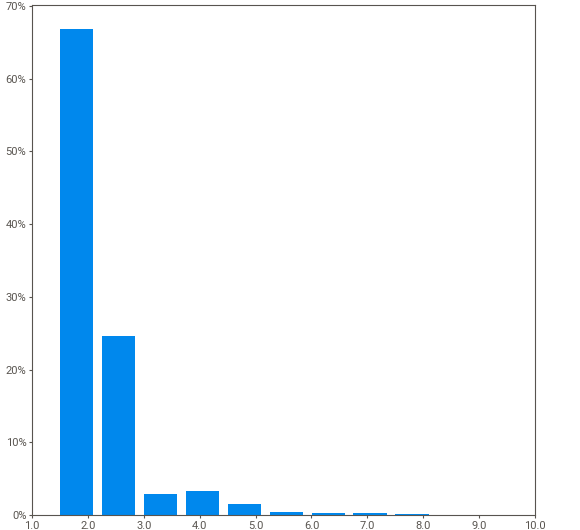
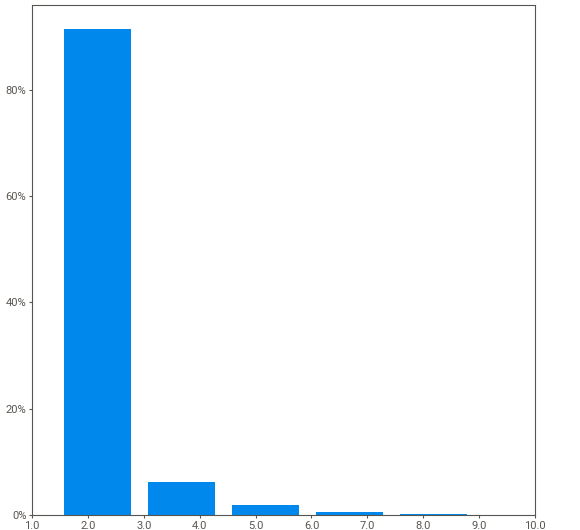
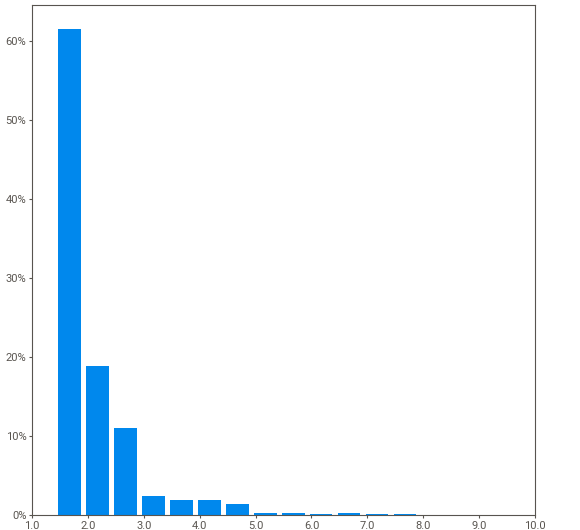
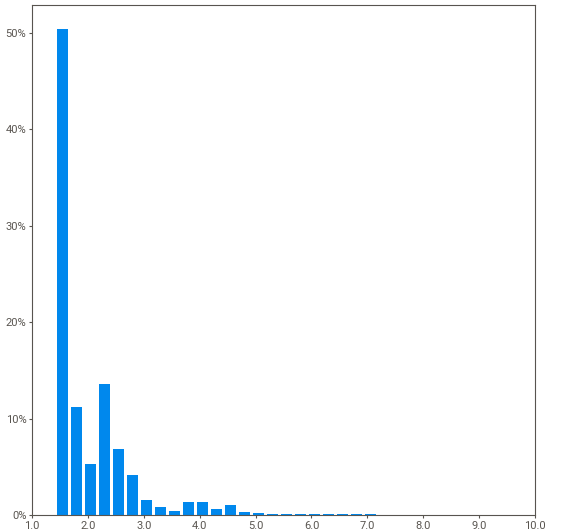
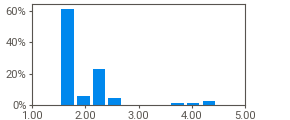
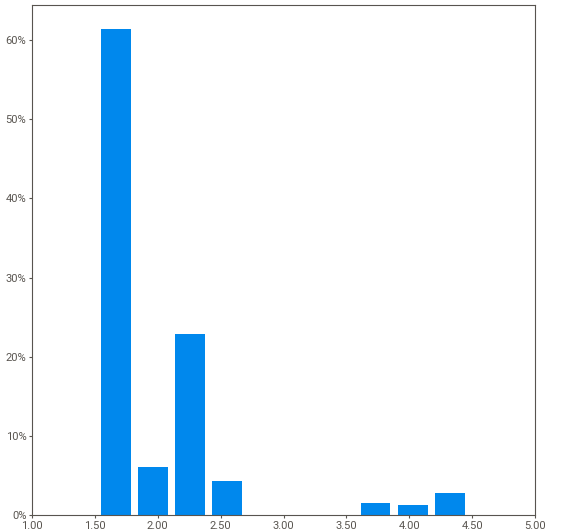
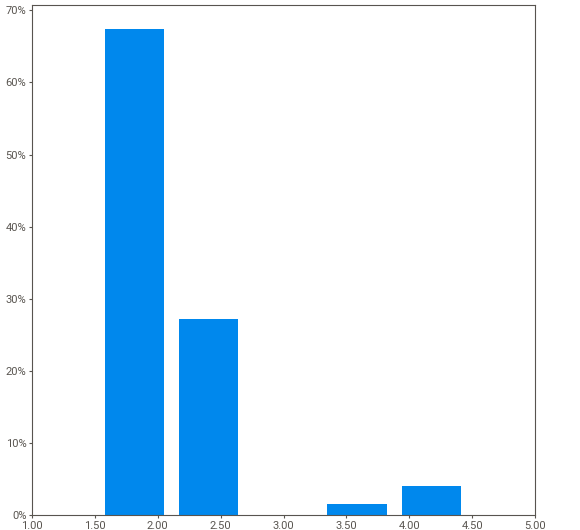
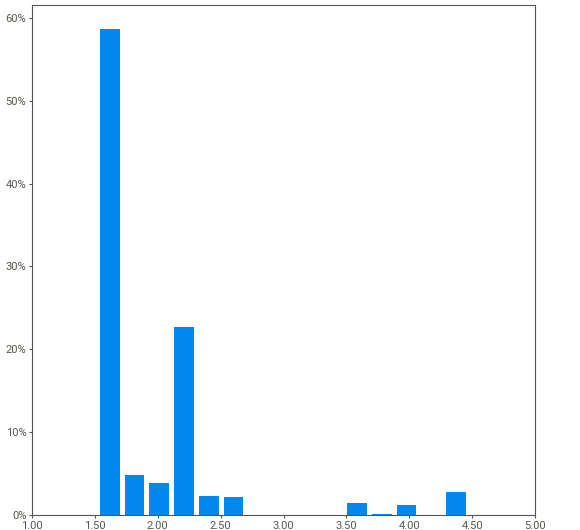
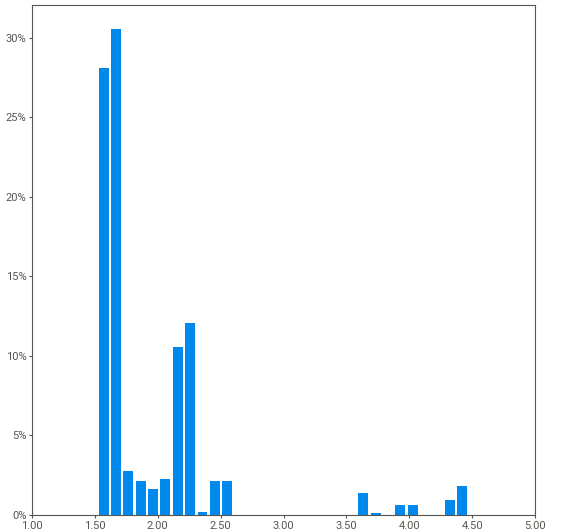
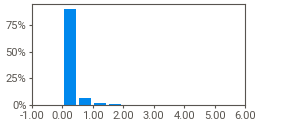
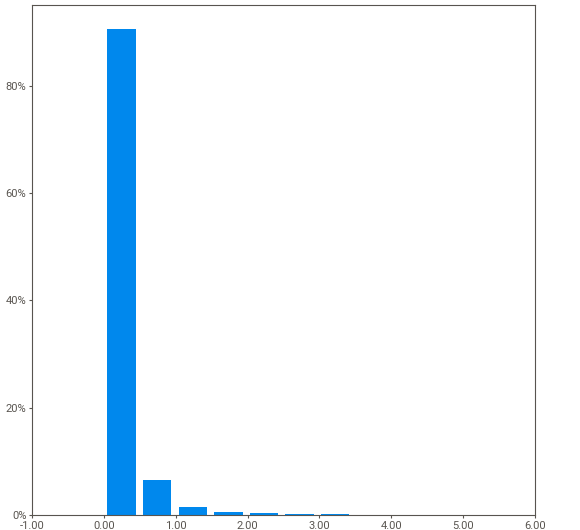
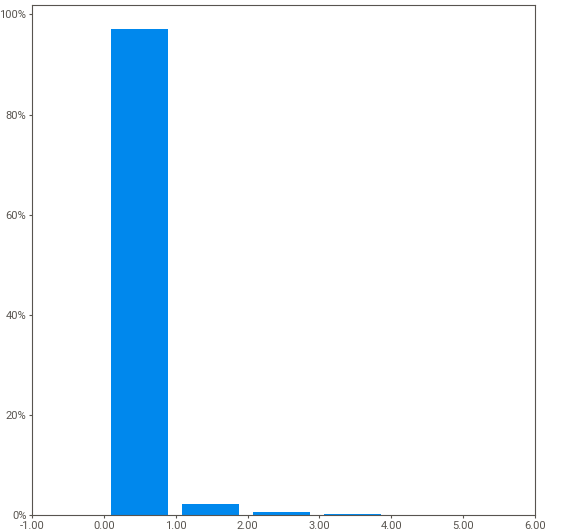
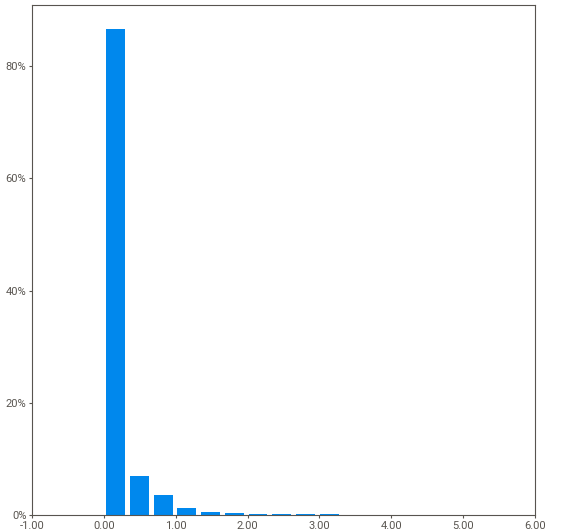
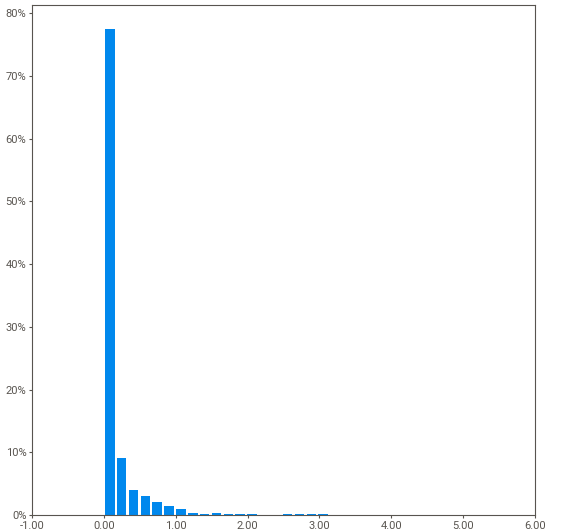
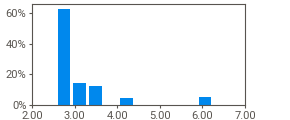
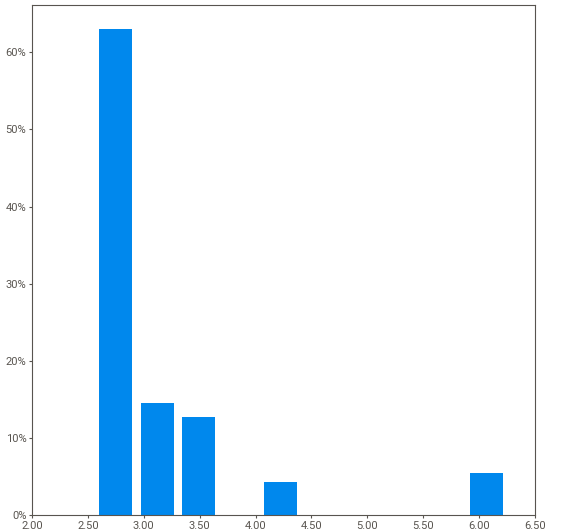
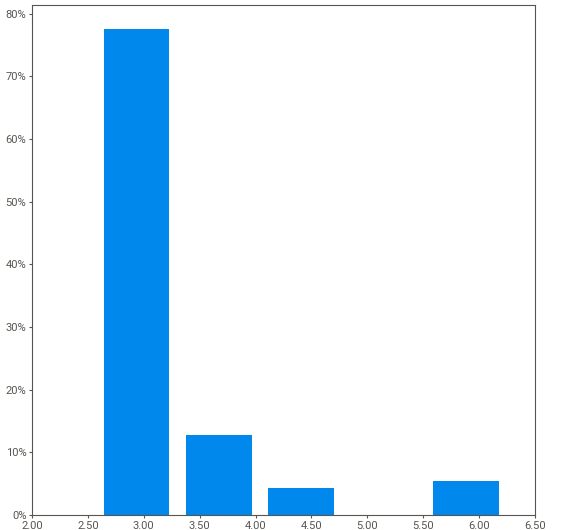
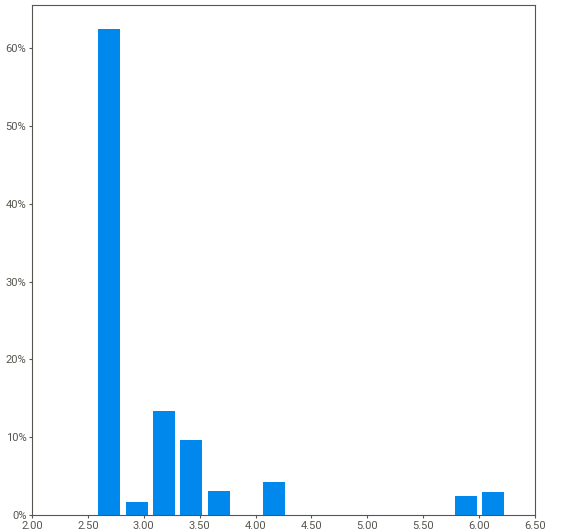
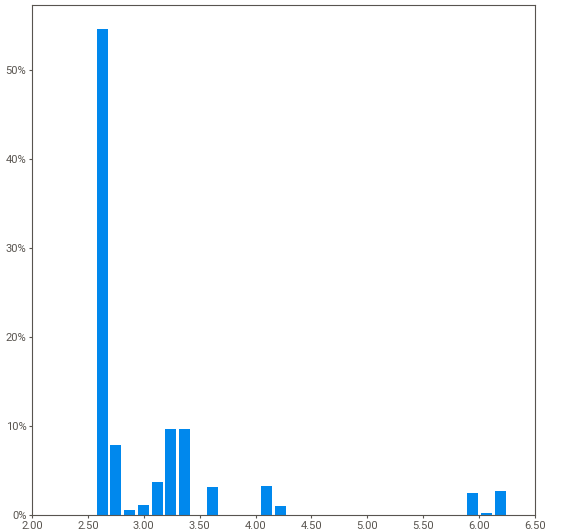
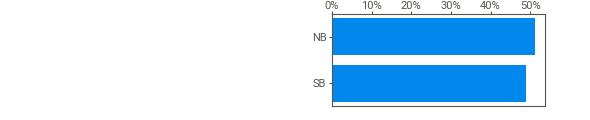
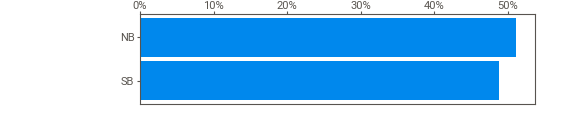
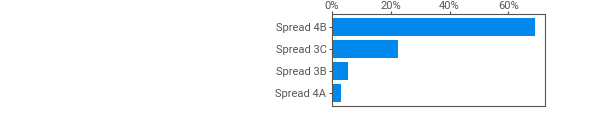
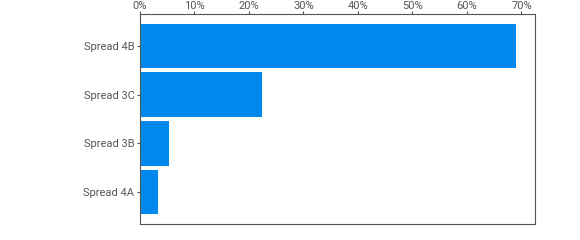
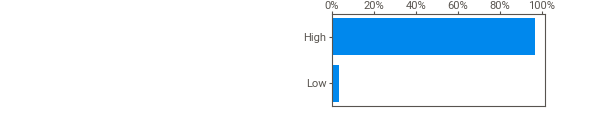
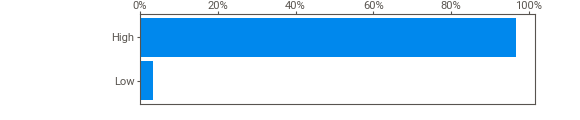
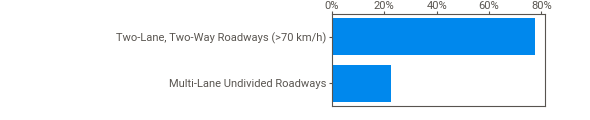
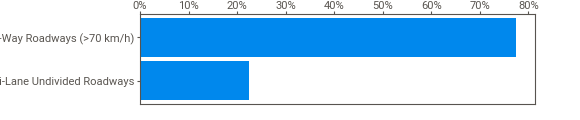
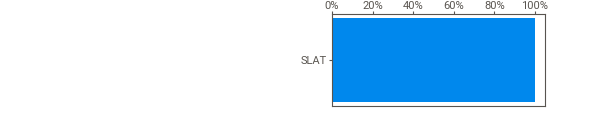
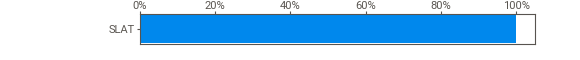
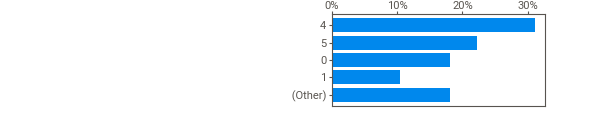
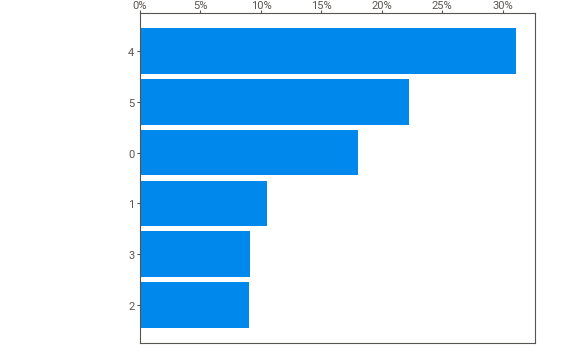
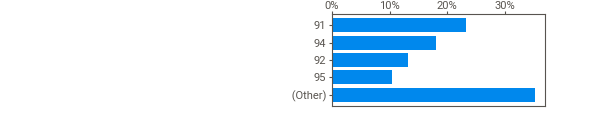
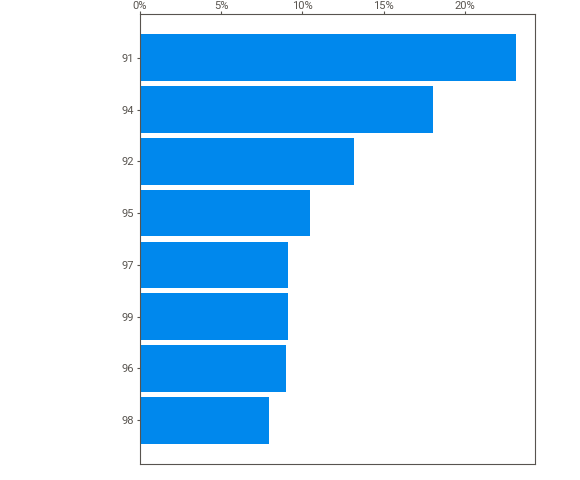
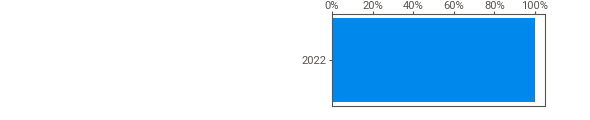
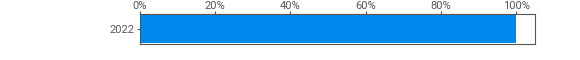
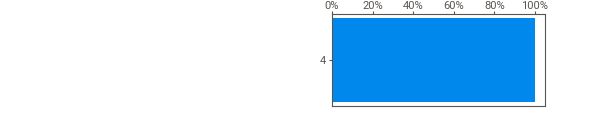
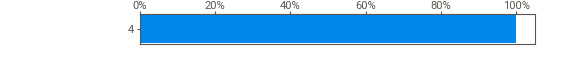
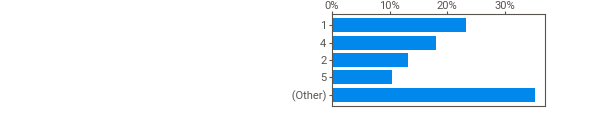
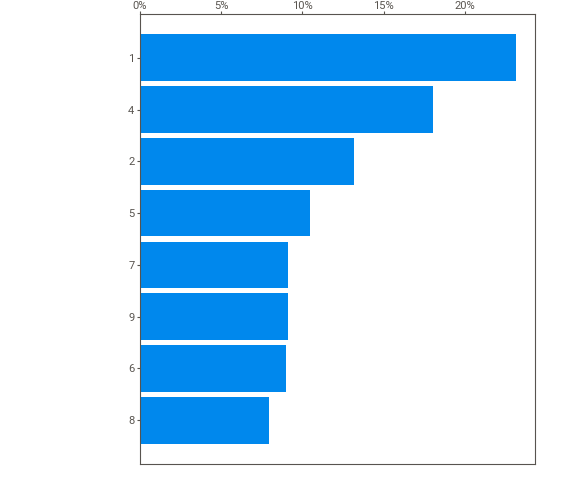
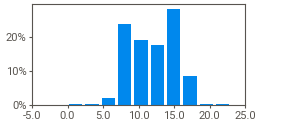
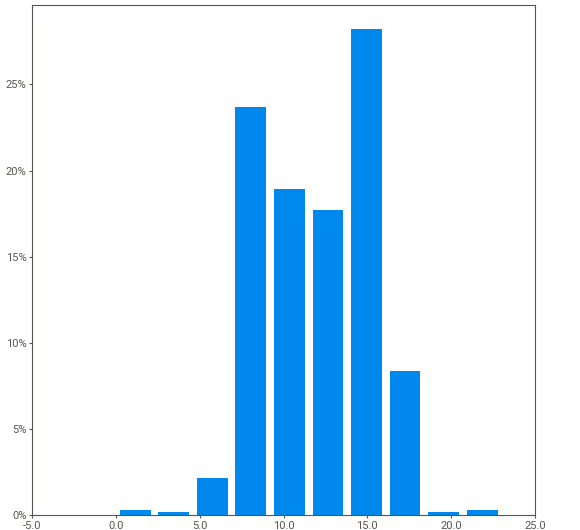
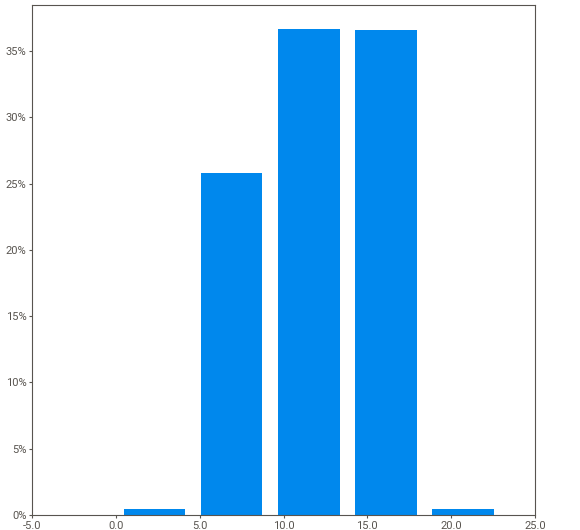
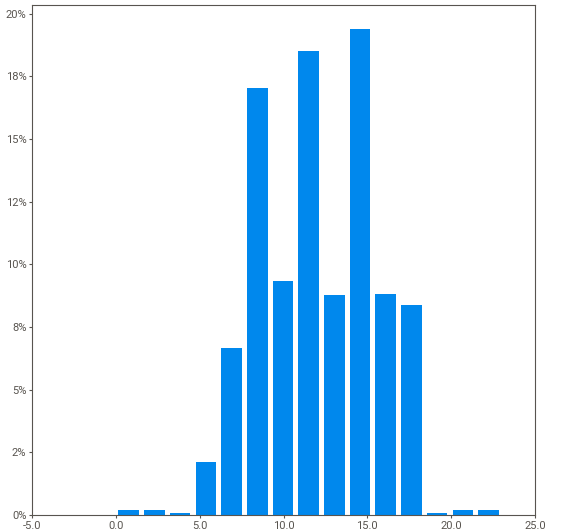
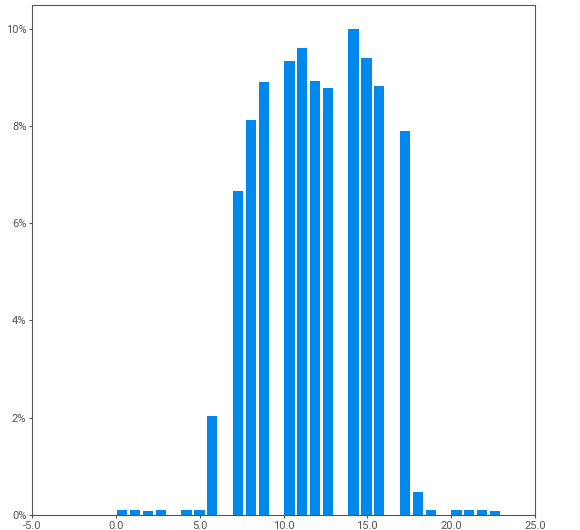
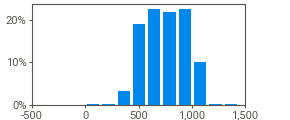
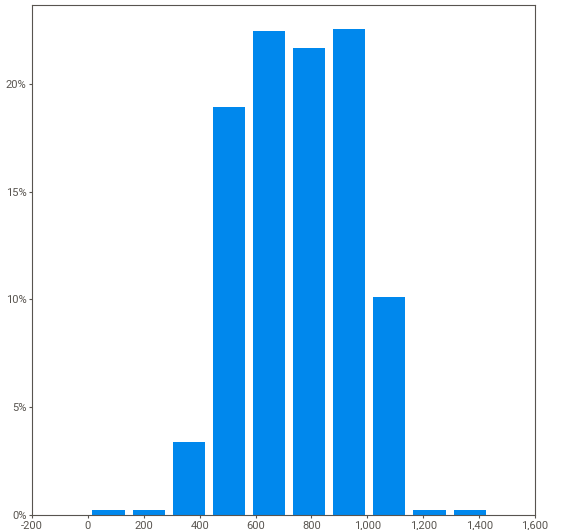
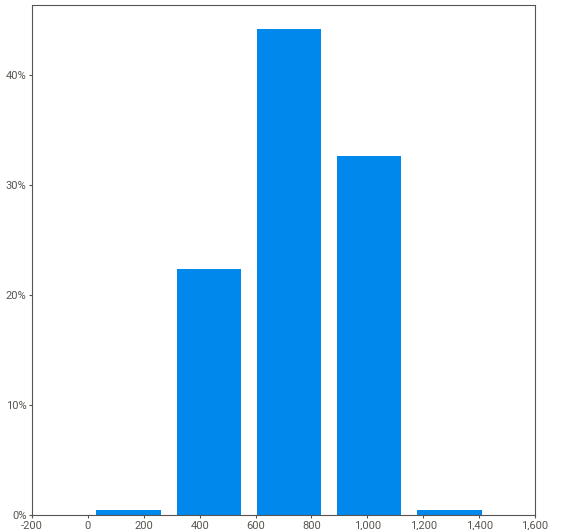
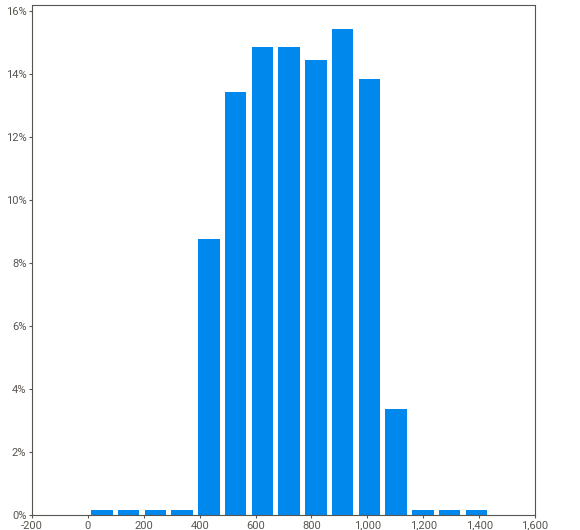
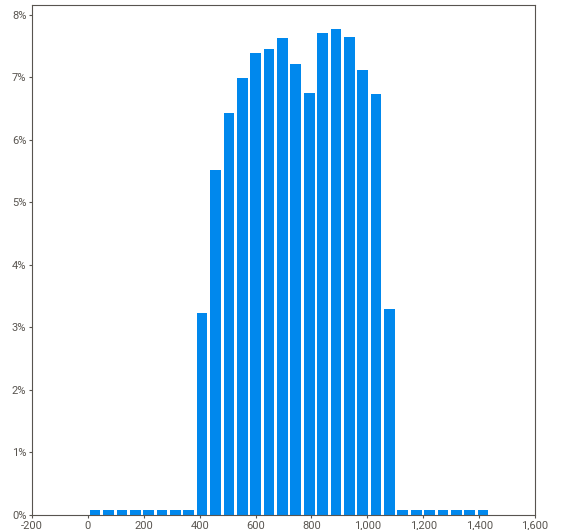
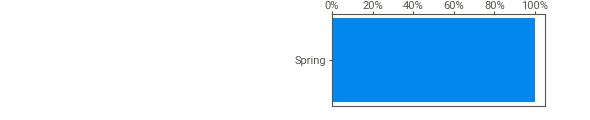
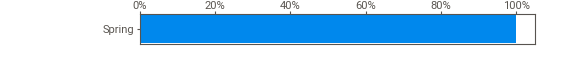
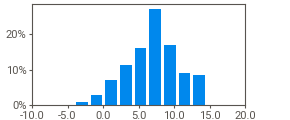
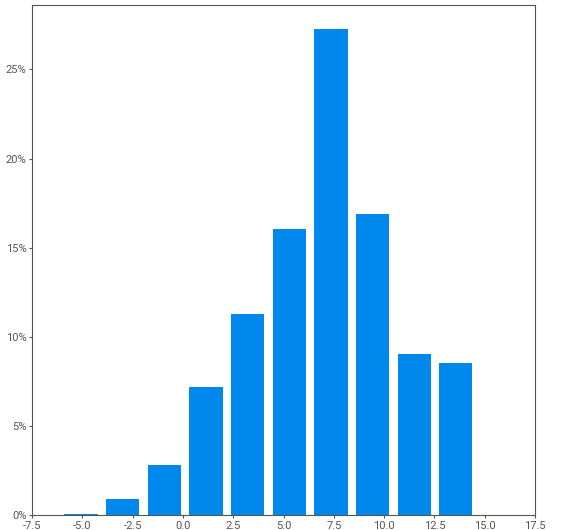
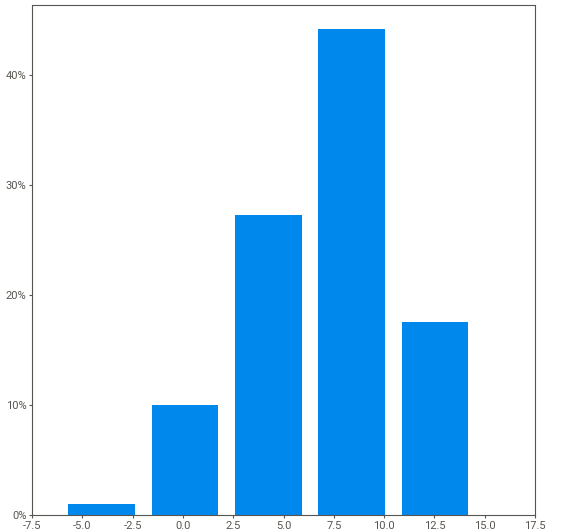
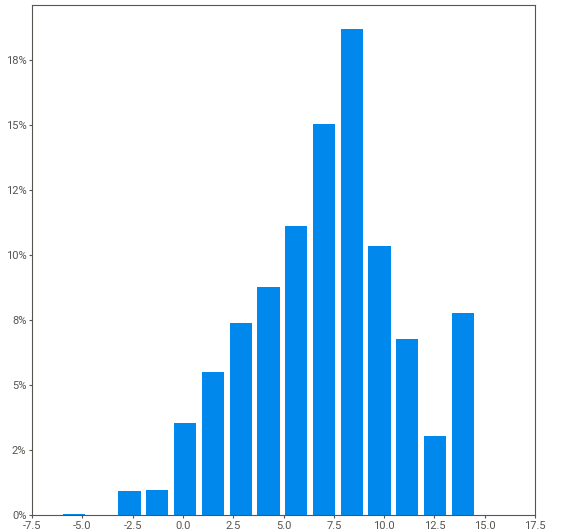
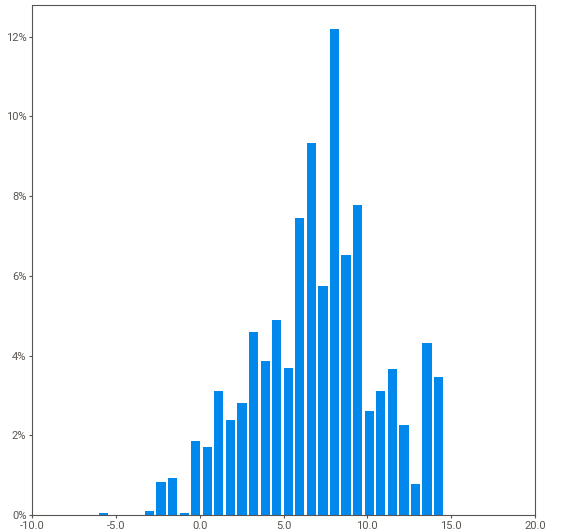
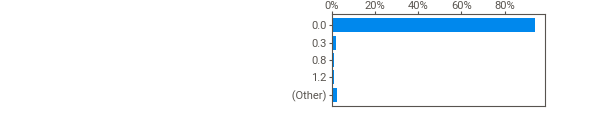
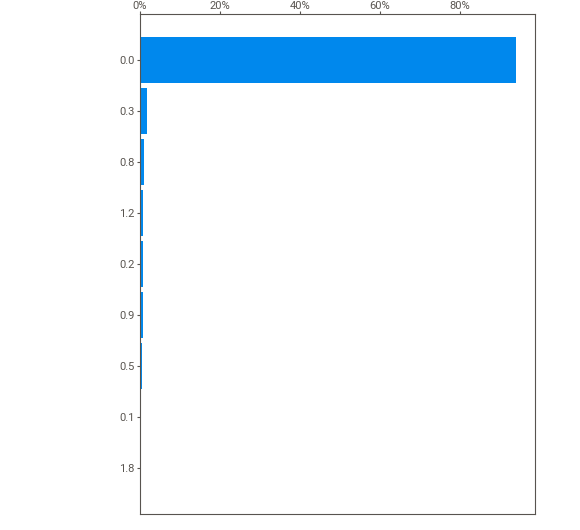
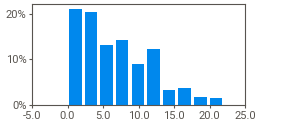
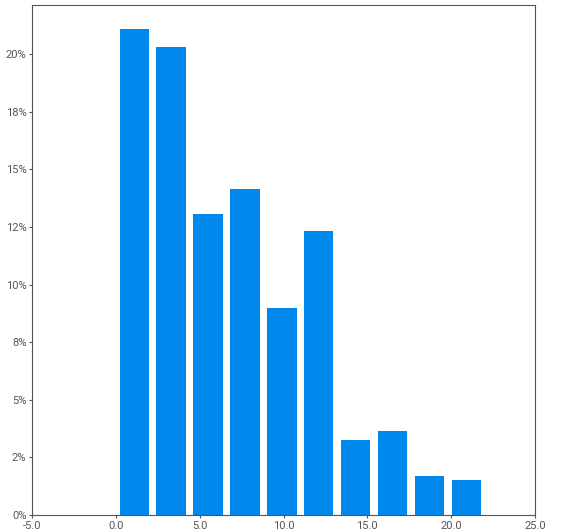
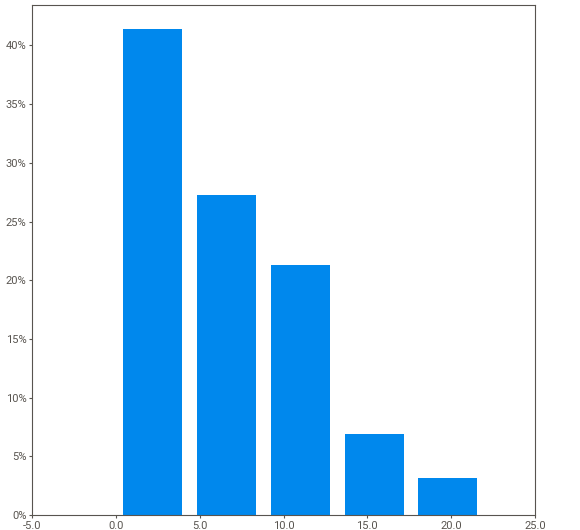
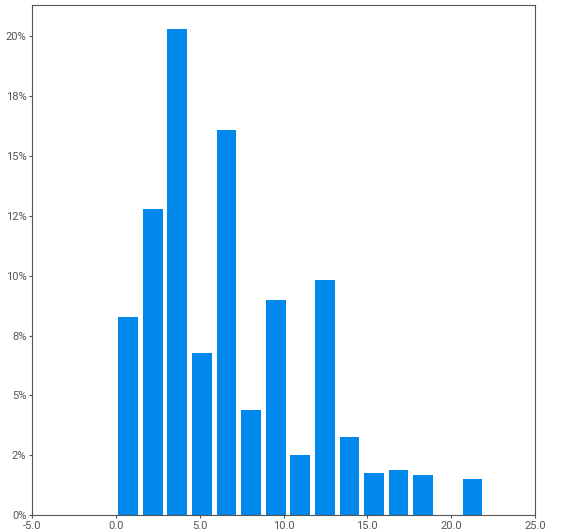
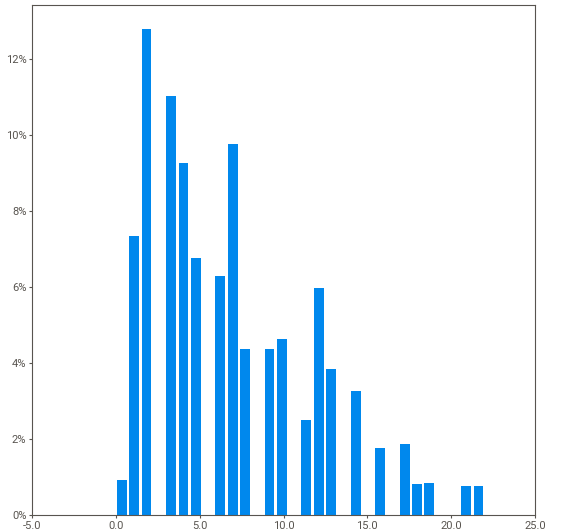
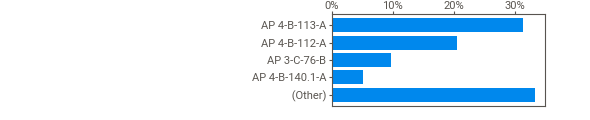
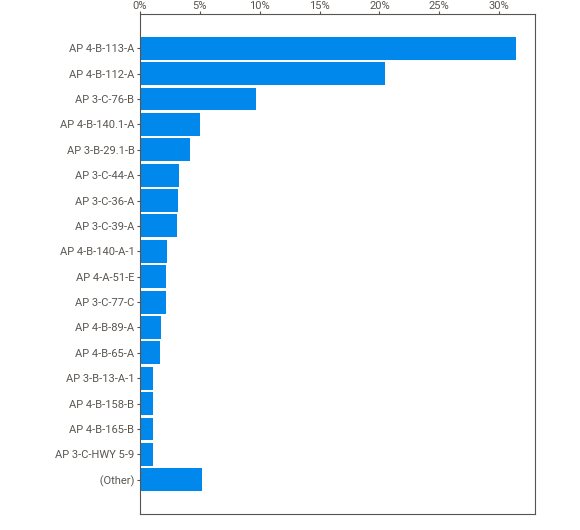
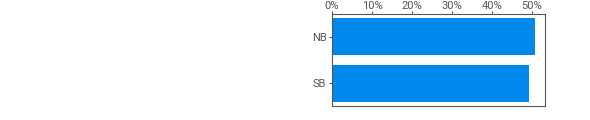
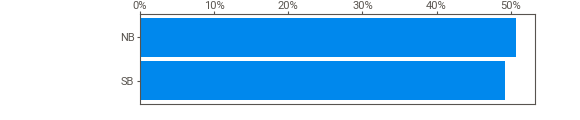
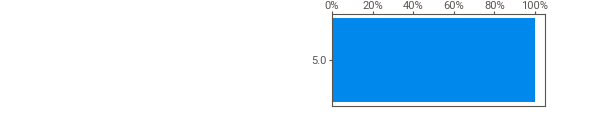
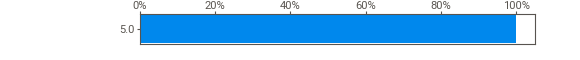
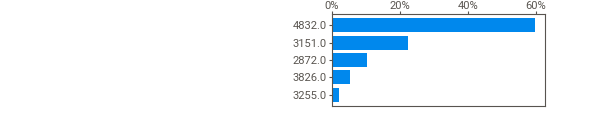
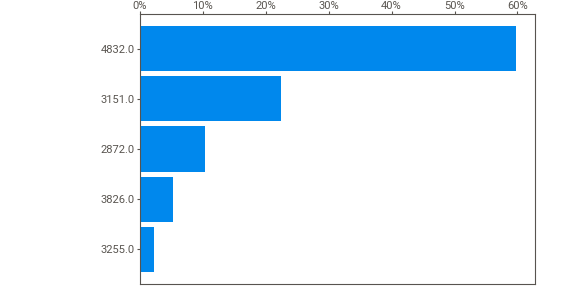
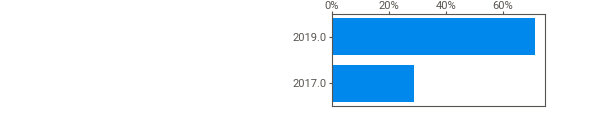
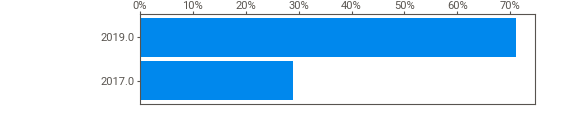
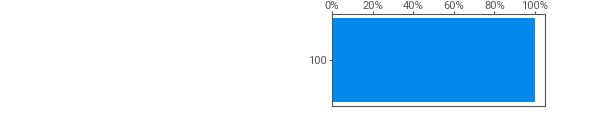
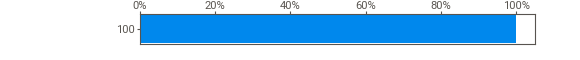
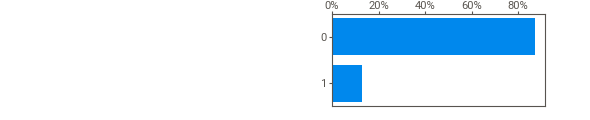
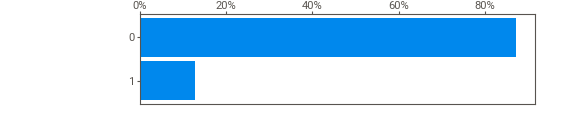
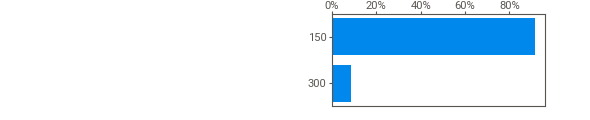
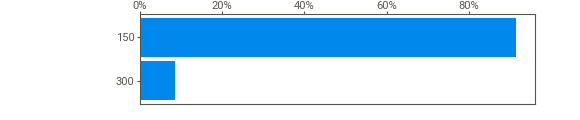
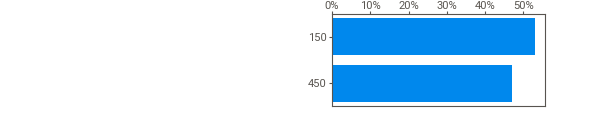
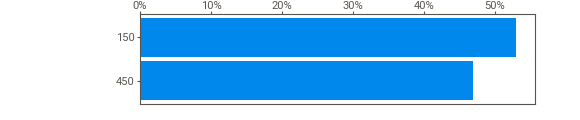
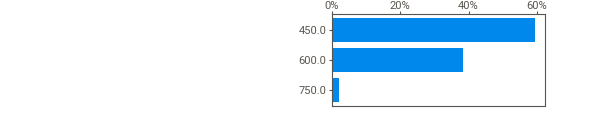
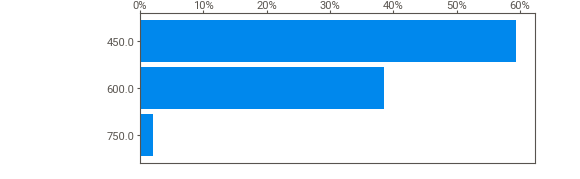
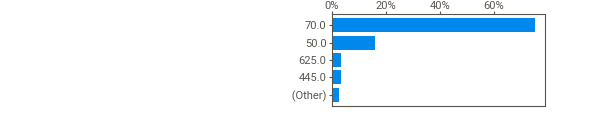
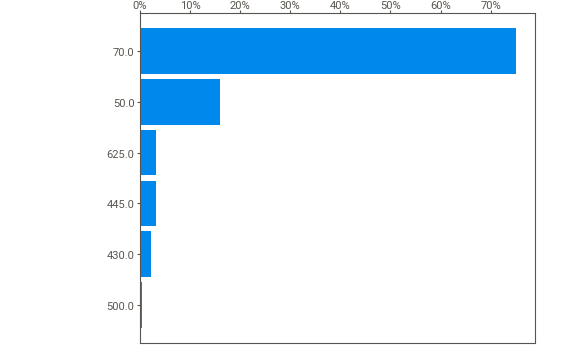
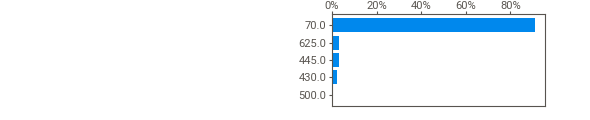
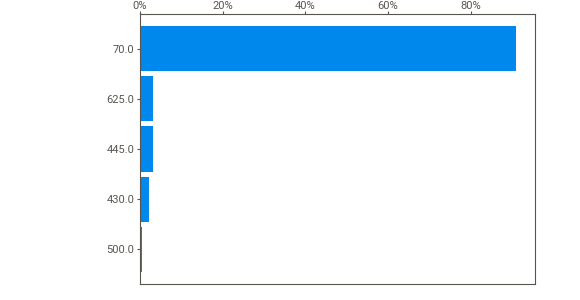
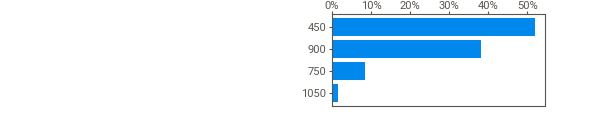
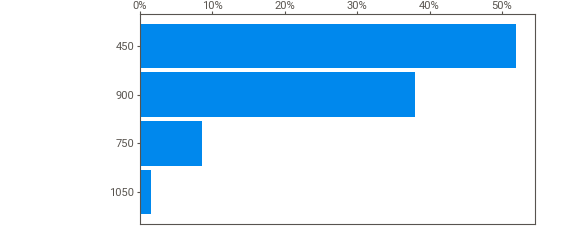
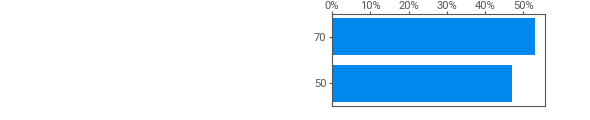
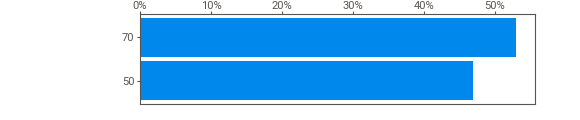
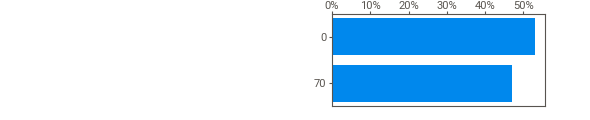
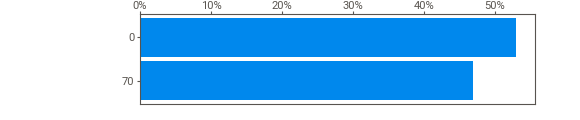
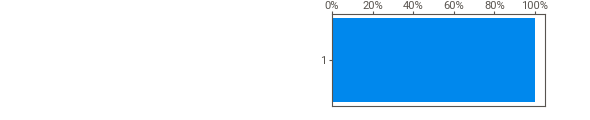
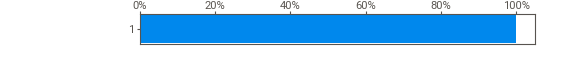
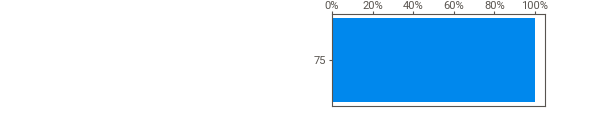
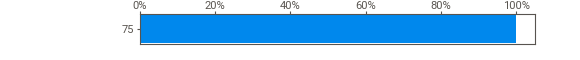
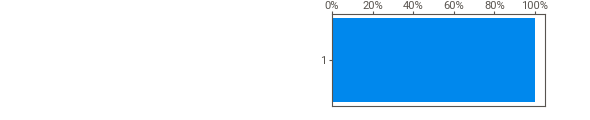
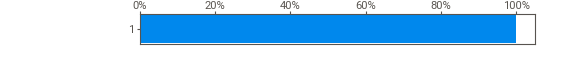
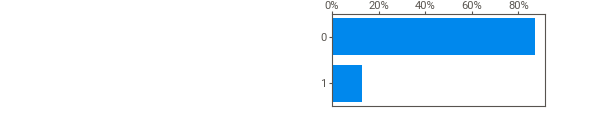
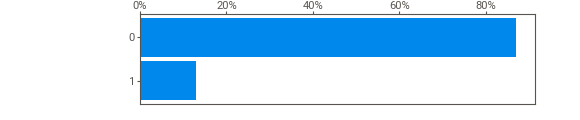
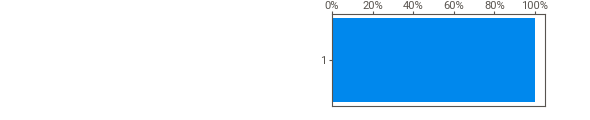
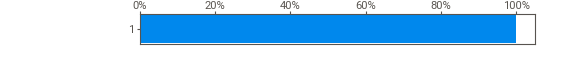
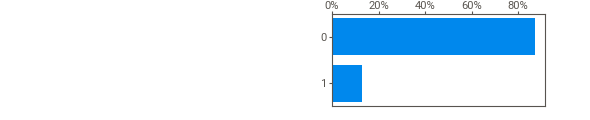
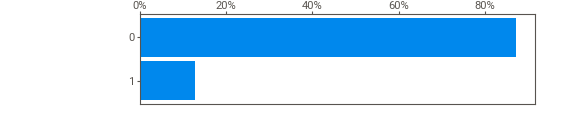
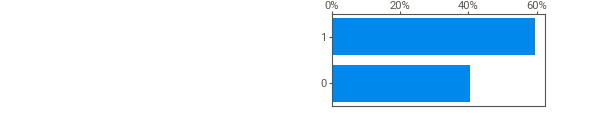
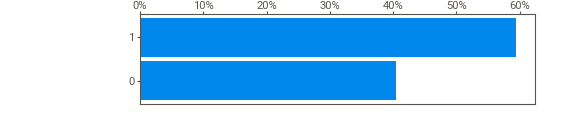
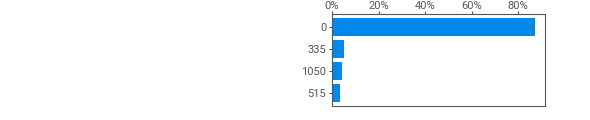
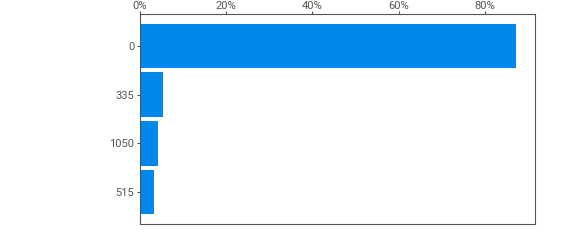
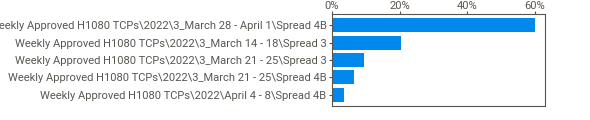
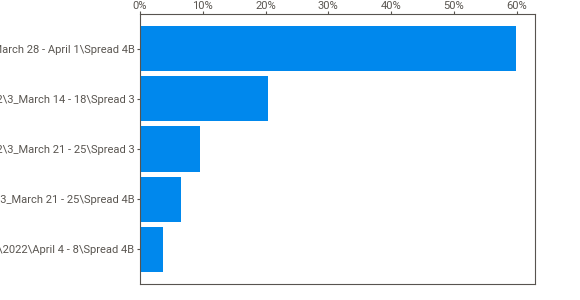
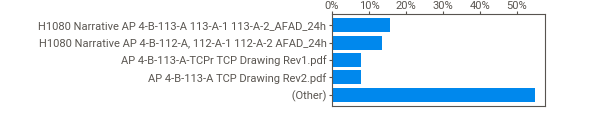
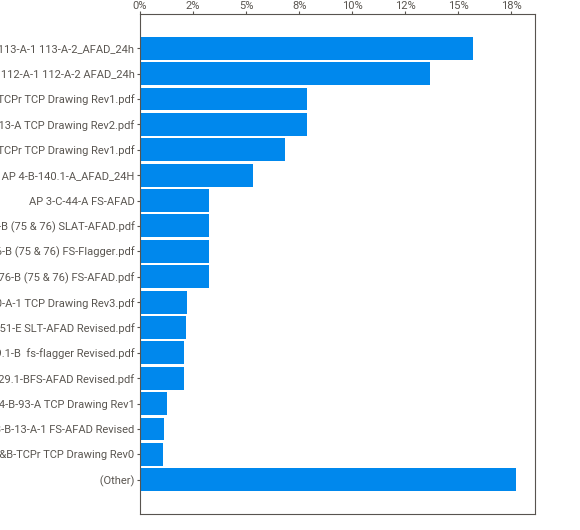
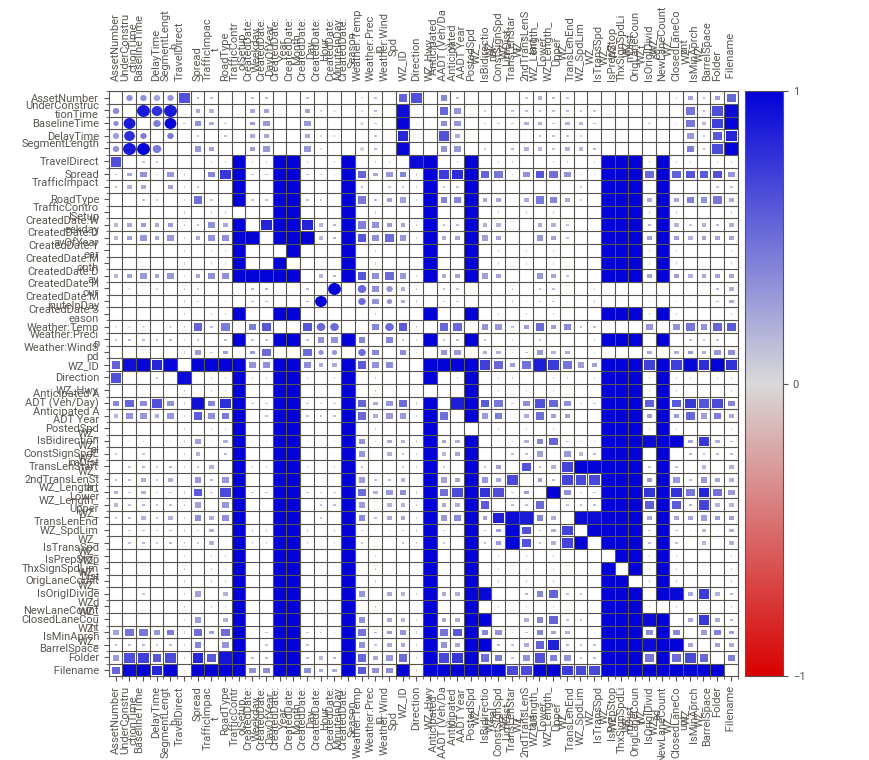
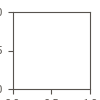

Report 'sweetviz_report.html' was saved to storage.


In [16]:
import sweetviz as sv

eda_report = sv.analyze(df_processed.drop(columns='WZ_Length'))
eda_report.show_notebook(filepath='sweetviz_report.html')

#### Correlation Matrix

C:\Users\yegmo\AppData\Local\Temp\ipykernel_7012\4257121400.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_processed.corr()


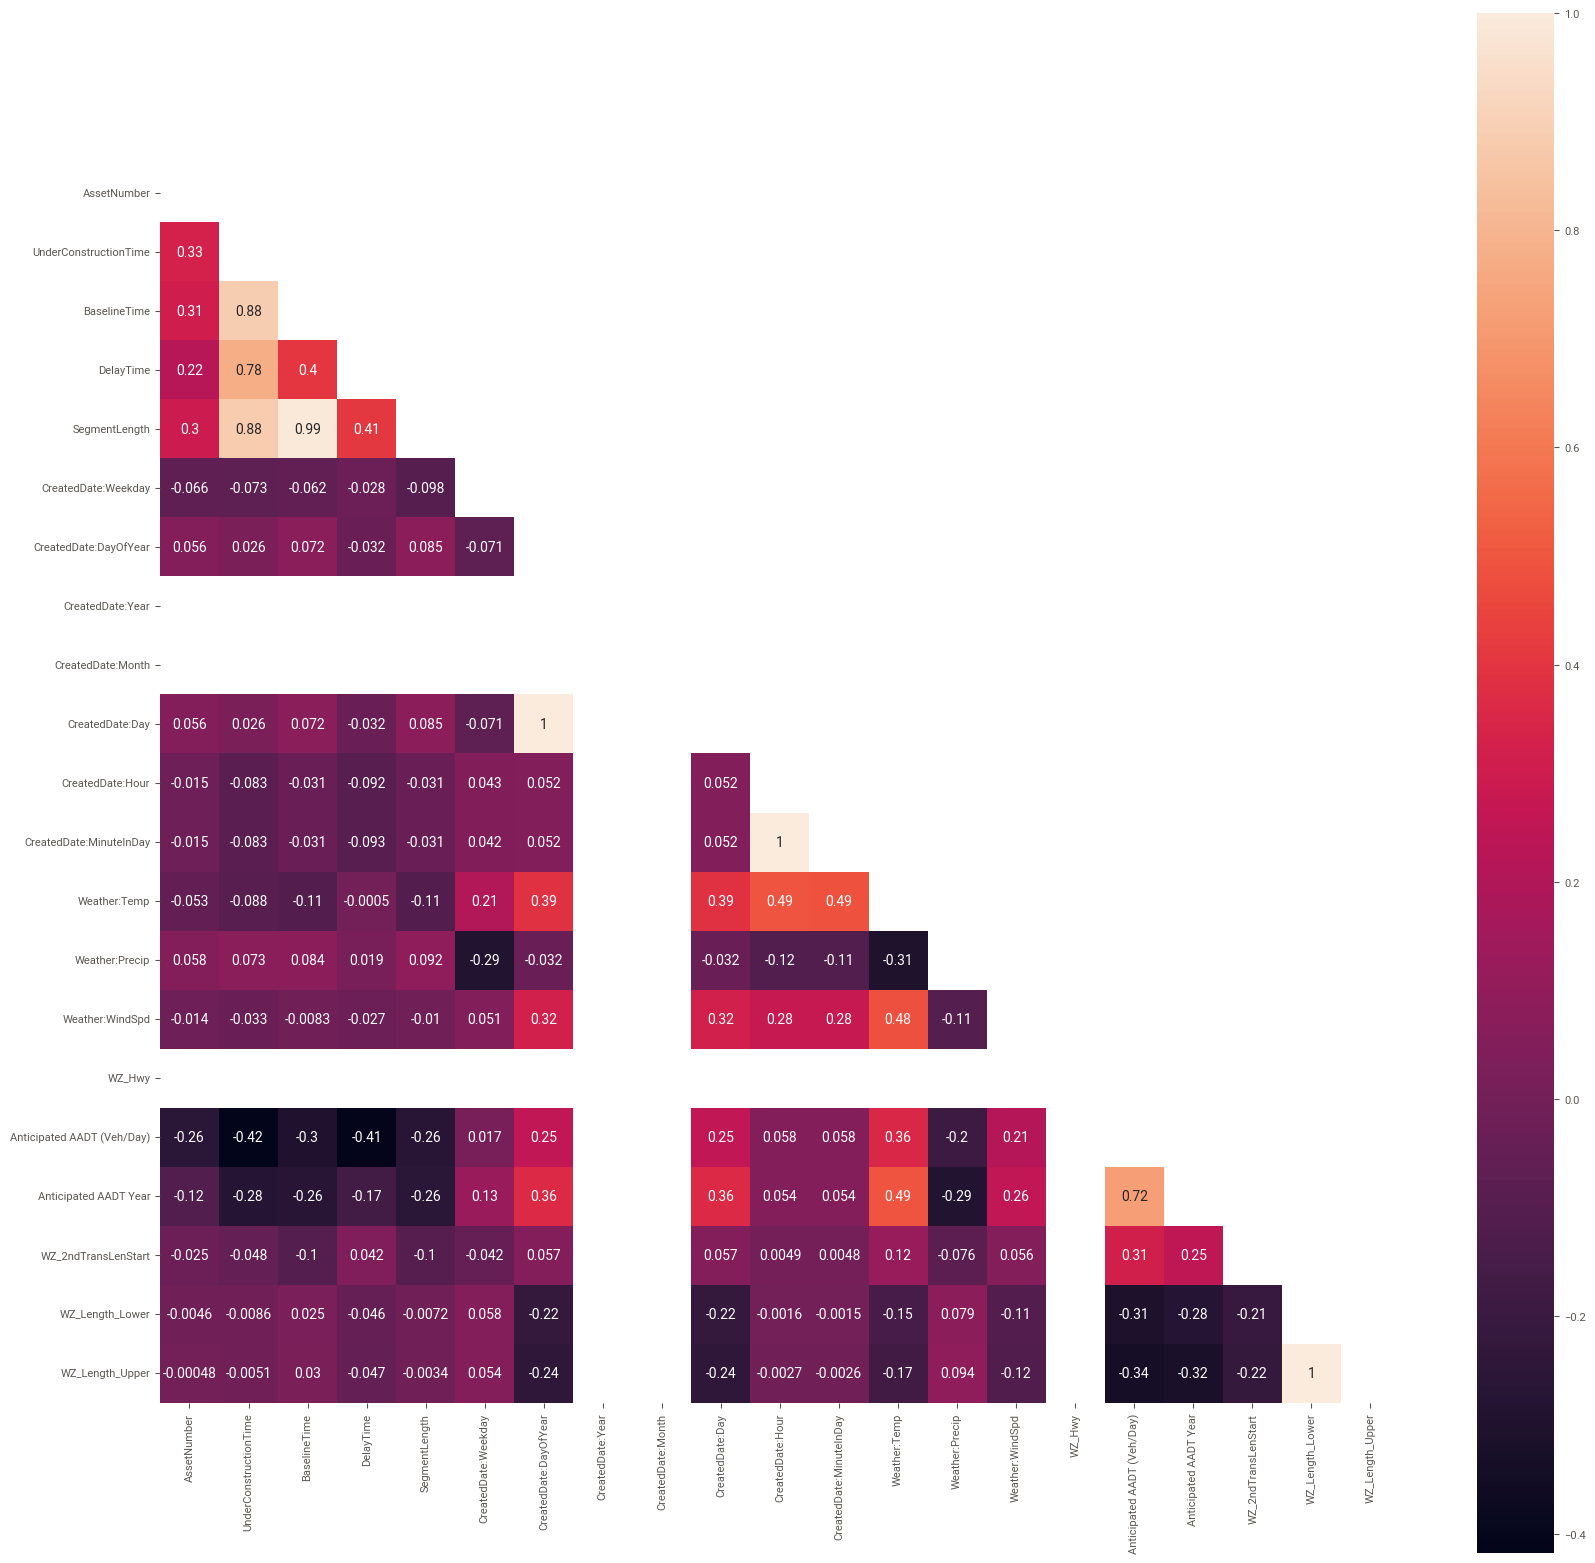

In [17]:
corr_mat = df_processed.corr()
mask = np.triu(np.ones_like(corr_mat))
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, mask=mask, annot=True, square=True)
plt.show()
fig.savefig(os.path.join(output_root_path, 'correlation_matrix.png'))

#### Box plot

<AxesSubplot: >

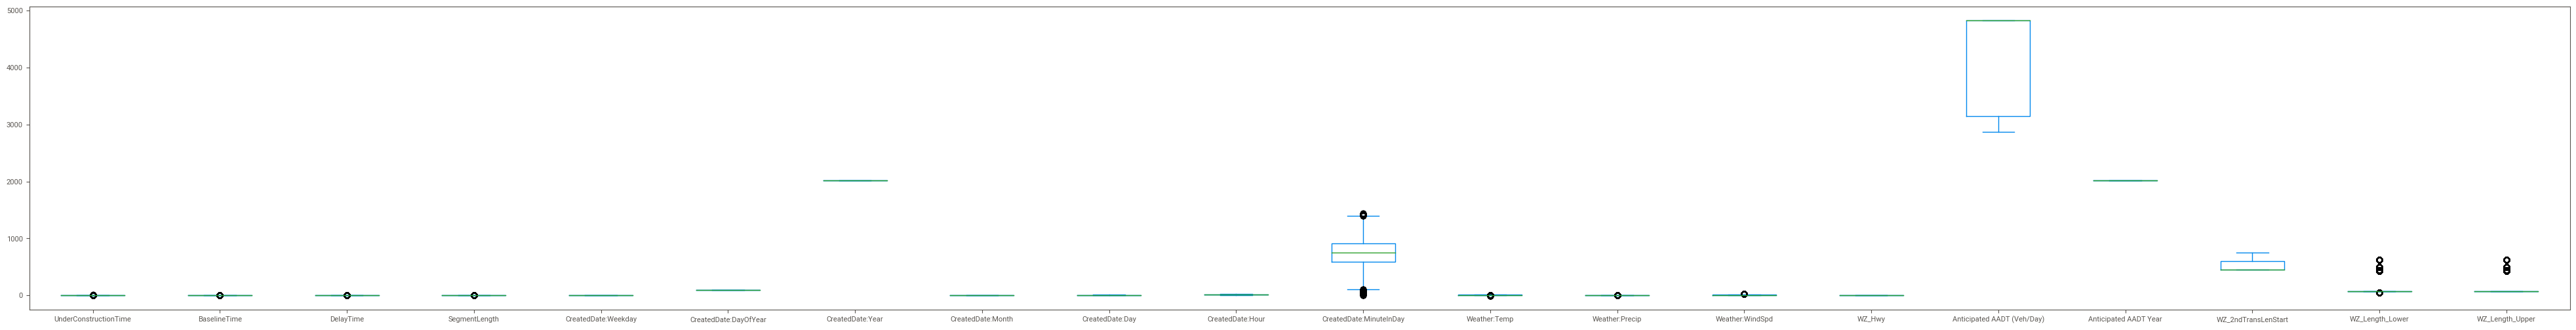

In [18]:
df_processed.drop(columns='AssetNumber').plot(kind='box', figsize=(50,6))

In [19]:
# all = df_filtered['AssetNumber'].unique()
# got = df_processed['AssetNumber'].unique()
# want = all[~np.isin(all, got)]
#
# assets = pd.read_csv(os.path.join(input_root_path, 'AssetInfo\\unique_assets_full_info.csv'))
# # df_filtered[df_filtered['AssetNumber'].isin(want)]
# pd.DataFrame(want).to_csv('where_are_you2.csv')

## Median Dataset

In [20]:
# mins = df_processed.min()
# meds = df_processed.median()
# base = meds.combine_first(mins)
#
# meds_inputs = {}
#
# for i in range(df_processed.shape[1]):
#     feature = df_processed.columns[i]
#
#     if feature not in meds.keys():
#         continue
#
#     specific_med_all = []
#     minimum = df_processed[feature].min()
#     maximum = df_processed[feature].max()
#     if minimum == maximum:
#         continue
#     arr = np.arange(minimum, maximum, (maximum - minimum)/100)
#
#     for variation in arr:
#         specific_med_one = list(base)
#         specific_med_one[i] = variation
#         specific_med_all.append(specific_med_one)
#
#     meds_inputs[feature] =  specific_med_all
# # print(x.columns[i], inputs_list.shape)
# meds_inputs.keys()

# Process features

In [21]:
GROWTH_RATE = 0.01
df_processed['WZ_CalculatedAADT'] = df_processed['Anticipated AADT (Veh/Day)'] * (
            1 + (GROWTH_RATE * (df_processed['CreatedDate:Year'] - df_processed['Anticipated AADT Year'])))

In [22]:
df_processed['CreatedDate:Season_Code'] = df_processed['CreatedDate:Month'] % 12 // 3 + 1

In [23]:
df_processed['TravelDirect_Code'] = np.where(df_processed['TravelDirect'] == 'NB', 1, 0)

In [24]:
drop_cols = ['WZ_ID', 'Direction', 'Anticipated AADT (Veh/Day)', 'Anticipated AADT Year', 'Folder', ' Filename']
df_processed = df_processed.drop(columns=drop_cols)
df_processed

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0      49831911074                   2.25          2.13       0.12   
1      49831911074                   2.25          2.13       0.12   
2      49831911074                   2.25          2.13       0.12   
3      49831911074                   2.25          2.13       0.12   
4      49831911074                   2.25          2.13       0.12   
...            ...                    ...           ...        ...   
65308  75723709666                   4.53          3.62       0.91   
65309  75723709666                   4.52          3.62       0.90   
65310  75723709666                   4.52          3.62       0.90   
65311  75723709666                   4.52          3.62       0.90   
65312  75723709666                   4.47          3.62       0.85   

       SegmentLength TravelDirect     Spread TrafficImpact  \
0               3.36           SB  Spread 3B          High   
1               3.36           SB  Spread 3B          High   
2               3.36           SB  Spread 3B          High   
3               3.36           SB  Spread 3B          High   
4               3.36           SB  Spread 3B          High   
...              ...          ...        ...           ...   
65308           6.00           SB  Spread 4B          High   
65309           6.00           SB  Spread 4B          High   
65310           6.00           SB  Spread 4B          High   
65311           6.00           SB  Spread 4B          High   
65312           6.00           SB  Spread 4B          High   

                                    RoadType TrafficControlSetup  ...  \
0      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                      ...                 ...  ...   
65308  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65309  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65310  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65311  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65312  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

       WZ_ThxSignSpdLimDist  WZ_OrigLaneCount  WZ_IsOrigIDivided  \
0                        75                 1                  1   
1                        75                 1                  1   
2                        75                 1                  1   
3                        75                 1                  1   
4                        75                 1                  1   
...                     ...               ...                ...   
65308                    75                 1                  0   
65309                    75                 1                  0   
65310                    75                 1                  0   
65311                    75                 1                  0   
65312                    75                 1                  0   

       WZ_NewLaneCount  WZ_ClosedLaneCount  WZ_IsMinAprch  WZ_BarrelSpace  \
0                    1                   1              0            1050   
1                    1                   1              0            1050   
2                    1                   1              0            1050   
3                    1                   1              0            1050   
4                    1                   1              0            1050   
...                ...                 ...            ...             ...   
65308                1                   0              1               0   
65309                1                   0              1               0   
65310                1            

## Cyclical features encoding

In [25]:
cyclical_cols = ["CreatedDate:Season_Code", "CreatedDate:Month", "CreatedDate:Day", "CreatedDate:DayOfYear",
                 "CreatedDate:Weekday", "CreatedDate:Hour", "CreatedDate:MinuteInDay"]
for col in cyclical_cols:
    scaler = skl_preprocessing.MinMaxScaler(feature_range=(-1, 1))
    df_processed[col + "_norm"] = scaler.fit_transform(df_processed[col].to_numpy().reshape(-1, 1)) * np.pi
    df_processed[col + "_sin"] = np.sin(df_processed[col])
    df_processed[col + "_cos"] = np.cos(df_processed[col])

df_processed

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0      49831911074                   2.25          2.13       0.12   
1      49831911074                   2.25          2.13       0.12   
2      49831911074                   2.25          2.13       0.12   
3      49831911074                   2.25          2.13       0.12   
4      49831911074                   2.25          2.13       0.12   
...            ...                    ...           ...        ...   
65308  75723709666                   4.53          3.62       0.91   
65309  75723709666                   4.52          3.62       0.90   
65310  75723709666                   4.52          3.62       0.90   
65311  75723709666                   4.52          3.62       0.90   
65312  75723709666                   4.47          3.62       0.85   

       SegmentLength TravelDirect     Spread TrafficImpact  \
0               3.36           SB  Spread 3B          High   
1               3.36           SB  Spread 3B          High   
2               3.36           SB  Spread 3B          High   
3               3.36           SB  Spread 3B          High   
4               3.36           SB  Spread 3B          High   
...              ...          ...        ...           ...   
65308           6.00           SB  Spread 4B          High   
65309           6.00           SB  Spread 4B          High   
65310           6.00           SB  Spread 4B          High   
65311           6.00           SB  Spread 4B          High   
65312           6.00           SB  Spread 4B          High   

                                    RoadType TrafficControlSetup  ...  \
0      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                      ...                 ...  ...   
65308  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65309  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65310  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65311  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65312  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

       CreatedDate:DayOfYear_cos  CreatedDate:Weekday_norm  \
0                       0.969459                 -3.141593   
1                       0.969459                 -3.141593   
2                       0.969459                 -3.141593   
3                       0.969459                 -3.141593   
4                       0.969459                 -3.141593   
...                          ...                       ...   
65308                  -0.626444                  3.141593   
65309                  -0.626444                  3.141593   
65310                  -0.626444                  3.141593   
65311                  -0.626444                  3.141593   
65312                  -0.626444                  3.141593   

       CreatedDate:Weekday_sin  CreatedDate:Weekday_cos  \
0                     0.000000                 1.000000   
1                     0.000000                 1.000000   
2                     0.000000                 1.000000   
3                     0.000000                 1.000000   
4                     0.000000                 1.000000   
...                        ...                      ...   
65308                -0.958924                 0.283662   
65309                -0.958924                 0.283662   
65310                -0.958924                 0.283662   
65311                -0.958924                 0.283662   
65312                -0.958924                 0.283662   

       CreatedDate:Hour_norm  CreatedDate:Hour_sin  CreatedDate:Hour_cos  \
0             

## One-hot encoding

In [26]:
onehot_cols = ['Spread', 'TrafficImpact', 'RoadType', 'TrafficControlSetup']
for col in onehot_cols:
    label_encoder = skl_preprocessing.LabelEncoder()

    integer_encoded = label_encoder.fit_transform(df_processed[col])
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

    onehot_encoder = skl_preprocessing.OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    onehot_df = pd.DataFrame(onehot_encoded, columns=[col + ':' + category.replace(" ", "") + "_onehot" for category in
                                                      df_processed[col].unique()])
    df_processed = df_processed.join(onehot_df)

df_processed

D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unles

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0      49831911074                   2.25          2.13       0.12   
1      49831911074                   2.25          2.13       0.12   
2      49831911074                   2.25          2.13       0.12   
3      49831911074                   2.25          2.13       0.12   
4      49831911074                   2.25          2.13       0.12   
...            ...                    ...           ...        ...   
65308  75723709666                   4.53          3.62       0.91   
65309  75723709666                   4.52          3.62       0.90   
65310  75723709666                   4.52          3.62       0.90   
65311  75723709666                   4.52          3.62       0.90   
65312  75723709666                   4.47          3.62       0.85   

       SegmentLength TravelDirect     Spread TrafficImpact  \
0               3.36           SB  Spread 3B          High   
1               3.36           SB  Spread 3B          High   
2               3.36           SB  Spread 3B          High   
3               3.36           SB  Spread 3B          High   
4               3.36           SB  Spread 3B          High   
...              ...          ...        ...           ...   
65308           6.00           SB  Spread 4B          High   
65309           6.00           SB  Spread 4B          High   
65310           6.00           SB  Spread 4B          High   
65311           6.00           SB  Spread 4B          High   
65312           6.00           SB  Spread 4B          High   

                                    RoadType TrafficControlSetup  ...  \
0      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                      ...                 ...  ...   
65308  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65309  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65310  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65311  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65312  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

       CreatedDate:MinuteInDay_cos  Spread:Spread3B_onehot  \
0                        -0.907409                     1.0   
1                        -0.907409                     1.0   
2                        -0.004516                     1.0   
3                        -0.004516                     1.0   
4                         0.911168                     1.0   
...                            ...                     ...   
65308                     0.998593                     0.0   
65309                    -0.463775                     0.0   
65310                    -0.612596                     0.0   
65311                     0.334109                     0.0   
65312                     0.718006                     0.0   

       Spread:Spread3C_onehot  Spread:Spread4A_onehot  Spread:Spread4B_onehot  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
65308                     0.0                     0.0                     1.0   
65309                     0.0                     0.0                     1.0   
65310                     0.0                     0.0                 

## Normalize

In [27]:
df_processed.columns

Index(['AssetNumber', 'UnderConstructionTime', 'BaselineTime', 'DelayTime',
       'SegmentLength', 'TravelDirect', 'Spread', 'TrafficImpact', 'RoadType',
       'TrafficControlSetup', 'CreatedDate:Weekday', 'CreatedDate:DayOfYear',
       'CreatedDate:Year', 'CreatedDate:Month', 'CreatedDate:Day',
       'CreatedDate:Hour', 'CreatedDate:MinuteInDay', 'CreatedDate:Season',
       'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd', 'WZ_Hwy',
       'PostedSpd', 'WZ_IsBidirectional', 'WZ_ConstSignSpdLimDist',
       'WZ_TransLenStart', 'WZ_2ndTransLenStart', 'WZ_Length',
       'WZ_Length_Lower', 'WZ_Length_Upper', 'WZ_TransLenEnd', 'WZ_SpdLim',
       'WZ_IsTransSpd', 'WZ_IsPrepStop', 'WZ_ThxSignSpdLimDist',
       'WZ_OrigLaneCount', 'WZ_IsOrigIDivided', 'WZ_NewLaneCount',
       'WZ_ClosedLaneCount', 'WZ_IsMinAprch', 'WZ_BarrelSpace',
       'WZ_CalculatedAADT', 'CreatedDate:Season_Code', 'TravelDirect_Code',
       'CreatedDate:Season_Code_norm', 'CreatedDate:Season_Code_sin',
     

In [28]:
norm_cols = ['UnderConstructionTime', 'BaselineTime', 'DelayTime', 'SegmentLength',
             'CreatedDate:Year', 'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd',
             'AssetNumber', 'WZ_Hwy',
             'PostedSpd', 'WZ_ConstSignSpdLimDist', 'WZ_TransLenStart', 'WZ_2ndTransLenStart',
             'WZ_Length_Lower', 'WZ_Length_Upper',
             'WZ_TransLenEnd', 'WZ_SpdLim', 'WZ_ThxSignSpdLimDist',
             'WZ_OrigLaneCount', 'WZ_NewLaneCount', 'WZ_ClosedLaneCount',
             'WZ_BarrelSpace', 'WZ_CalculatedAADT']
for col in norm_cols:
    df_processed[col] = df_processed[col].astype(float)
    norm_layer = tf_preprocessing.Normalization()
    norm_layer.adapt(df_processed[col])
    df_processed[col + "_norm"] = norm_layer(df_processed[col]).numpy().reshape(-1)
    print(col, "DONE!")

df_processed

UnderConstructionTime DONE!
BaselineTime DONE!
DelayTime DONE!
SegmentLength DONE!
CreatedDate:Year DONE!
Weather:Temp DONE!
Weather:Precip DONE!
Weather:WindSpd DONE!
AssetNumber DONE!
WZ_Hwy DONE!
PostedSpd DONE!
WZ_ConstSignSpdLimDist DONE!
WZ_TransLenStart DONE!
WZ_2ndTransLenStart DONE!
WZ_Length_Lower DONE!
WZ_Length_Upper DONE!
WZ_TransLenEnd DONE!
WZ_SpdLim DONE!
WZ_ThxSignSpdLimDist DONE!
WZ_OrigLaneCount DONE!
WZ_NewLaneCount DONE!
WZ_ClosedLaneCount DONE!
WZ_BarrelSpace DONE!
WZ_CalculatedAADT DONE!


AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0      4.983191e+10                   2.25          2.13       0.12   
1      4.983191e+10                   2.25          2.13       0.12   
2      4.983191e+10                   2.25          2.13       0.12   
3      4.983191e+10                   2.25          2.13       0.12   
4      4.983191e+10                   2.25          2.13       0.12   
...             ...                    ...           ...        ...   
65308  7.572371e+10                   4.53          3.62       0.91   
65309  7.572371e+10                   4.52          3.62       0.90   
65310  7.572371e+10                   4.52          3.62       0.90   
65311  7.572371e+10                   4.52          3.62       0.90   
65312  7.572371e+10                   4.47          3.62       0.85   

       SegmentLength TravelDirect     Spread TrafficImpact  \
0               3.36           SB  Spread 3B          High   
1               3.36           SB  Spread 3B          High   
2               3.36           SB  Spread 3B          High   
3               3.36           SB  Spread 3B          High   
4               3.36           SB  Spread 3B          High   
...              ...          ...        ...           ...   
65308           6.00           SB  Spread 4B          High   
65309           6.00           SB  Spread 4B          High   
65310           6.00           SB  Spread 4B          High   
65311           6.00           SB  Spread 4B          High   
65312           6.00           SB  Spread 4B          High   

                                    RoadType TrafficControlSetup  ...  \
0      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4      Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                      ...                 ...  ...   
65308  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65309  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65310  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65311  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
65312  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

       WZ_Length_Lower_norm  WZ_Length_Upper_norm  WZ_TransLenEnd_norm  \
0                 -0.434512             -0.307325             1.804838   
1                 -0.434512             -0.307325             0.431968   
2                 -0.434512             -0.307325             1.804838   
3                 -0.434512             -0.307325             0.431968   
4                 -0.434512             -0.307325             1.804838   
...                     ...                   ...                  ...   
65308             -0.279890             -0.307325            -0.940902   
65309             -0.279890             -0.307325            -0.940902   
65310             -0.279890             -0.307325            -0.940902   
65311             -0.279890             -0.307325            -0.940902   
65312             -0.279890             -0.307325            -0.940902   

       WZ_SpdLim_norm  WZ_ThxSignSpdLimDist_norm  WZ_OrigLaneCount_norm  \
0           -1.062174                   0.231293                    0.0   
1            0.941468                   0.231293                    0.0   
2           -1.062174                   0.231293                    0.0   
3            0.941468                   0.231293                    0.0   
4           -1.062174                   0.231293                    0.0   
...               ...                        ...                    ...   
65308        0.941468                   0.231293                    0.0   
65309        0.941468                   0.23

## EDA

### General

In [29]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65313 entries, 0 to 65312
Data columns (total 98 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AssetNumber                                        65313 non-null  float64
 1   UnderConstructionTime                              65313 non-null  float64
 2   BaselineTime                                       65313 non-null  float64
 3   DelayTime                                          65313 non-null  float64
 4   SegmentLength                                      65313 non-null  float64
 5   TravelDirect                                       65313 non-null  object 
 6   Spread                                             65313 non-null  object 
 7   TrafficImpact                                      65313 non-null  object 
 8   RoadType                                           65313 non-null  object 
 9   Traffi

In [30]:
df_processed.isnull().sum()

AssetNumber                0
UnderConstructionTime      0
BaselineTime               0
DelayTime                  0
SegmentLength              0
                          ..
WZ_OrigLaneCount_norm      0
WZ_NewLaneCount_norm       0
WZ_ClosedLaneCount_norm    0
WZ_BarrelSpace_norm        0
WZ_CalculatedAADT_norm     0
Length: 98, dtype: int64

In [31]:
df_processed.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

count               mean                std  \
AssetNumber              65313.00000  47932832333.95307  28824623970.89594   
UnderConstructionTime    65313.00000            2.06133            0.79308   
BaselineTime             65313.00000            1.94615            0.59291   
DelayTime                65313.00000            0.15179            0.36119   
SegmentLength            65313.00000            3.09117            0.81980   
...                              ...                ...                ...   
WZ_OrigLaneCount_norm    65313.00000            0.00000            0.00000   
WZ_NewLaneCount_norm     65313.00000            0.00000            0.00000   
WZ_ClosedLaneCount_norm  65313.00000           -0.00000            1.00000   
WZ_BarrelSpace_norm      65313.00000            0.00000            1.00001   
WZ_CalculatedAADT_norm   65313.00000           -0.00001            1.00001   

                                       min                25%  \
AssetNumber              10000204812.00000  21139648022.00000   
UnderConstructionTime              1.42000            1.58000   
BaselineTime                       1.52000            1.60000   
DelayTime                          0.00000            0.00000   
SegmentLength                      2.56700            2.64200   
...                                    ...                ...   
WZ_OrigLaneCount_norm              0.00000            0.00000   
WZ_NewLaneCount_norm               0.00000            0.00000   
WZ_ClosedLaneCount_norm           -0.38242           -0.38242   
WZ_BarrelSpace_norm               -0.33601           -0.33601   
WZ_CalculatedAADT_norm            -1.61425           -1.19561   

                                       50%                75%  \
AssetNumber              46651561024.00000  75803063451.00000   
UnderConstructionTime              1.67000            2.32000   
BaselineTime                       1.65000            2.18000   
DelayTime                          0.00000            0.14000   
SegmentLength                      2.68000            3.25000   
...                                    ...                ...   
WZ_OrigLaneCount_norm              0.00000            0.00000   
WZ_NewLaneCount_norm               0.00000            0.00000   
WZ_ClosedLaneCount_norm           -0.38242           -0.38242   
WZ_BarrelSpace_norm               -0.33601           -0.33601   
WZ_CalculatedAADT_norm             0.79774            0.79774   

                                       max  
AssetNumber              97354421485.00000  
UnderConstructionTime              8.93000  
BaselineTime                       4.47000  
DelayTime                          4.95000  
SegmentLength                      6.25000  
...                                    ...  
WZ_OrigLaneCount_norm              0.00000  
WZ_NewLaneCount_norm               0.00000  
WZ_ClosedLaneCount_norm            2.61492  
WZ_BarrelSpace_norm                4.16263  
WZ_CalculatedAADT_norm             0.79774  

[86 rows x 8 columns]

In [32]:
df_processed.describe(include='object').transpose()

count unique                                    top  \
TravelDirect         65313      2                                     NB   
Spread               65313      4                              Spread 4B   
TrafficImpact        65313      2                                   High   
RoadType             65313      2  Two-Lane, Two-Way Roadways (>70 km/h)   
TrafficControlSetup  65313      1                                   SLAT   
CreatedDate:Season   65313      1                                 Spring   
WZ_IsBidirectional   65313      2                                      0   
WZ_Length            65313      6                                     70   
WZ_IsTransSpd        65313      2                                      0   
WZ_IsPrepStop        65313      1                                      1   
WZ_IsOrigIDivided    65313      2                                      0   
WZ_IsMinAprch        65313      2                                      1   

                      freq  
TravelDirect         33419  
Spread               45084  
TrafficImpact        63189  
RoadType             50616  
TrafficControlSetup  65313  
CreatedDate:Season   65313  
WZ_IsBidirectional   56980  
WZ_Length            49046  
WZ_IsTransSpd        34624  
WZ_IsPrepStop        65313  
WZ_IsOrigIDivided    56850  
WZ_IsMinAprch        38843

In [33]:
df_processed.nunique()

AssetNumber                 52
UnderConstructionTime      392
BaselineTime                43
DelayTime                  353
SegmentLength               31
                          ... 
WZ_OrigLaneCount_norm        1
WZ_NewLaneCount_norm         1
WZ_ClosedLaneCount_norm      2
WZ_BarrelSpace_norm          4
WZ_CalculatedAADT_norm       7
Length: 98, dtype: int64

### Frequency

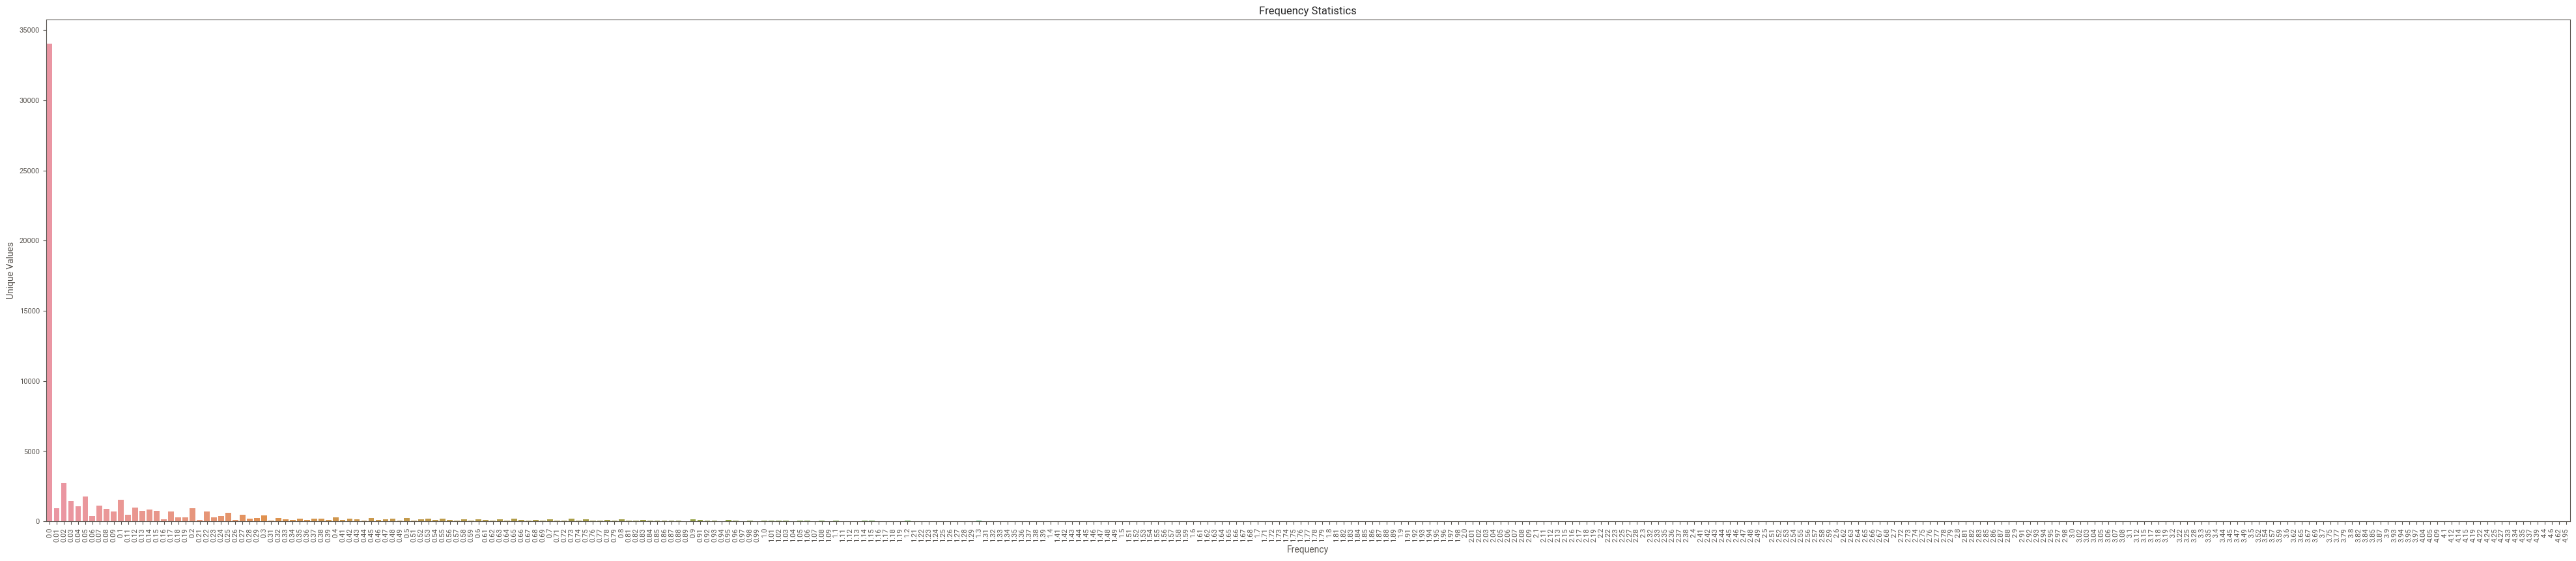

In [34]:
# df_processed.DelayTime.value_counts().plot(kind='barh')
fig = plt.figure(figsize=(50, 10))

ax = sns.countplot(data=df_processed, x='DelayTime')
ax.set_xlabel('Frequency')
ax.set_ylabel('Unique Values')
ax.set_title('Frequency Statistics')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Pairplot

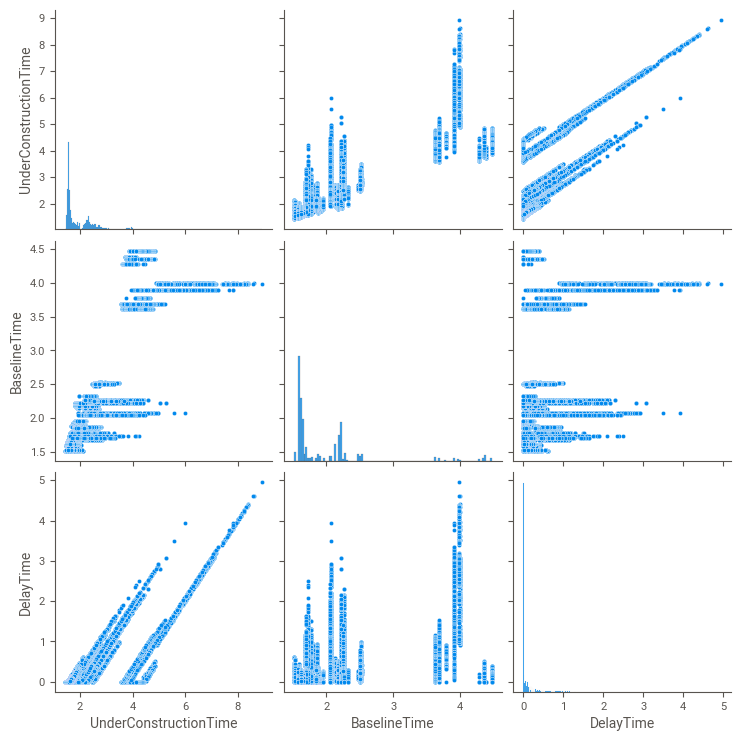

In [35]:
sns.pairplot(df_processed[['UnderConstructionTime', 'BaselineTime', 'DelayTime']])
plt.show()

### Histogram

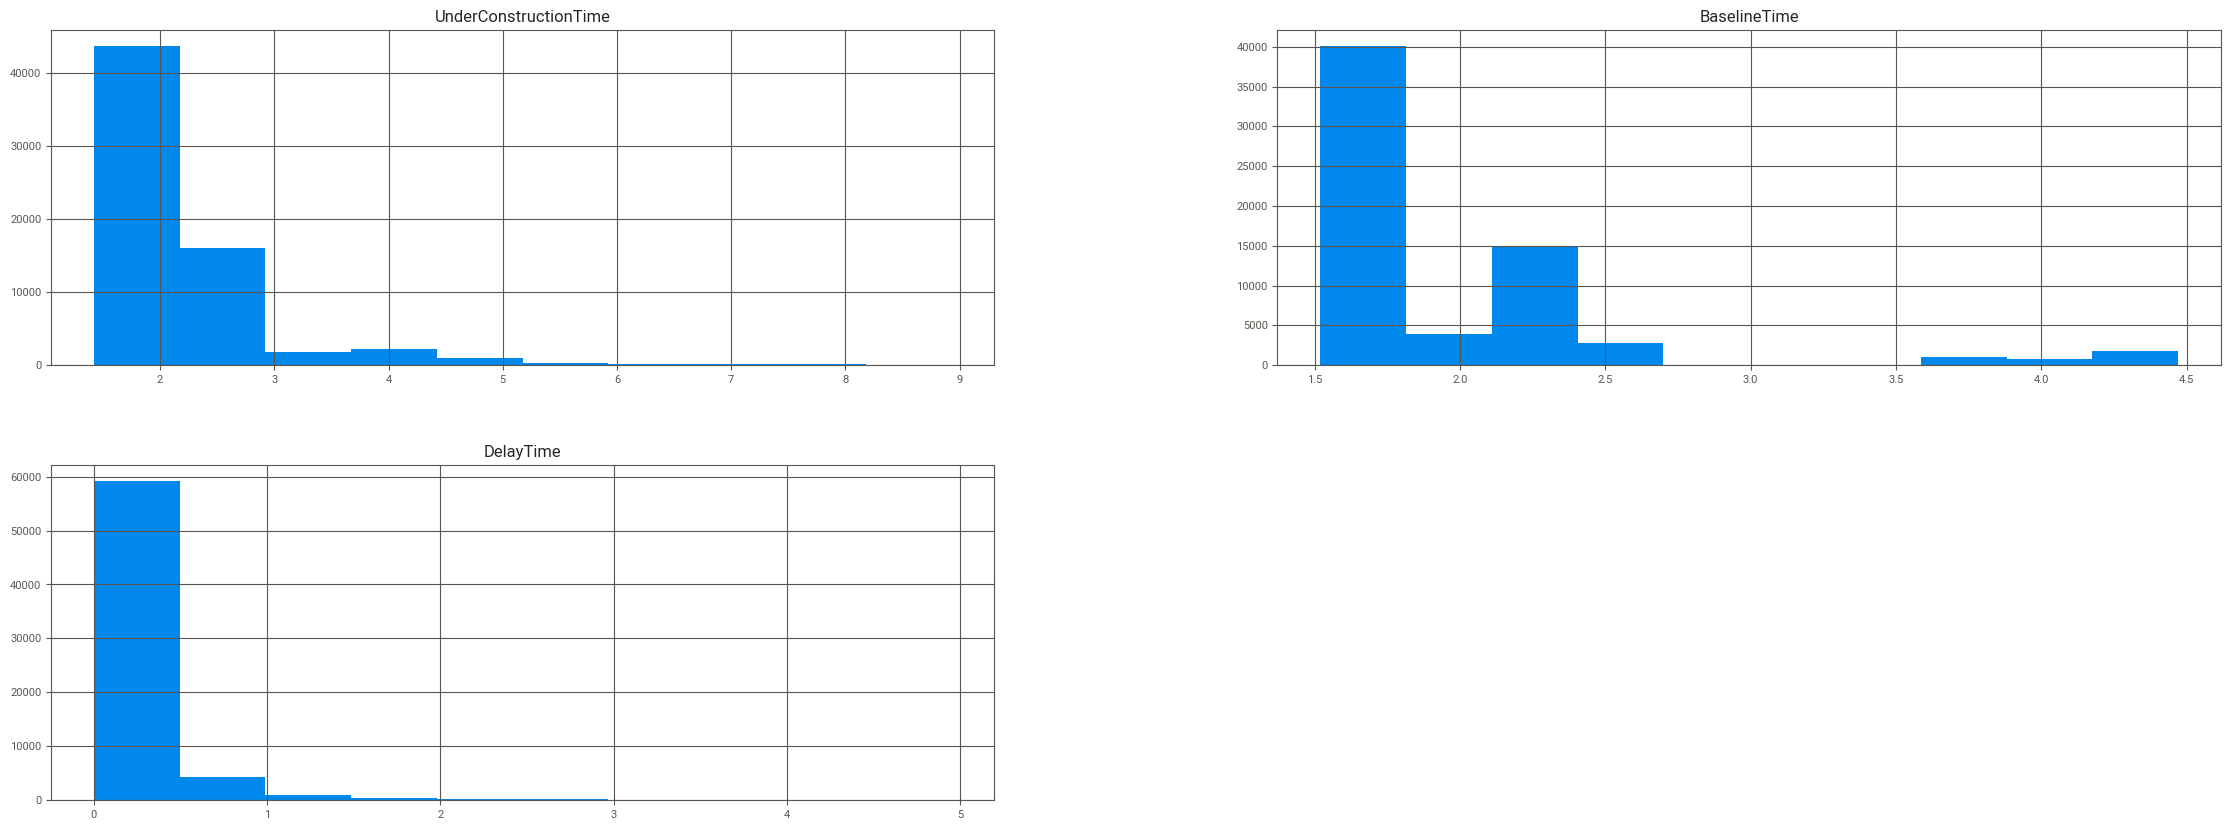

In [36]:
df_processed[['UnderConstructionTime', 'BaselineTime', 'DelayTime']].hist(figsize=(28, 10))
# count, division = np.histogram(df_processed['UnderConstructionTime'])
# print(count)
# print(division)
plt.show()

## Divide into training and test set

In [37]:
df_train, df_test = train_test_split(df_processed, test_size=0.1)
df_processed.columns
df_processed.nunique()

AssetNumber                 52
UnderConstructionTime      392
BaselineTime                43
DelayTime                  353
SegmentLength               31
                          ... 
WZ_OrigLaneCount_norm        1
WZ_NewLaneCount_norm         1
WZ_ClosedLaneCount_norm      2
WZ_BarrelSpace_norm          4
WZ_CalculatedAADT_norm       7
Length: 98, dtype: int64

### Selected Columns

In [38]:
drop_cols = set(df_processed.columns[df_processed.nunique() <= 1])

interest_cols = {
    # 'AssetNumber', 'WZ_Hwy_norm',
    'CreatedDate:Season_Code_sin', 'CreatedDate:Season_Code_cos',
    'CreatedDate:Month_sin', 'CreatedDate:Month_cos',
    'CreatedDate:Day_sin', 'CreatedDate:Day_cos',
    'CreatedDate:DayOfYear_sin', 'CreatedDate:DayOfYear_cos',
    'CreatedDate:Weekday_sin', 'CreatedDate:Weekday_cos',
    'CreatedDate:Hour_sin', 'CreatedDate:Hour_cos',
    'CreatedDate:MinuteInDay_sin', 'CreatedDate:MinuteInDay_cos',

    'TravelDirect_Code',
    'Spread:Spread3B_onehot', 'Spread:Spread3C_onehot', 'Spread:Spread4A_onehot', 'Spread:Spread4B_onehot', 'Spread:Reactivation_onehot', 'Spread:Spread5B_onehot',
    'TrafficImpact:Low_onehot', 'TrafficImpact:Moderate_onehot', 'TrafficImpact:High_onehot',
    'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'RoadType:Multi-LaneDivided_onehot',
    'TrafficControlSetup:SLAT_onehot', 'TrafficControlSetup:LaneClosure_onehot',

    'WZ_IsBidirectional', 'WZ_IsTransSpd', 'WZ_IsPrepStop', 'WZ_IsOrigIDivided', 'WZ_IsMinAprch',

    'CreatedDate:Year_norm',
    'SegmentLength_norm',
    'Weather:Temp_norm', 'Weather:Precip_norm', 'Weather:WindSpd_norm',
    # 'Traffic:CalculatedAADT_norm',
    'PostedSpd_norm',
    'WZ_TransLenStart_norm', 'WZ_2ndTransLenStart_norm', 'WZ_TransLenEnd_norm',
    'WZ_Length_Lower_norm',
    'WZ_ConstSignSpdLimDist_norm', 'WZ_ThxSignSpdLimDist_norm',
    'WZ_SpdLim_norm',
    'WZ_OrigLaneCount_norm', 'WZ_NewLaneCount_norm', 'WZ_ClosedLaneCount_norm',
    'WZ_BarrelSpace_norm',
    'WZ_CalculatedAADT_norm'}

x_cols = list(interest_cols - drop_cols)

# y_cols = ['UnderConstructionTime_norm', 'DelayTime_norm']
y_cols = ['UnderConstructionTime']

print("x_cols:\n", x_cols)
print("y_cols:\n", y_cols)

x_cols:
 ['WZ_BarrelSpace_norm', 'WZ_CalculatedAADT_norm', 'Weather:Temp_norm', 'SegmentLength_norm', 'Spread:Spread5B_onehot', 'TravelDirect_Code', 'WZ_2ndTransLenStart_norm', 'WZ_IsBidirectional', 'Spread:Reactivation_onehot', 'TrafficImpact:High_onehot', 'WZ_IsOrigIDivided', 'Spread:Spread4B_onehot', 'TrafficImpact:Moderate_onehot', 'CreatedDate:Weekday_cos', 'RoadType:Multi-LaneDivided_onehot', 'CreatedDate:MinuteInDay_cos', 'CreatedDate:MinuteInDay_sin', 'Spread:Spread3C_onehot', 'CreatedDate:DayOfYear_sin', 'Weather:Precip_norm', 'CreatedDate:Day_sin', 'CreatedDate:Hour_cos', 'Spread:Spread3B_onehot', 'CreatedDate:Hour_sin', 'CreatedDate:DayOfYear_cos', 'TrafficImpact:Low_onehot', 'WZ_IsTransSpd', 'WZ_ConstSignSpdLimDist_norm', 'WZ_IsMinAprch', 'CreatedDate:Day_cos', 'CreatedDate:Weekday_sin', 'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'Weather:WindSpd_norm', 'WZ_TransLenStart_norm', 'WZ_SpdLim_norm', 'Spread:Spread4A_onehot', 'TrafficControlSetup:LaneClosure_onehot', '

In [39]:
drop_cols = set(df_processed.columns[df_processed.nunique() <= 1])

interest_cols = {
    # 'AssetNumber', 'WZ_Hwy_norm',
    'CreatedDate:Season_Code',
    'CreatedDate:Month',
    'CreatedDate:Day',
    'CreatedDate:DayOfYear',
    'CreatedDate:Weekday',
    'CreatedDate:Hour',
    'CreatedDate:MinuteInDay',

    'TravelDirect_Code',
    'Spread:Spread3B_onehot', 'Spread:Spread3C_onehot', 'Spread:Spread4A_onehot', 'Spread:Spread4B_onehot', 'Spread:Reactivation_onehot', 'Spread:Spread5B_onehot',
    'TrafficImpact:Low_onehot', 'TrafficImpact:Moderate_onehot', 'TrafficImpact:High_onehot',
    'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'RoadType:Multi-LaneDivided_onehot',
    'TrafficControlSetup:SLAT_onehot', 'TrafficControlSetup:LaneClosure_onehot',

    'WZ_IsBidirectional', 'WZ_IsTransSpd', 'WZ_IsPrepStop', 'WZ_IsOrigIDivided', 'WZ_IsMinAprch',

    'CreatedDate:Year',
    'SegmentLength',
    'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd',
    # 'Traffic:CalculatedAADT_norm',
    'PostedSpd',
    'WZ_TransLenStart', 'WZ_2ndTransLenStart', 'WZ_TransLenEnd',
    'WZ_Length_Lower',
    'WZ_ConstSignSpdLimDist', 'WZ_ThxSignSpdLimDist',
    'WZ_SpdLim',
    'WZ_OrigLaneCount', 'WZ_NewLaneCount', 'WZ_ClosedLaneCount',
    'WZ_BarrelSpace',
    'WZ_CalculatedAADT'}

x_cols = list(interest_cols - drop_cols)

# y_cols = ['UnderConstructionTime_norm', 'DelayTime_norm']
y_cols = ['UnderConstructionTime']

print("x_cols:\n", x_cols)
print("y_cols:\n", y_cols)

x_cols:
 ['Weather:Temp', 'WZ_Length_Lower', 'Spread:Spread5B_onehot', 'TravelDirect_Code', 'Weather:Precip', 'CreatedDate:DayOfYear', 'WZ_CalculatedAADT', 'WZ_IsBidirectional', 'Spread:Reactivation_onehot', 'TrafficImpact:High_onehot', 'WZ_TransLenEnd', 'WZ_IsOrigIDivided', 'Spread:Spread4B_onehot', 'CreatedDate:Day', 'TrafficImpact:Moderate_onehot', 'RoadType:Multi-LaneDivided_onehot', 'WZ_ConstSignSpdLimDist', 'Spread:Spread3C_onehot', 'CreatedDate:Hour', 'Spread:Spread3B_onehot', 'TrafficImpact:Low_onehot', 'WZ_IsTransSpd', 'WZ_IsMinAprch', 'SegmentLength', 'CreatedDate:Weekday', 'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'WZ_ClosedLaneCount', 'WZ_TransLenStart', 'Spread:Spread4A_onehot', 'CreatedDate:MinuteInDay', 'WZ_SpdLim', 'TrafficControlSetup:LaneClosure_onehot', 'WZ_2ndTransLenStart', 'WZ_BarrelSpace', 'Weather:WindSpd']
y_cols:
 ['UnderConstructionTime']


In [40]:
x_train = df_train.filter(x_cols)
x_test = df_test.filter(x_cols)
print("train.shape:", x_train.shape)
print("test.shape:", x_test.shape)

y_train = df_train.filter(y_cols)
y_test = df_test.filter(y_cols)

# x_train = np.array(x_train.astype(np.float32))
# y_train = np.array(y_train.astype(np.float32))
# x_test = np.array(x_test.astype(np.float32))
# y_test = np.array(y_test.astype(np.float32))
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test = np.array(y_test)

train_dataset = TensorDataset(torch.tensor(np.array(x_train.astype(np.float32)), dtype=torch.float32), torch.tensor(np.array(y_train.astype(np.float32)), dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(np.array(x_test.astype(np.float32)), dtype=torch.float32), torch.tensor(np.array(y_test.astype(np.float32)), dtype=torch.float32))

train.shape: (58781, 30)
test.shape: (6532, 30)


### Training Set

In [41]:
# df_train = df_processed[~df_processed['AssetNumber'].isin(assets_no_cell)]
# df_train
# df_train.columns

# print(len(x_train.columns))
# print(x_train.columns)
# x_train
# y_train

### Test Set

In [42]:
# df_test = df_processed[df_processed['AssetNumber'].isin(assets_no_cell)]
# df_test
# x_test
# y_test


# Model

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = nn.Sequential(
            nn.Linear(x_train.shape[1], 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, len(y_cols))
        ).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

print(model)

Sequential(
  (0): Linear(in_features=30, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=512, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=512, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=128, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=128, out_features=1, bias=True)
)


## Fit

In [44]:
def calculate_evaluation_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    mape = mean_absolute_percentage_error(true, pred)
    r2 = r2_score(true, pred)

    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, R2 Score: {r2}\n")

    return [mse, rmse, mae, mape, r2]

In [45]:
n_epochs = 500
batch_size = 1024


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


for epoch in range(n_epochs):
    model.train()
    total_loss = 0.0
    for batch_inputs, batch_labels in train_loader:
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)
        batch_outputs = model(batch_inputs)

        optimizer.zero_grad()
        loss = criterion(batch_outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    total_loss /= len(train_loader)

    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            predictions = []
            true_labels = []

            for batch_inputs, batch_labels in val_loader:
                batch_inputs = batch_inputs.to(device)
                batch_labels = batch_labels.to(device)

                batch_outputs = model(batch_inputs)
                val_loss += criterion(batch_outputs, batch_labels).item()

                predictions.extend(batch_outputs.cpu().numpy())
                true_labels.extend(batch_labels.cpu().numpy())

            val_loss /= len(val_loader)

        print(f"Epoch: {epoch}, Training Loss: {total_loss}, Validation Loss: {val_loss}")

        true_labels = np.array(true_labels)
        predictions = np.array(predictions)
        calculate_evaluation_metrics(true_labels, predictions)


Epoch: 0, Training Loss: 92.51946487714504, Validation Loss: 1.083777666091919
MSE: 1.0983397960662842, RMSE: 1.0480170249938965, MAE: 0.6605347990989685, MAPE: 0.2579023241996765, R2 Score: -0.6610994266844732

Epoch: 10, Training Loss: 0.9073319609822899, Validation Loss: 0.6490390471049717
MSE: 0.6538220643997192, RMSE: 0.8085926175117493, MAE: 0.419397234916687, MAPE: 0.147824227809906, R2 Score: 0.011177237125734707

Epoch: 20, Training Loss: 0.7440001861802463, Validation Loss: 0.44530235869543894
MSE: 0.4449210464954376, RMSE: 0.6670240163803101, MAE: 0.3522409498691559, MAPE: 0.13176843523979187, R2 Score: 0.3271133966544546

Epoch: 30, Training Loss: 0.661917902272323, Validation Loss: 0.3931675340448107
MSE: 0.39221495389938354, RMSE: 0.6262706518173218, MAE: 0.3203984797000885, MAPE: 0.12108179181814194, R2 Score: 0.40682473900063165

Epoch: 40, Training Loss: 0.5646681662263542, Validation Loss: 0.33198181646210806
MSE: 0.33155688643455505, RMSE: 0.5758097767829895, MAE: 0.

## Evaluate Model

In [46]:
model = model.to('cpu')
# torch.tensor(np.array(x_train.astype(np.float32))

### Calculate Metrics

In [47]:
with torch.inference_mode():
    preds_train = model(torch.tensor(np.array(x_train.astype(np.float32)))).flatten()
    calculate_evaluation_metrics(y_train, preds_train)
y_train = y_train.to_numpy().flatten()

MSE: 0.06012598396376643, RMSE: 0.24520600311527127, MAE: 0.15359363469798293, MAPE: 0.06976419313306821, R2 Score: 0.9038552652377012



In [48]:
with torch.inference_mode():
    preds_test = model(torch.tensor(np.array(x_test.astype(np.float32)))).flatten()
    calculate_evaluation_metrics(y_test, preds_test)
y_test = y_test.to_numpy().flatten()

MSE: 0.060226927252386896, RMSE: 0.24541175043666286, MAE: 0.15441593085777808, MAPE: 0.0698816647620643, R2 Score: 0.9089144240790007



### Plot Predictions vs Actual

(1.0, 9.0)

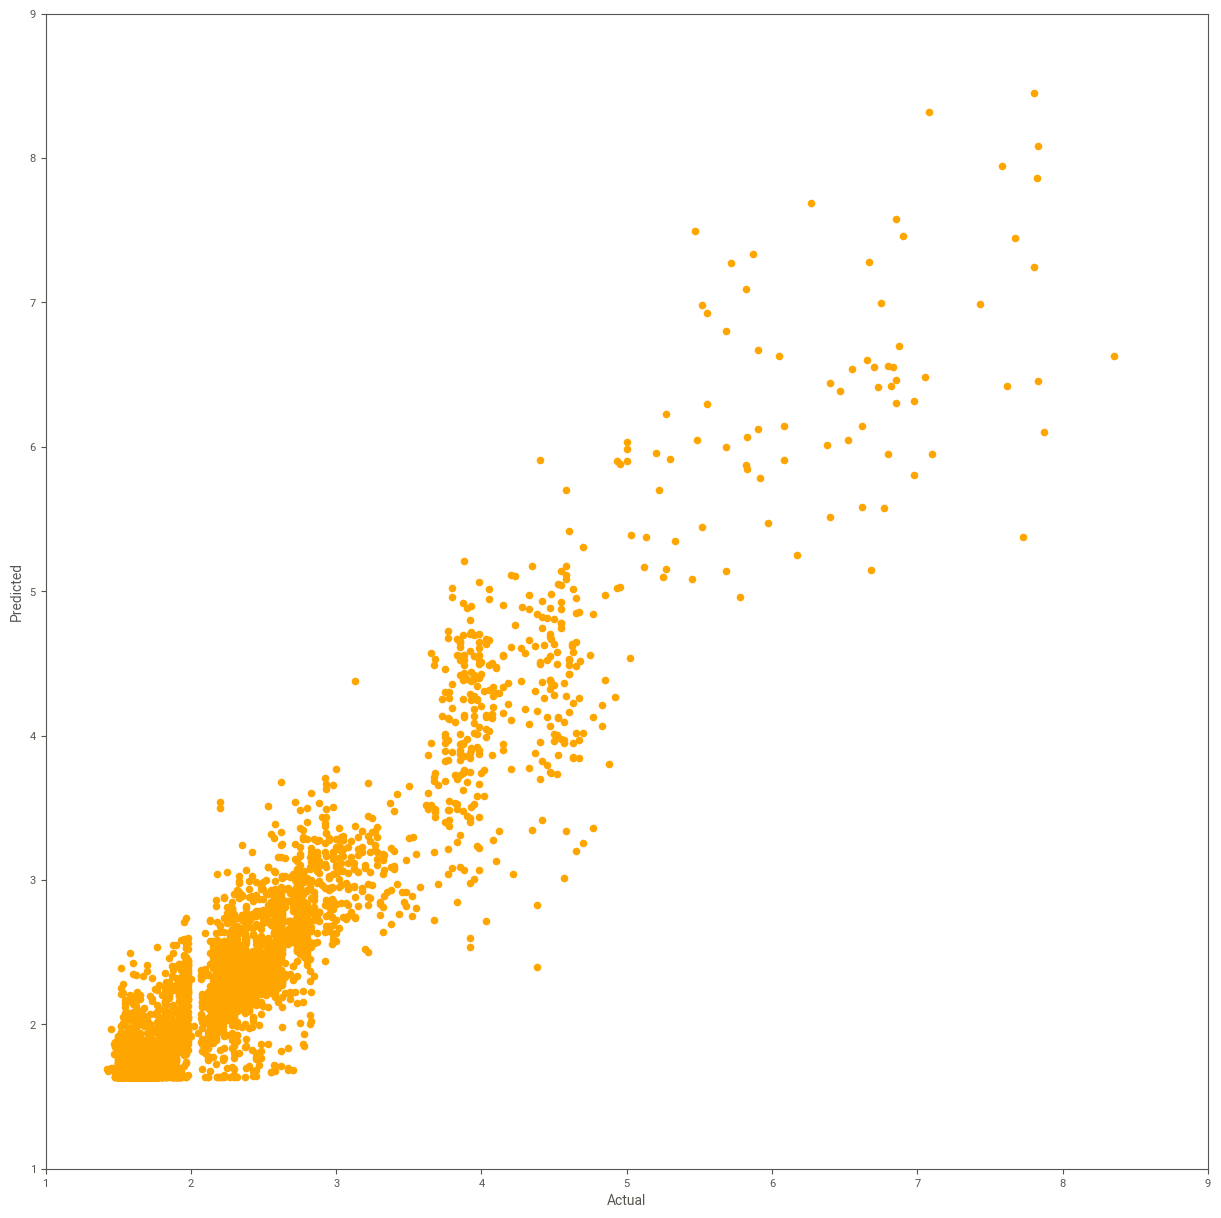

In [49]:
# plt.scatter(predictions, true_labels, color='green')
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': preds_test})
df_results.plot(kind='scatter', x='Actual', y='Predicted', figsize=(15,15), color='orange')
plt.xlim(1,9)
plt.ylim(1,9)
# plt.twinx()
# print(true_labels.flatten())

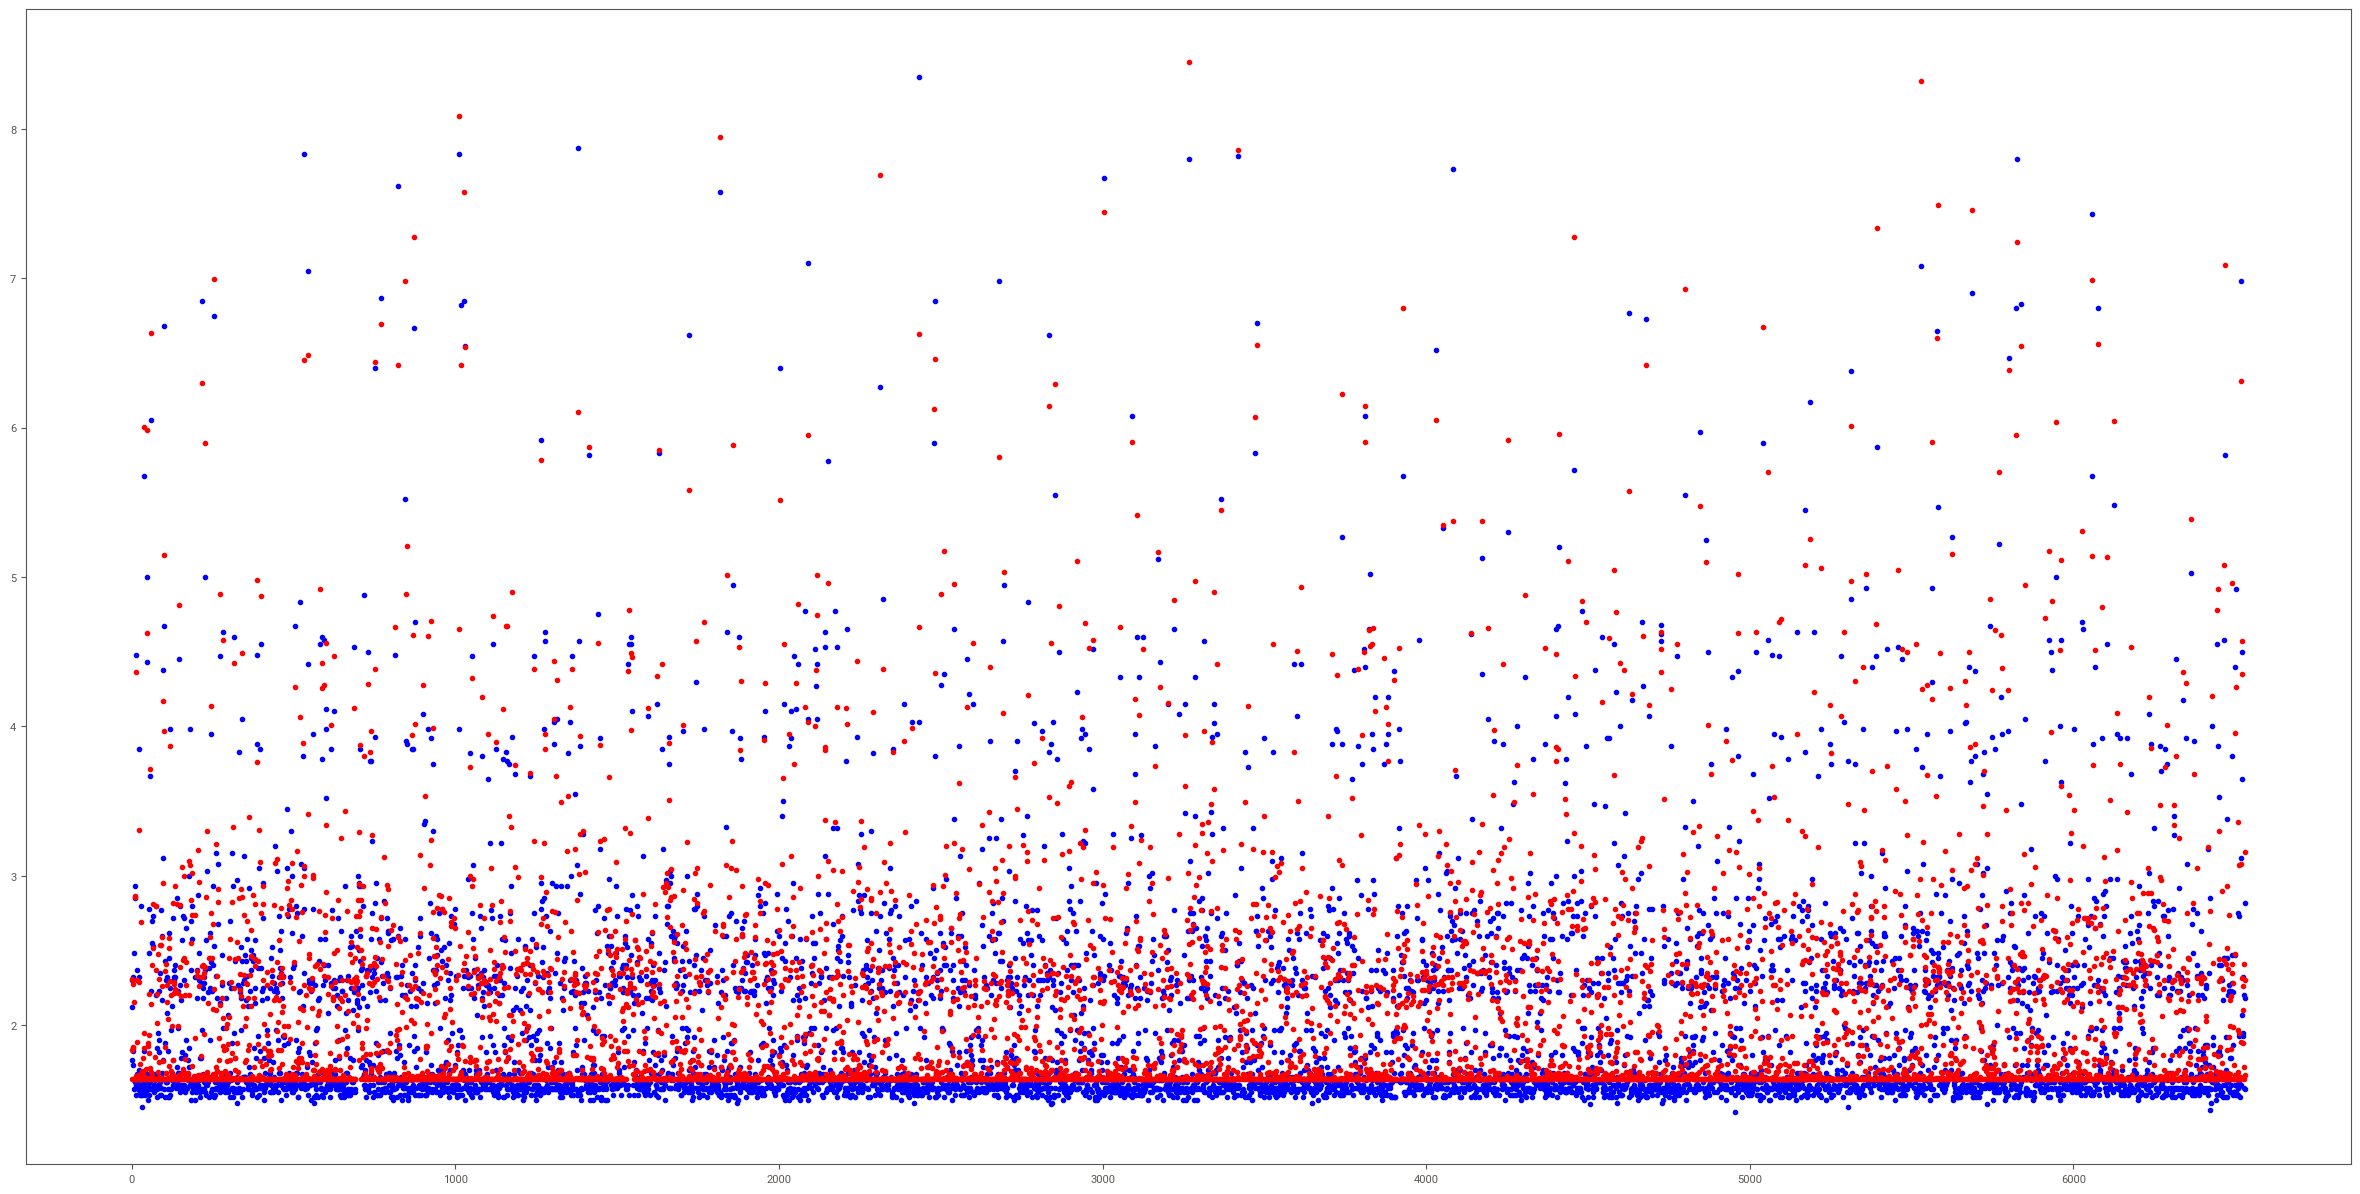

In [56]:
plt.figure(figsize=(30,15))
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(preds_test)), preds_test, color='red')


### Faeture Impact

Weather:Temp -> min = -6.1 max = 14.392999999999985


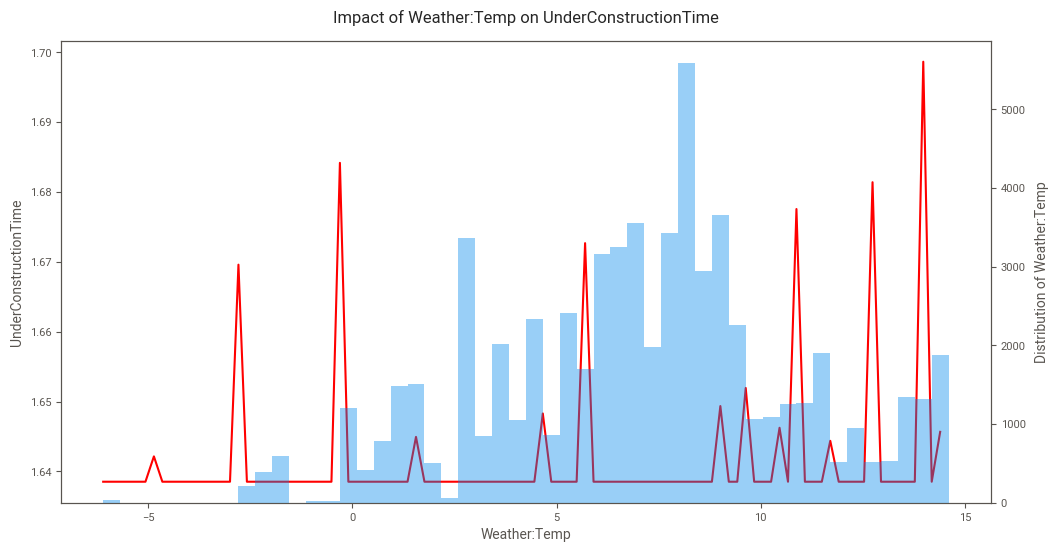

WZ_Length_Lower -> min = 50.0 max = 619.25


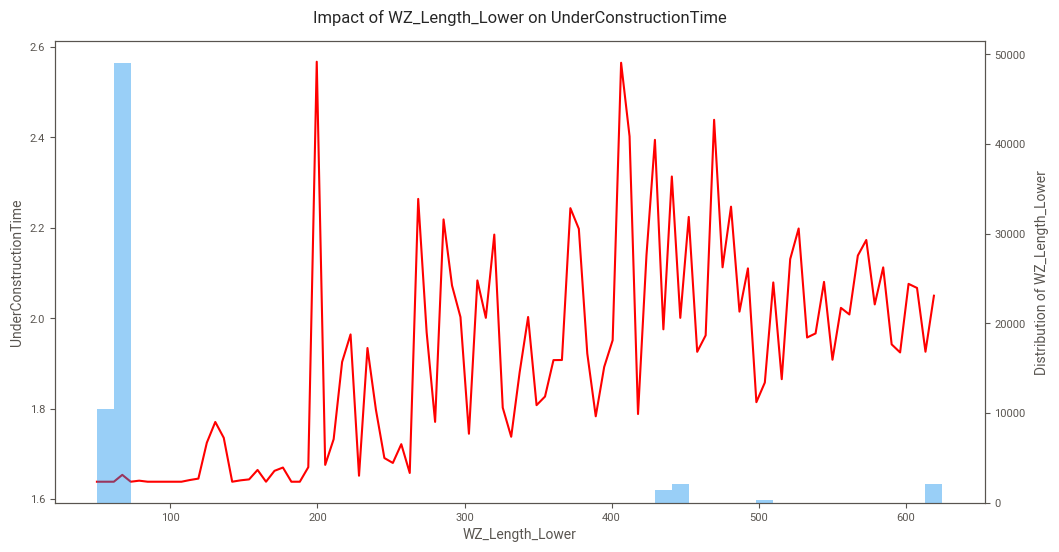

TravelDirect_Code -> min = 0 max = 1


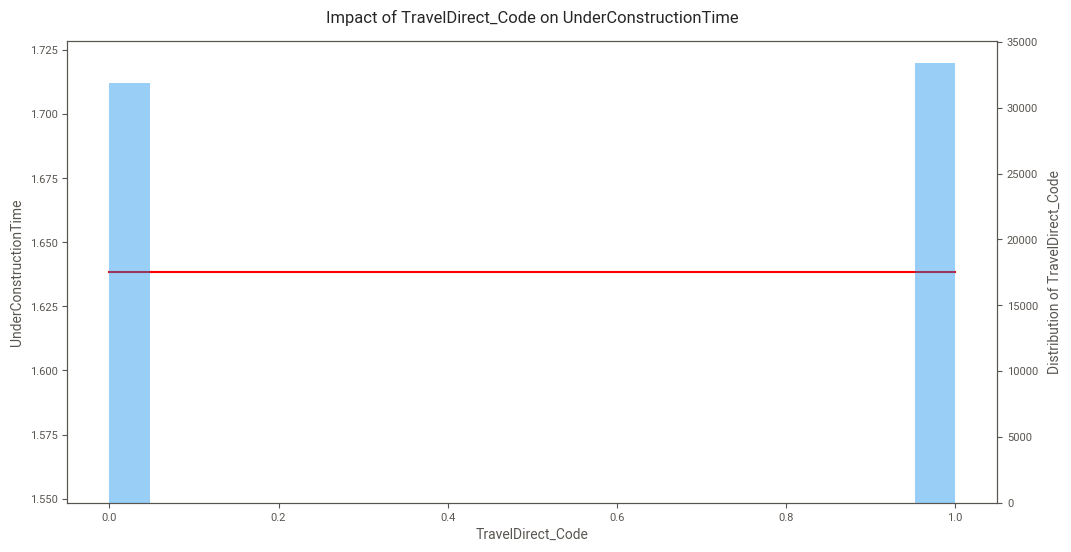

Weather:Precip -> min = 0.0 max = 1.7820000000000003


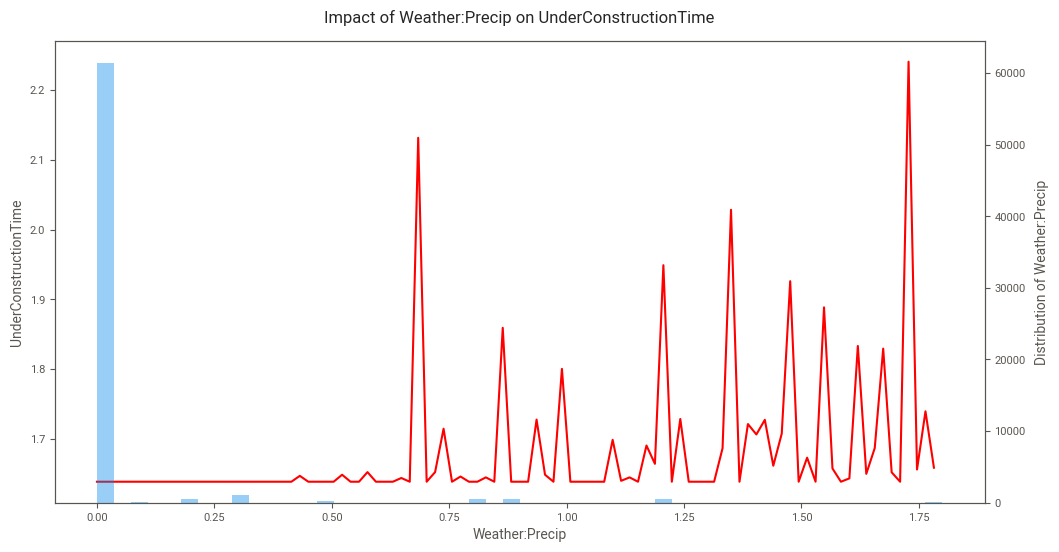

CreatedDate:DayOfYear -> min = 91.0 max = 98.91999999999983


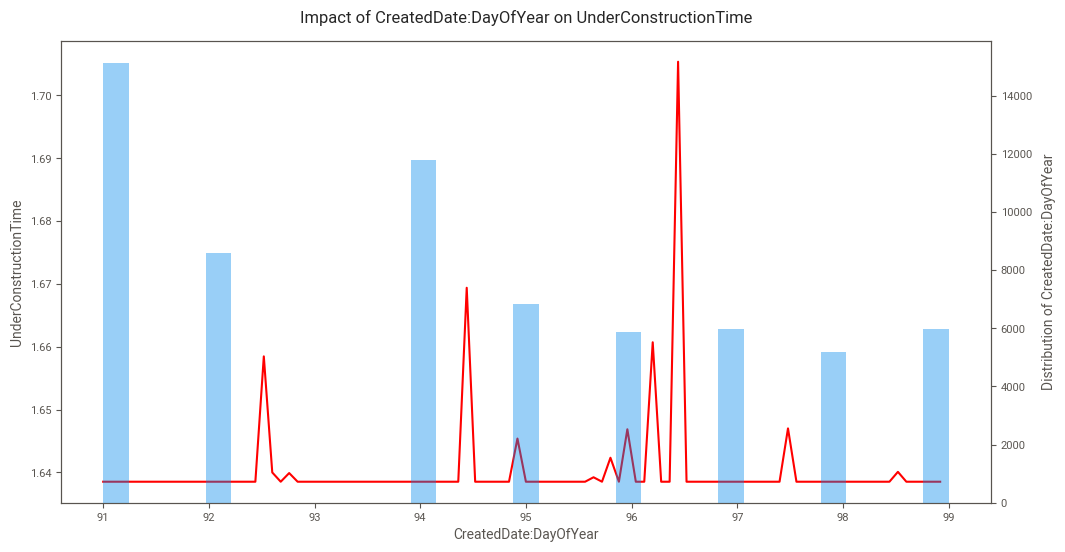

WZ_CalculatedAADT -> min = 2958.16 max = 4956.77200000001


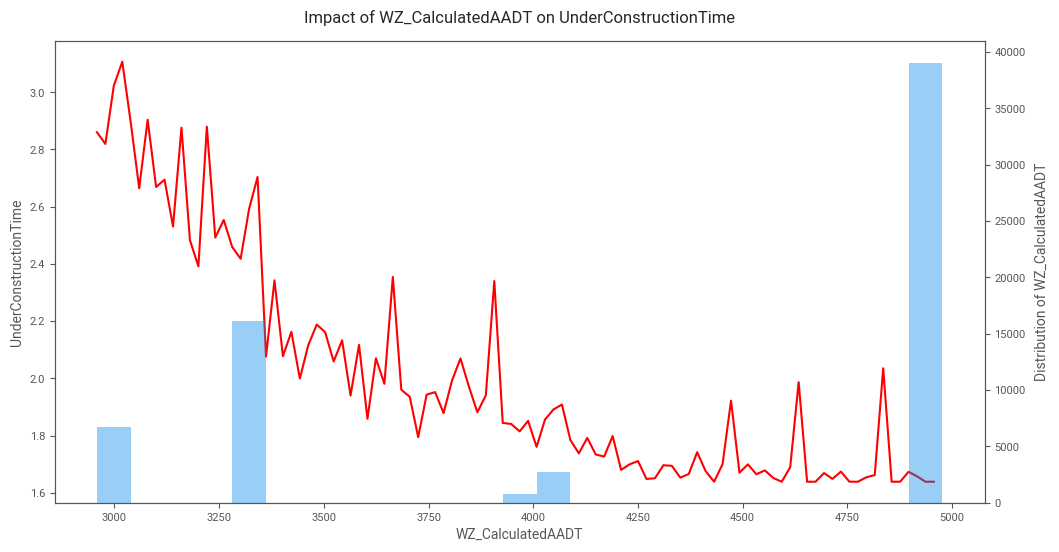

WZ_IsBidirectional -> min = 0 max = 1


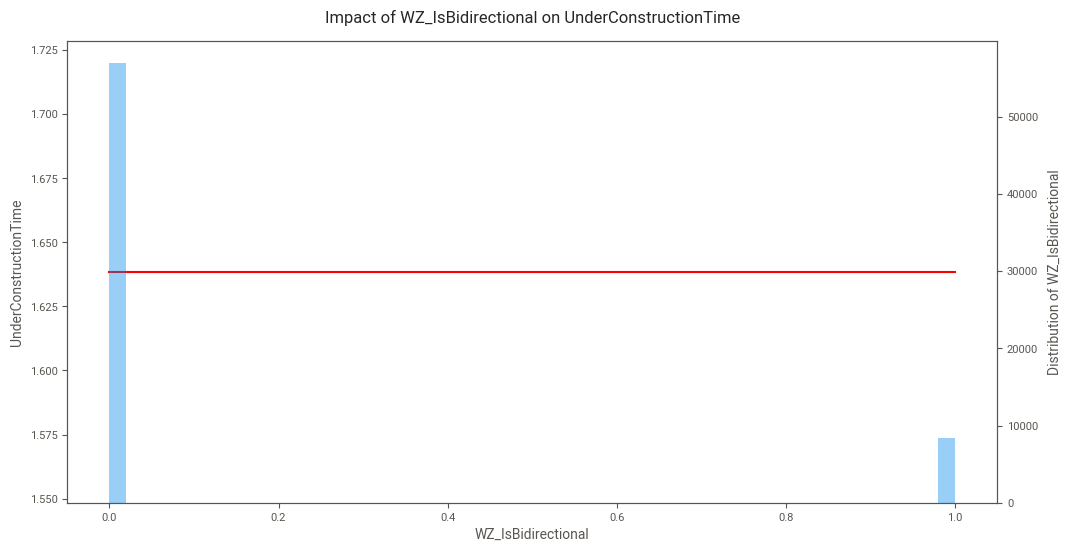

TrafficImpact:High_onehot -> min = 0 max = 1


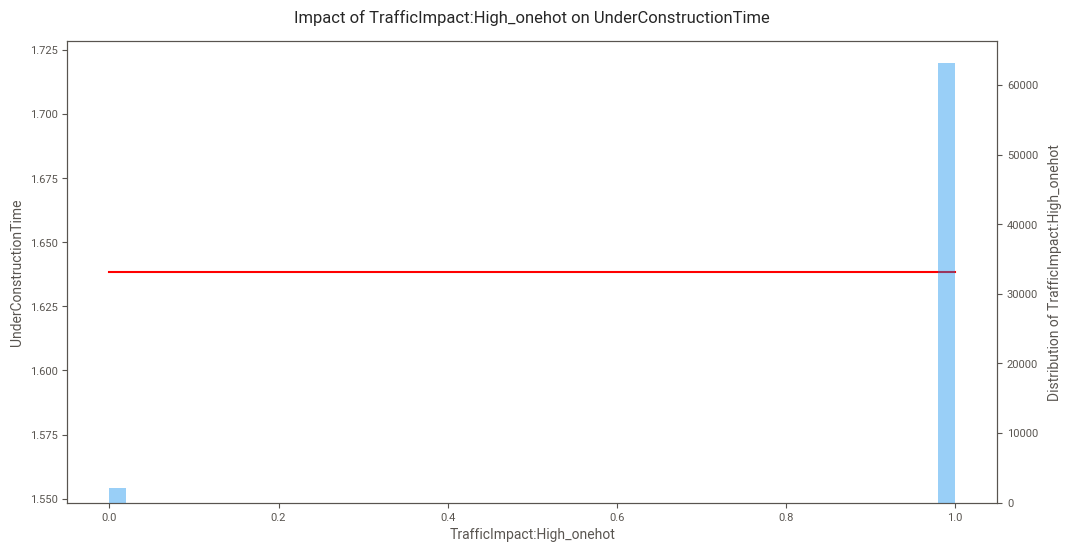

WZ_TransLenEnd -> min = 450.0 max = 1044.0


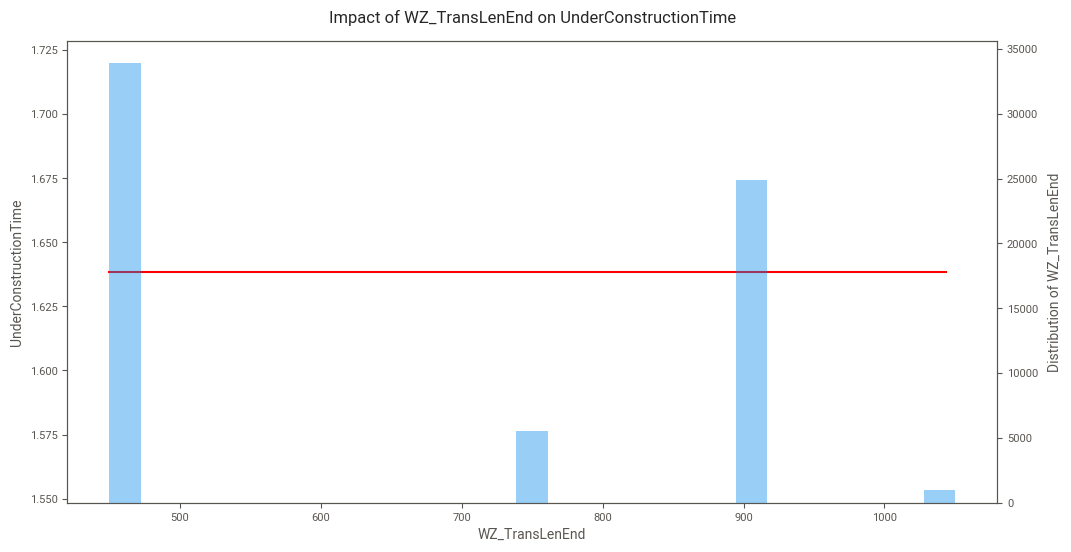

WZ_IsOrigIDivided -> min = 0 max = 1


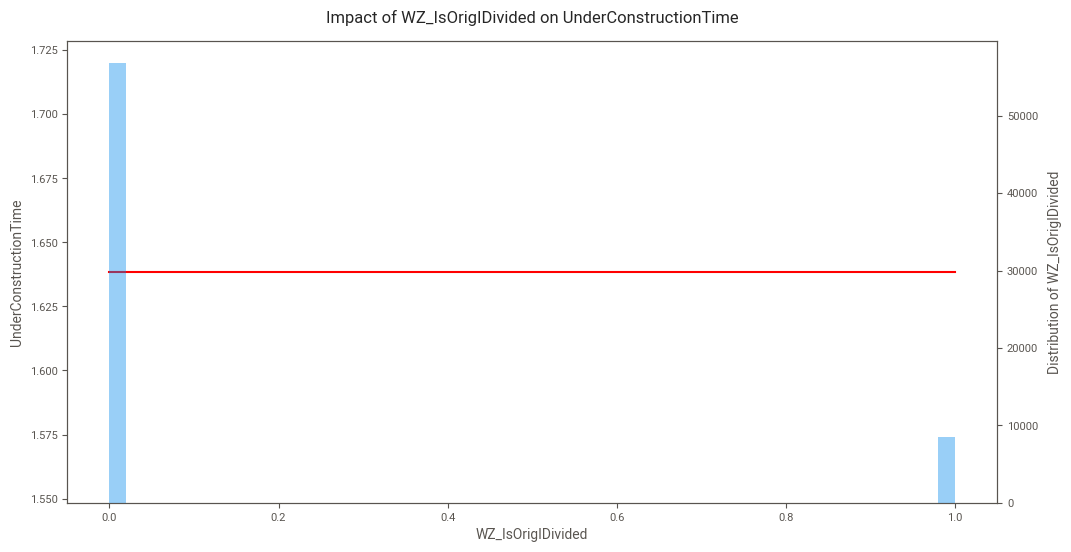

Spread:Spread4B_onehot -> min = 0 max = 1


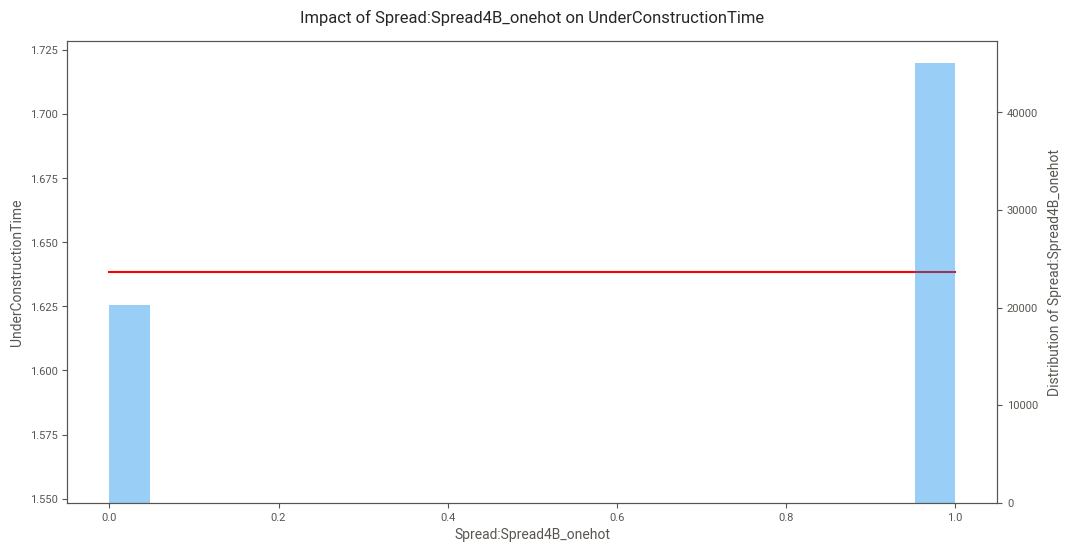

CreatedDate:Day -> min = 1.0 max = 8.920000000000007


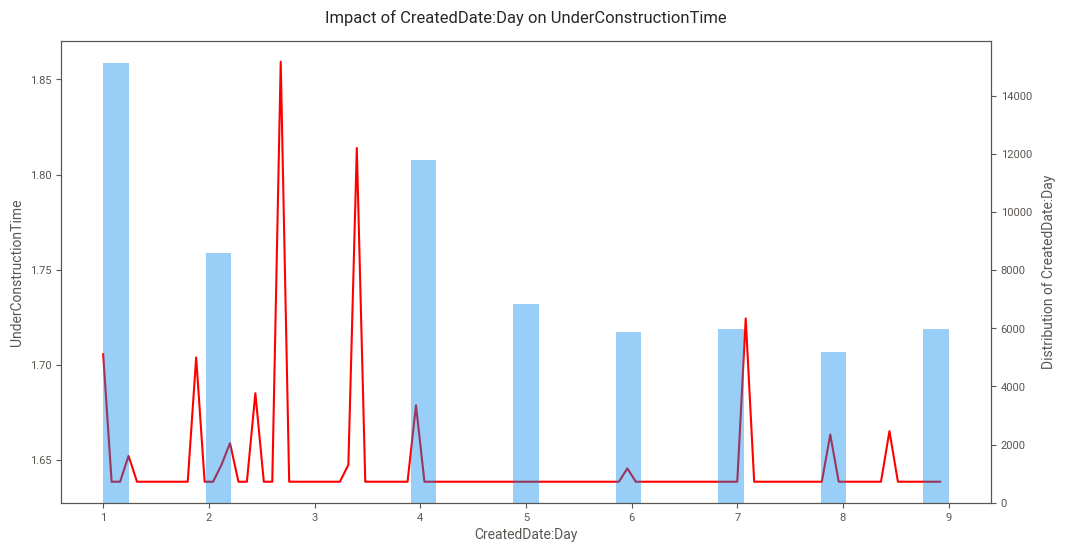

WZ_ConstSignSpdLimDist -> min = 150.0 max = 298.5


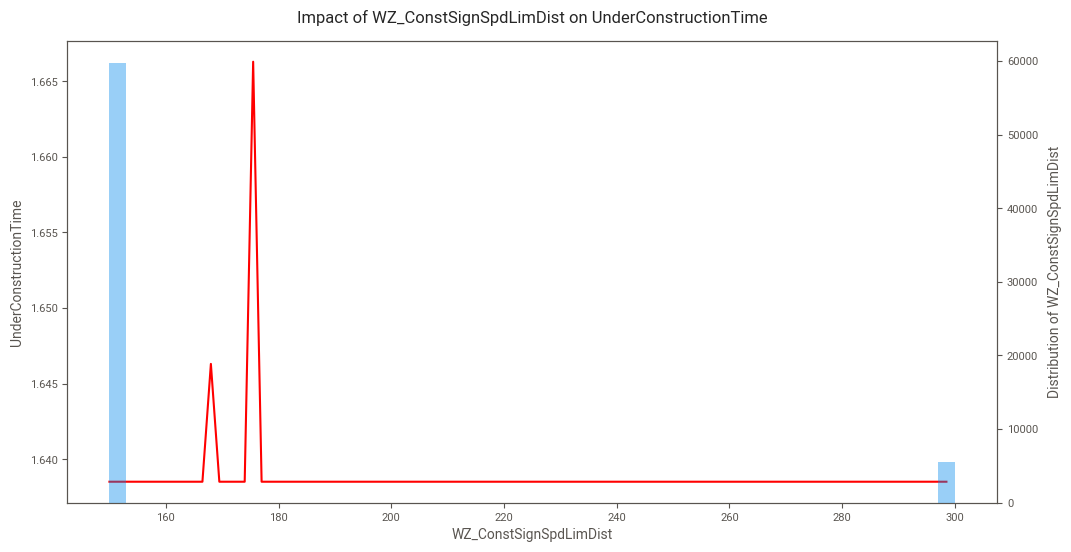

Spread:Spread3C_onehot -> min = 0 max = 1


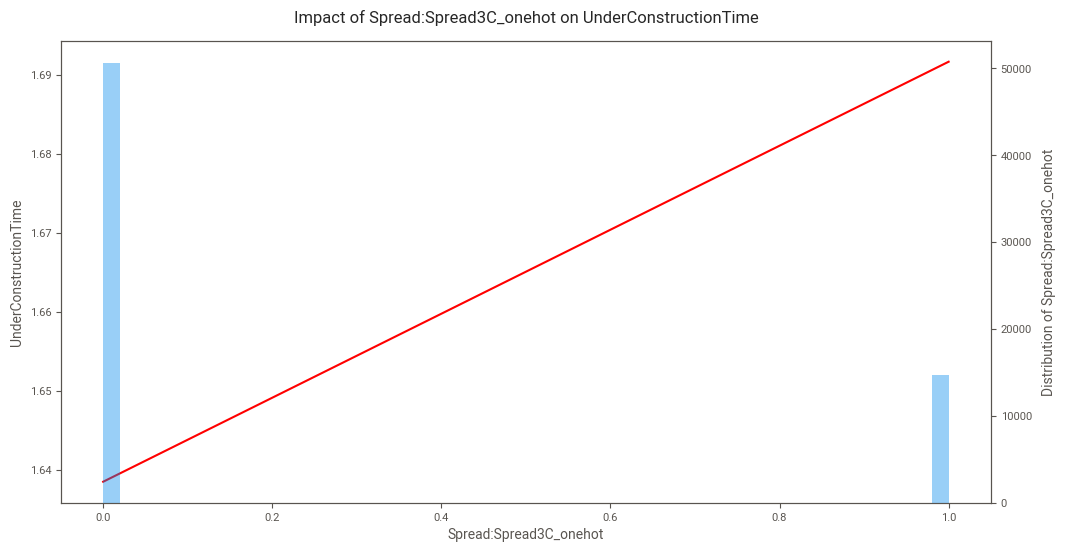

CreatedDate:Hour -> min = 0.0 max = 22.77


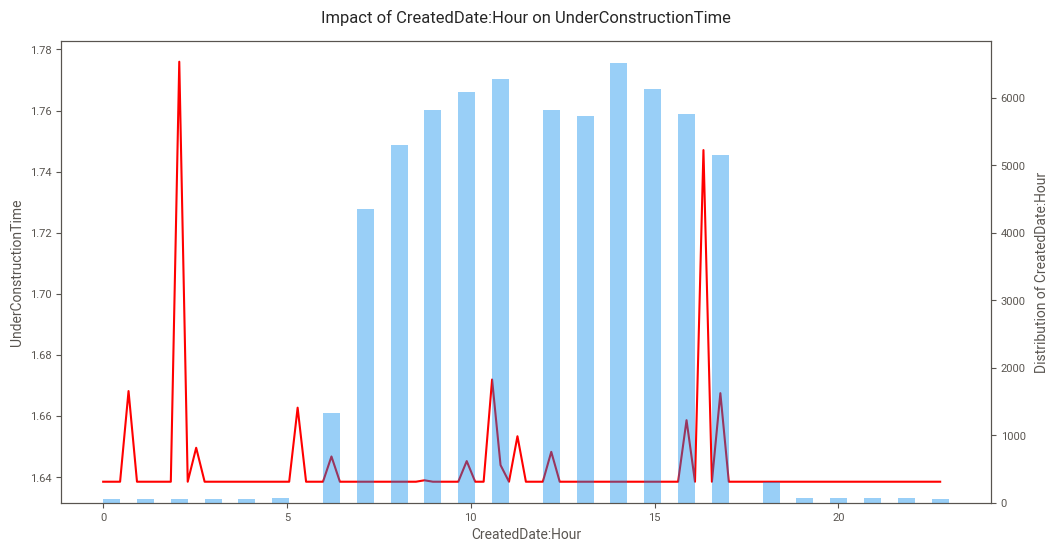

Spread:Spread3B_onehot -> min = 0 max = 1


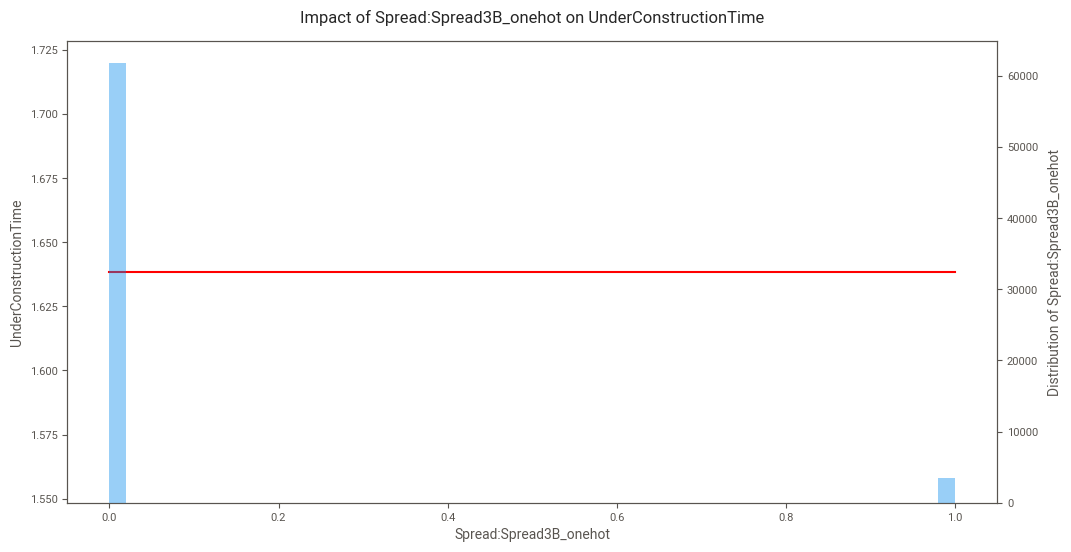

TrafficImpact:Low_onehot -> min = 0 max = 1


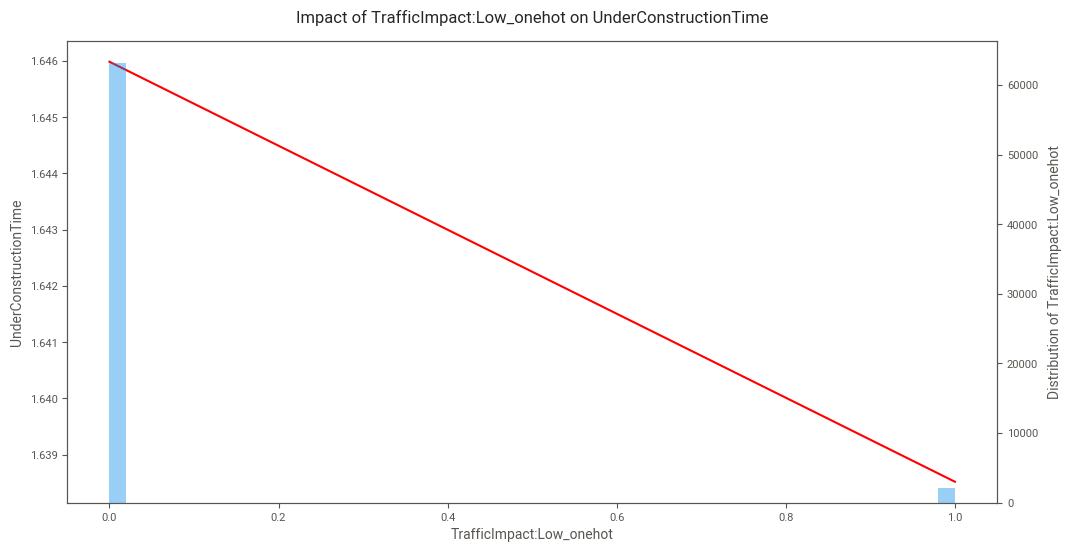

WZ_IsTransSpd -> min = 0.0 max = 69.3


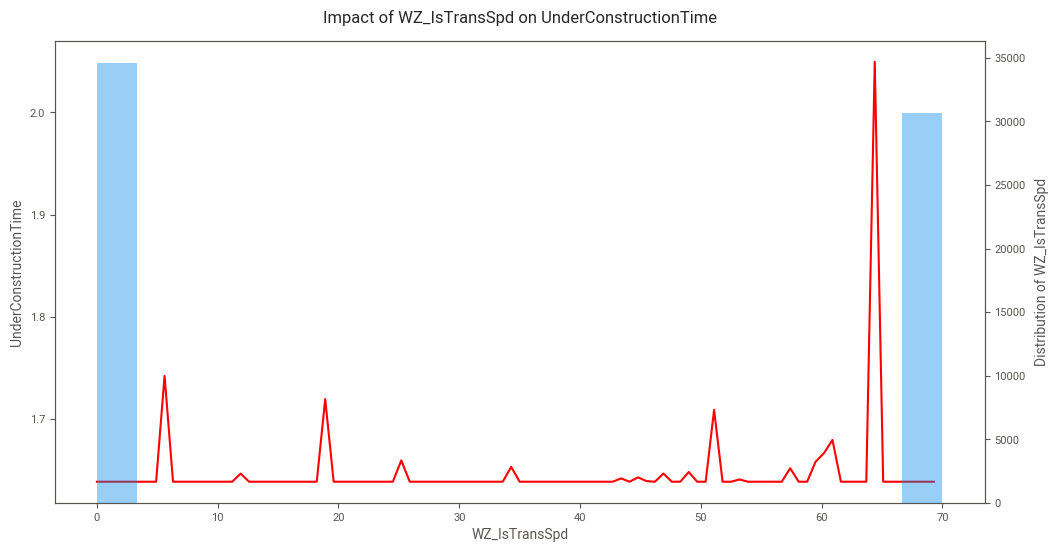

WZ_IsMinAprch -> min = 0 max = 1


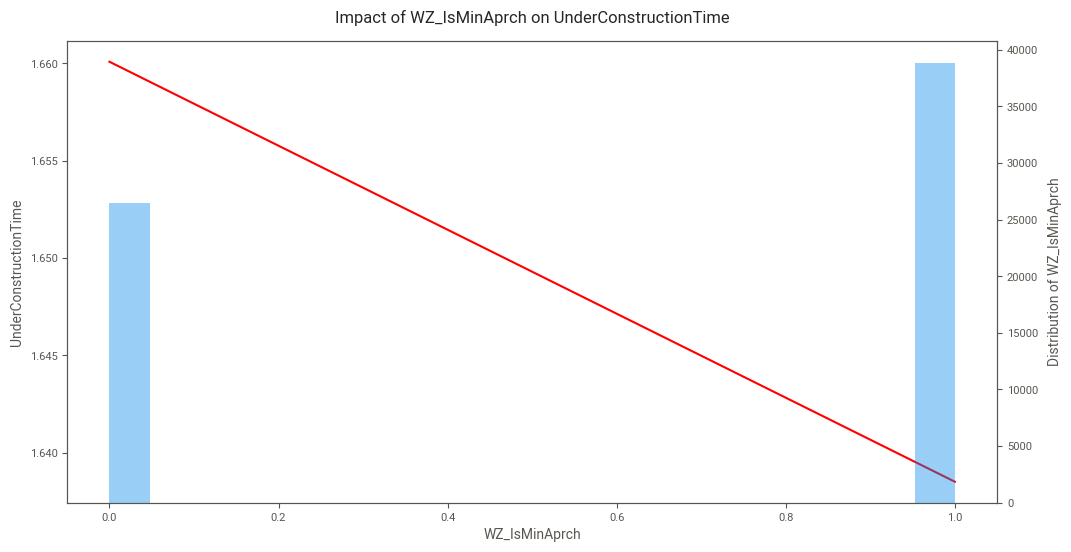

SegmentLength -> min = 2.567 max = 6.213170000000014


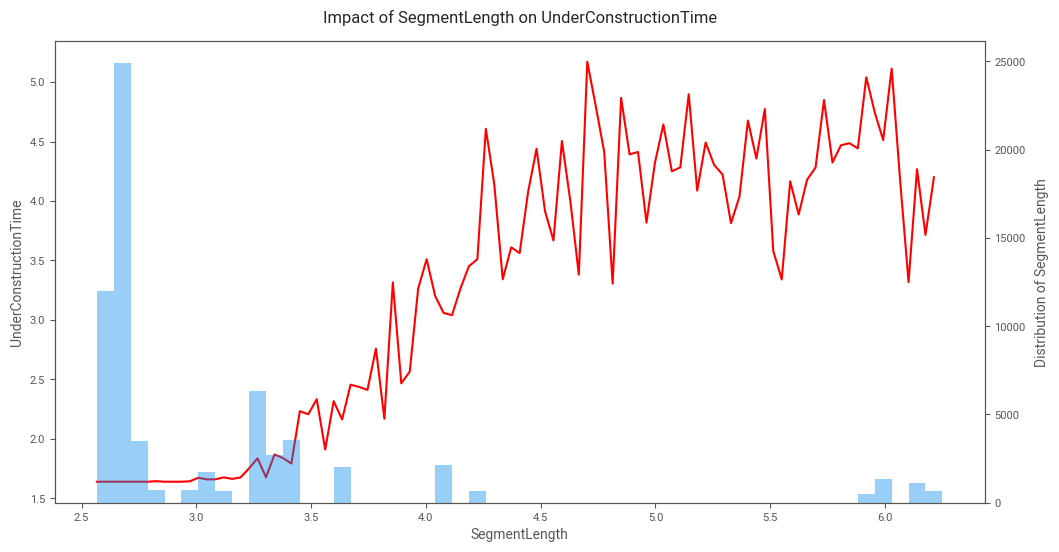

CreatedDate:Weekday -> min = 0.0 max = 4.95


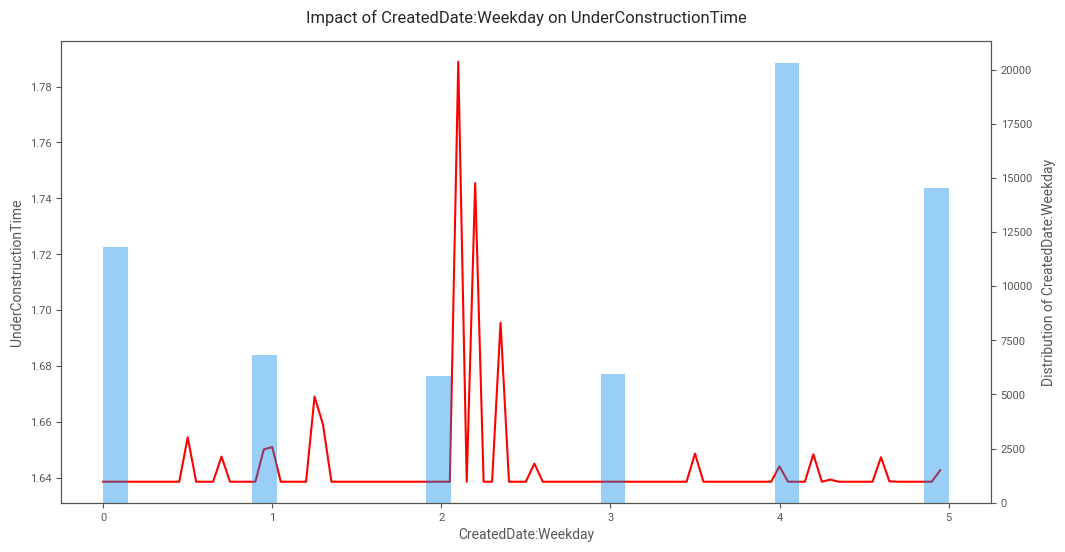

RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot -> min = 0 max = 1


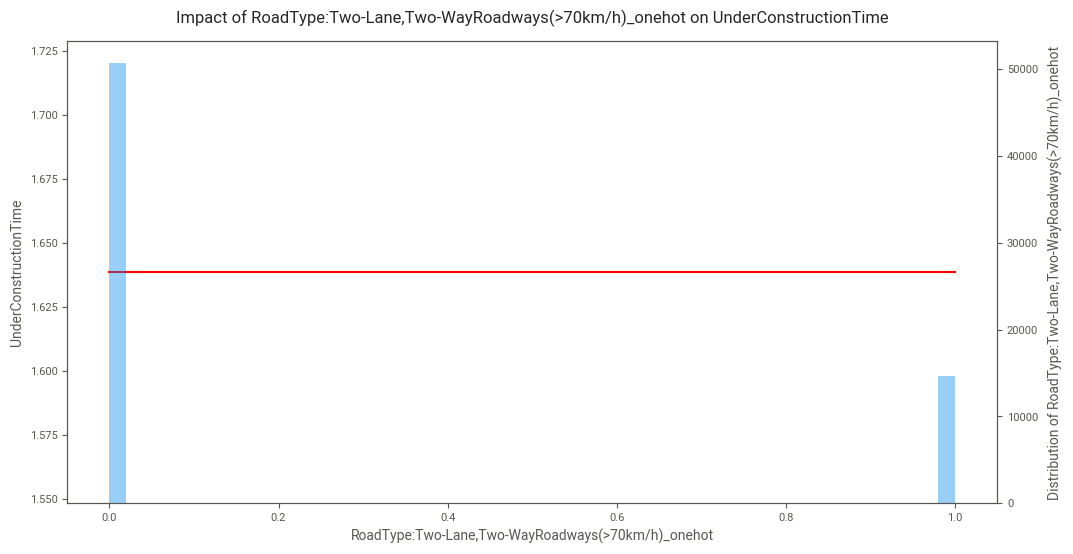

WZ_ClosedLaneCount -> min = 0 max = 1


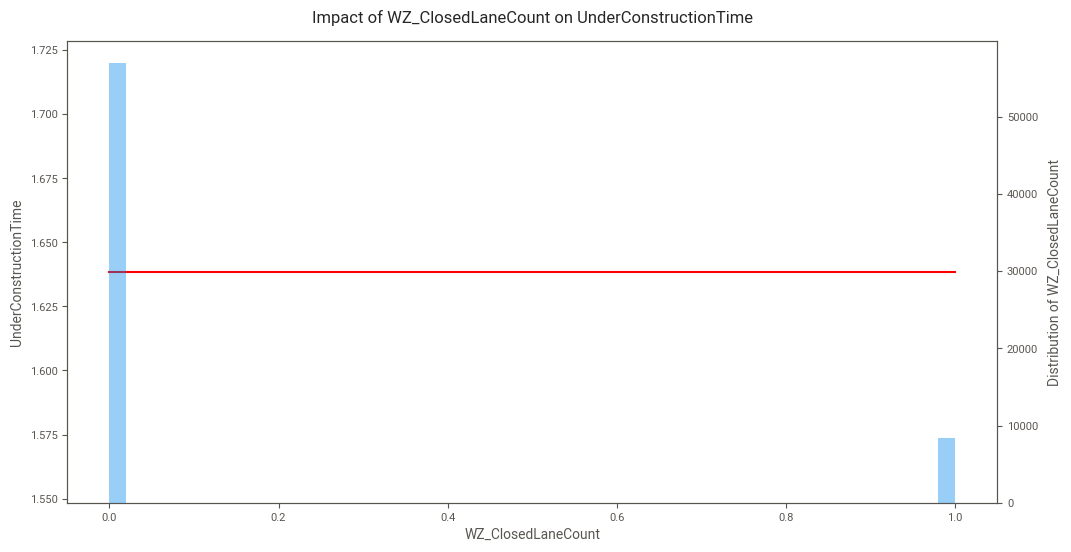

WZ_TransLenStart -> min = 150.0 max = 447.0


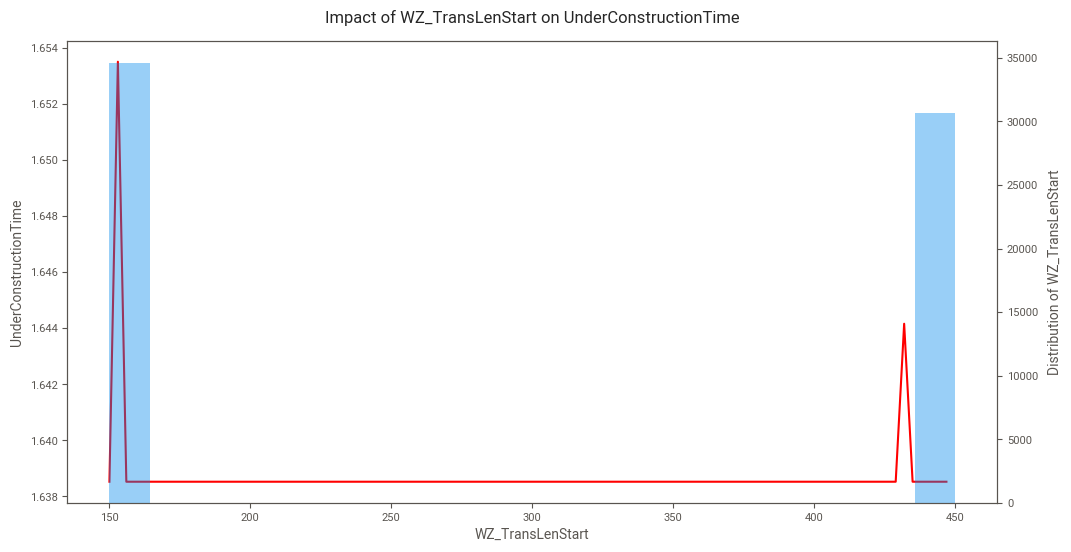

Spread:Spread4A_onehot -> min = 0 max = 1


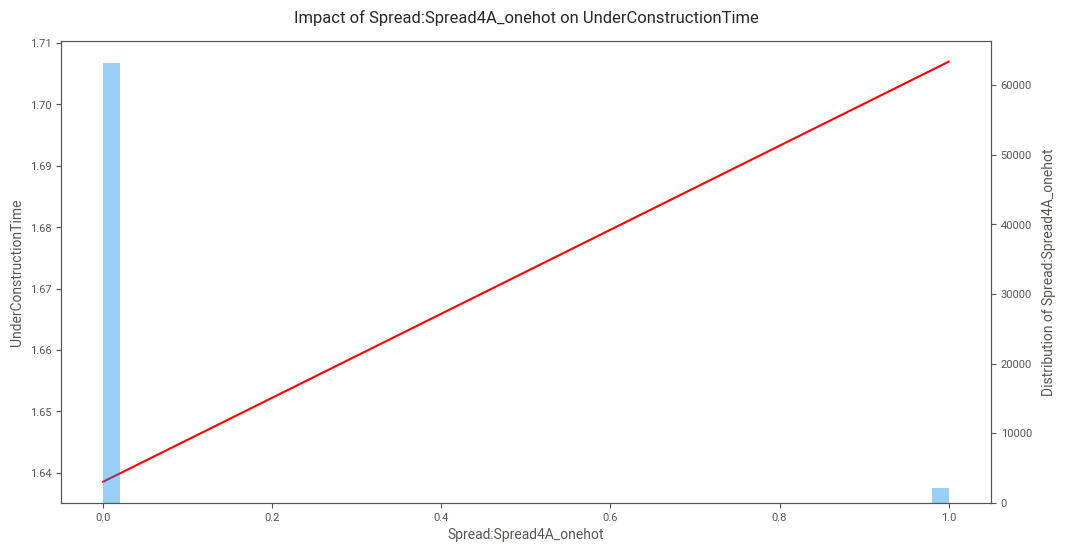

CreatedDate:MinuteInDay -> min = 2.0 max = 1423.6399999999999


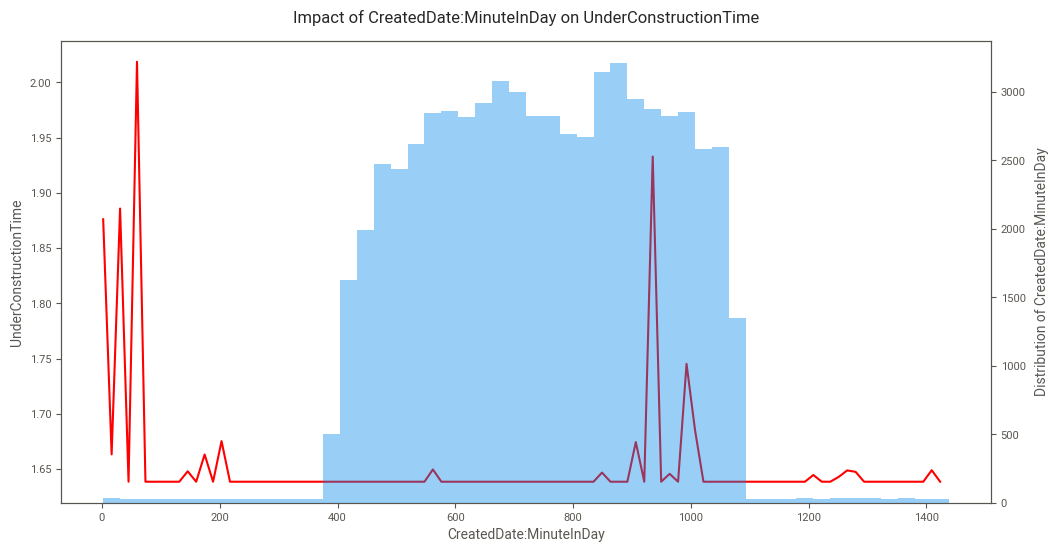

WZ_SpdLim -> min = 50.0 max = 69.80000000000028


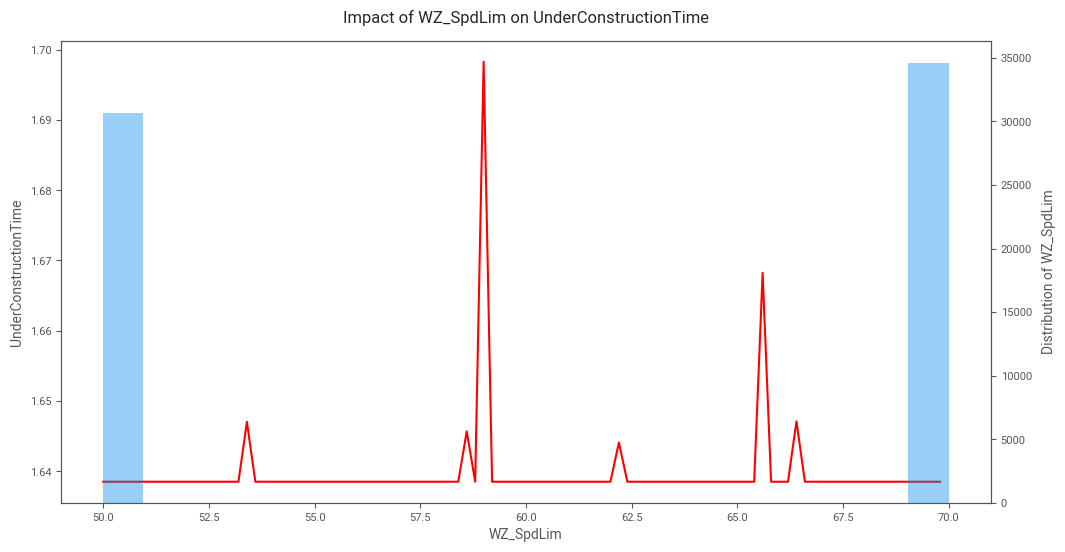

WZ_2ndTransLenStart -> min = 450.0 max = 747.0


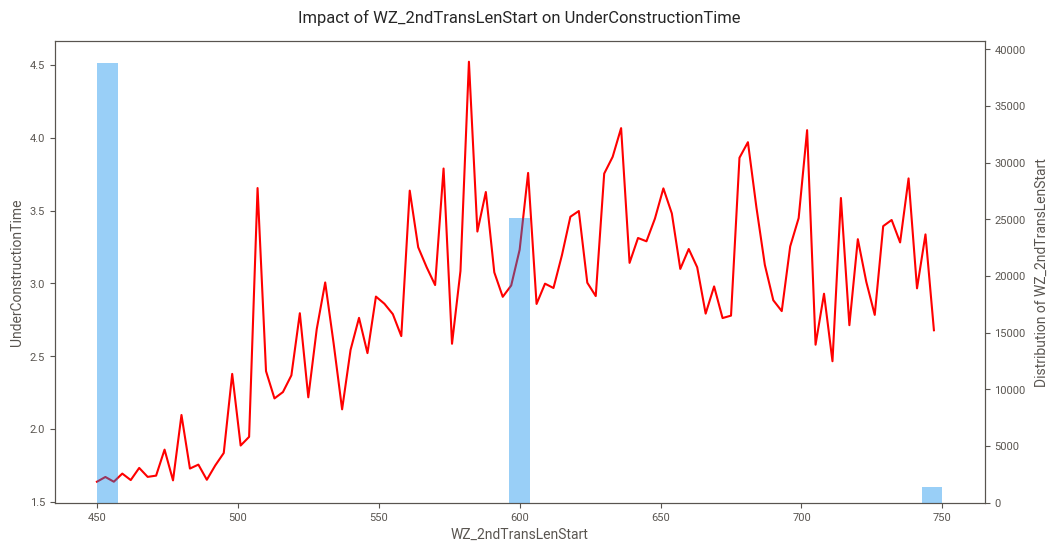

WZ_BarrelSpace -> min = 0.0 max = 1039.5


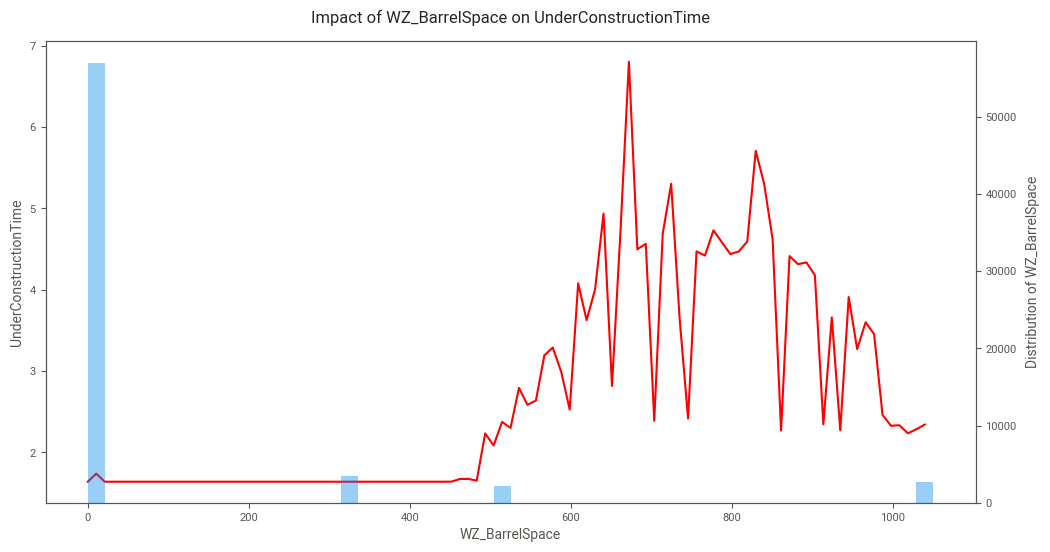

Weather:WindSpd -> min = 0.0 max = 21.78


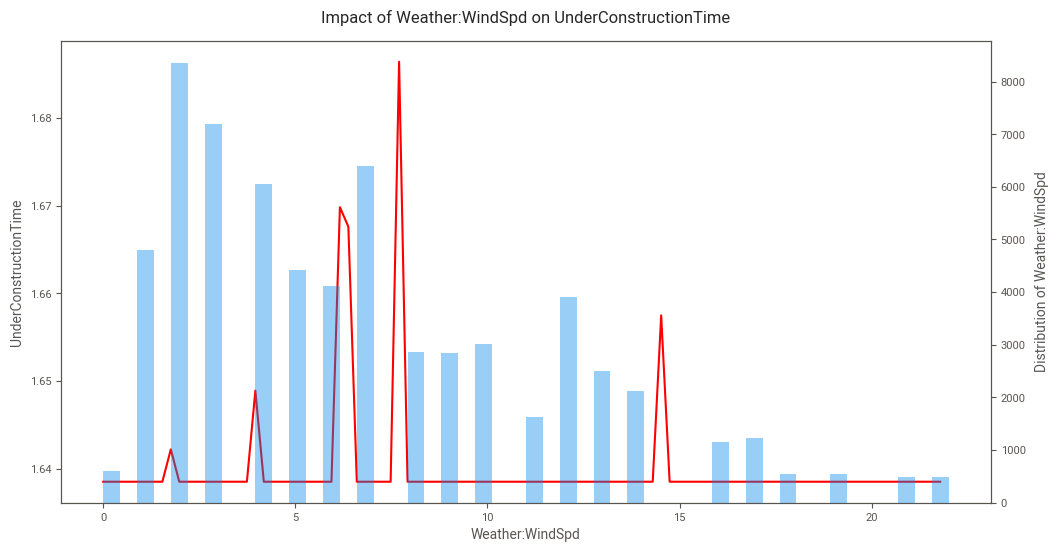

In [51]:
import warnings

x = df_processed.filter(x_cols)
y = df_processed.filter(y_cols)

meds = x.median()
mins = x.min()
maxs = x.max()

impact_dict = {}

for i, feature in enumerate(x.columns):
    inputs_list = []

    unique = x[feature].unique()
    if set(unique) == {0, 1}:
        arr = [0, 1]
    else:
        minimum = unique.min()
        maximum = unique.max()
        arr = np.arange(minimum, maximum, (maximum - minimum)/100)

    print(feature, '-> min =', min(arr), 'max =', max(arr))

    for variation in arr:
        inputs = list(meds.values)
        inputs[i] = variation

        inputs_list.append(inputs)

    inputs_list = np.array(inputs_list)
    inputs_tensor = torch.tensor(inputs_list, dtype=torch.float32)

    with torch.inference_mode():
        preds = model(inputs_tensor).flatten().detach().numpy()

    impact_dict[feature] = abs(preds.max() - preds.min())

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        warnings.warn("deprecated", DeprecationWarning)

        plt.figure(figsize=(12, 6))
        sns.lineplot(x=inputs_tensor[:, i].flatten(), y=preds, color='r')
        plt.xlabel(feature)
        plt.ylabel(y_cols[0])
        # plt.ylim(1, 8)
        plt.twinx()
        sns.distplot(x[feature], kde=False) #bins=10
        plt.ylabel(f"Distribution of {feature}", labelpad=7)
        plt.title(f"Impact of {feature} on {y_cols[0]}", pad=13);
        plt.show()


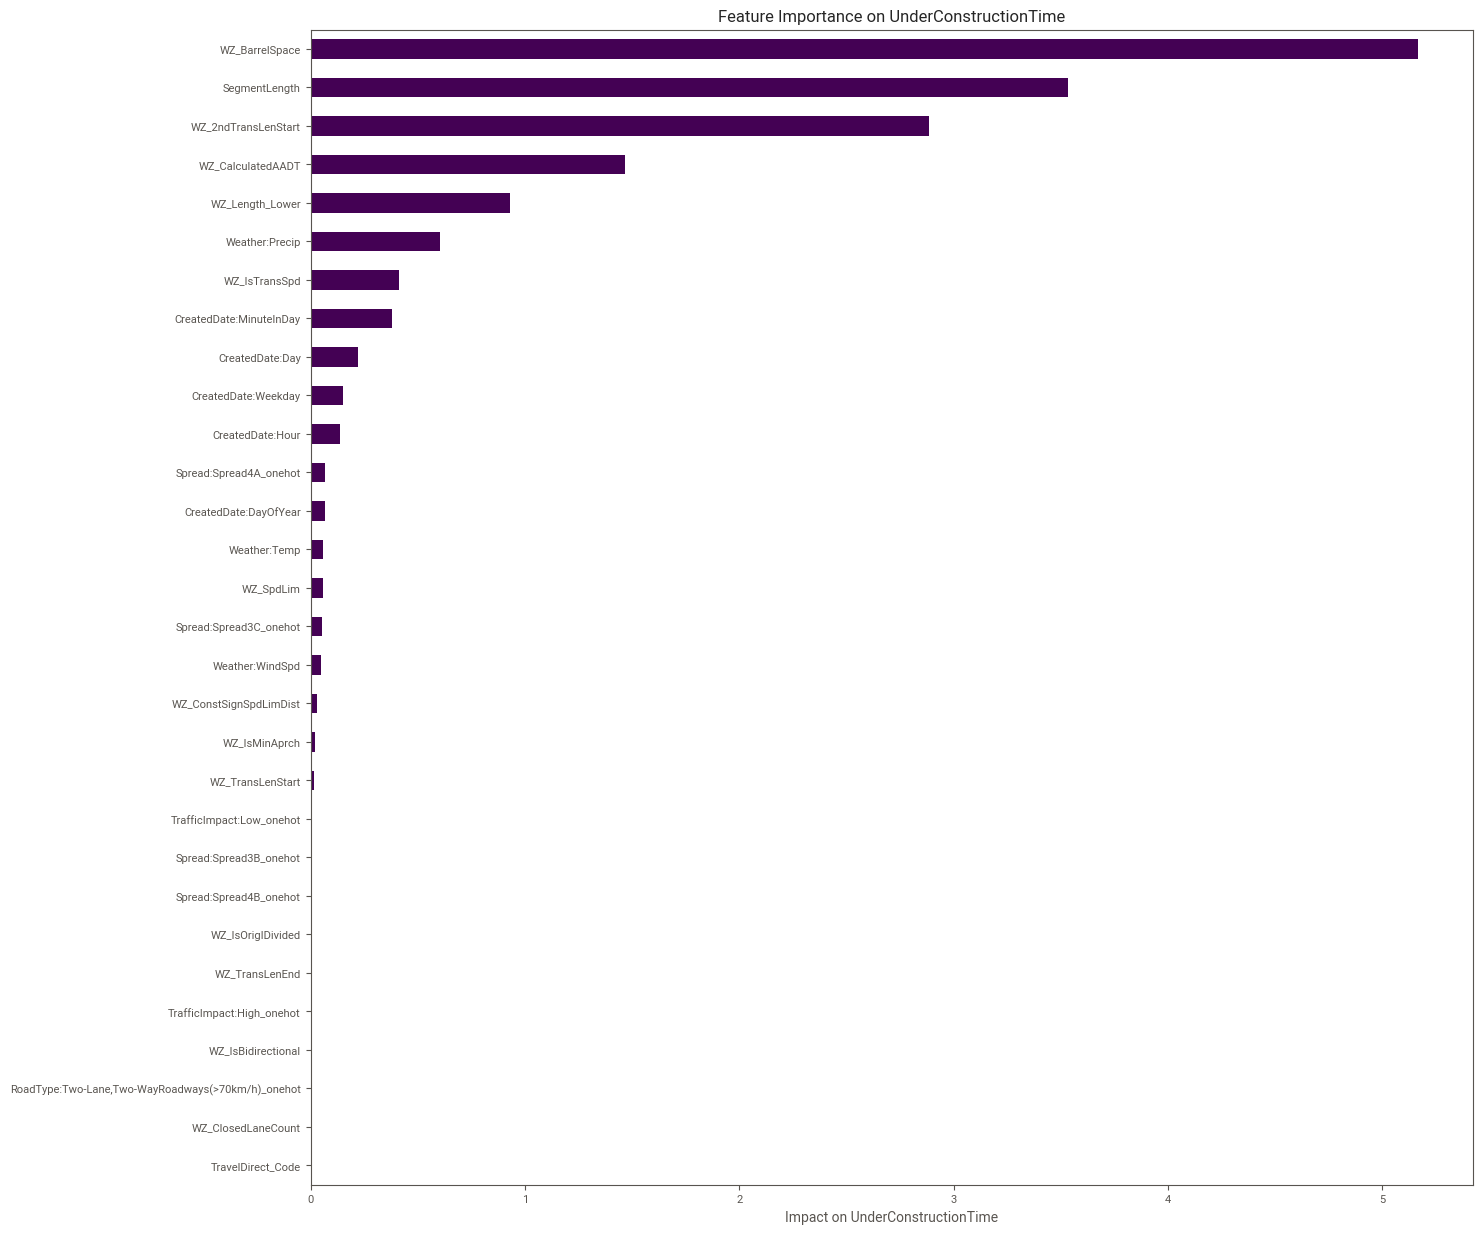

In [52]:
pd.DataFrame.from_dict(impact_dict, orient='index', columns=['Impact']).sort_values(by="Impact").plot(kind='barh', figsize=(15,15), colormap='viridis')
plt.xlabel(f"Impact on {y_cols[0]}")
plt.legend().remove()
plt.title(f"Feature Importance on {y_cols[0]}");

### T-test

In [55]:
from scipy import stats

stats.ttest_ind(y_test, preds_test)

Ttest_indResult(statistic=-3.636526652402472, pvalue=0.0002774020118976804)

# Tensorflow

In [ ]:
# model = Sequential()
#
# model.add(Dense(units=128, input_dim=x_train.shape[1], activation='relu'))
#
# model.add(Dense(units=512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.5))
#
# # Output layer
# # model.add(Dense(units=2, activation='tanh'))
# # model.add(Dense(units=2, activation='sigmoid'))
# # model.add(Dense(units=2))
# model.add(Dense(units=1))
#
# model.compile(optimizer='adam', loss='mse')
#
# model.summary()

In [ ]:
# # logdir = "../logs/" + datetime.now().strftime("%d-%H_%M")
# # tensorboard_callback = TensorBoard(log_dir=logdir)
# # tensorboard_callback = TensorBoard(log_dir=logdir,
# #                                    histogram_freq=1,
# #                                    write_graph=True,
# #                                    write_images=True,
# #                                    update_freq='epoch',
# #                                    profile_batch=2,
# #                                    embeddings_freq=1)
# earlystopping_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [ ]:
# # model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, earlystopping_callback], verbose=1)
#
# history = model.fit(x_train, y_train, epochs=2000, batch_size=1024, validation_data=(x_test, y_test),
#                     callbacks=[earlystopping_callback], verbose=1)


In [ ]:
def plot_performance(history):
    # print(history.history.keys())
    plt.title('model loss')
    plt.plot(history.history['loss'], 'b-o')
    plt.plot(history.history['val_loss'], 'r-X')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

In [ ]:
plot_performance(history)

In [ ]:
# %tensorboard --logdir logs

In [ ]:
# y_pred = model.predict(x_train[-set_aside:])
# r2_score(y_train[-set_aside:], y_pred)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# ape = tf.abs((y_test - y_pred) / y_test)
# mape = tf.reduce_mean(ape) * 100.0
# print("MAPE:", mape.numpy())

squared_error = tf.square(y_test - y_pred)
mse = tf.reduce_mean(squared_error)
print("MSE:", mse.numpy())
rmse = tf.sqrt(mse)
print("RMSE:", rmse.numpy())

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

In [ ]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

## Save

In [ ]:
model.save(os.path.join(output_root_path, "trained_model", datetime.now().strftime("model_%d-%H_%M")))
model.save_weights(os.path.join(output_root_path, "trained_model/" + datetime.now().strftime("model_%m_%d-%H_%M"),
                                datetime.now().strftime("model_%d-%H_%M")))

In [ ]:
model.save("my_model.h5")

In [ ]:
import netron

netron.start("my_model.h5")